In [ ]:
#Import libraries
import time
import calendar
import basketball_reference_scraper
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime, timedelta, date
from bs4 import BeautifulSoup
from scipy.stats import uniform
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import requests, os, collections as co, json, datetime, sys, shutil, unidecode
from basketball_reference_scraper.teams import get_roster, get_team_stats, get_opp_stats, get_roster_stats, get_team_misc
from basketball_reference_scraper.box_scores import get_box_scores
from basketball_reference_scraper.players import get_stats, get_game_logs
from basketball_reference_scraper.seasons import get_schedule, get_standings
from basketball_reference_scraper.pbp import get_pbp
from basketball_reference_scraper.shot_charts import get_shot_chart
from basketball_reference_scraper.injury_report import get_injury_report
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# plot feature importance using built-in function
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from statsmodels.api import OLS
from tkinter import filedialog
#from datetime import date
import utils
import io
from decimal import Decimal
from pulp import *

Enter a year (2021)2021
Enter a month (8 for August, or 12 for December)4
Enter a day (1-31)21
Choose prediction model: 'xgb' or 'ols'xgb
Pulling game data


<ipython-input-1761-a288e3f4cf35>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_game_data['Minutes'][a] = pd.to_numeric(all_game_data['Minutes'][a].split(':')[0]) + pd.to_numeric(all_game_data['Minutes'][a].split(':')[1])/60
<ipython-input-1761-a288e3f4cf35>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_game_data['Minutes'][a] = pd.to_numeric(0)
<ipython-input-1761-a288e3f4cf35>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

False
Pull today's players


<ipython-input-1760-8e5f41059dde>:37: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  nba_schedule = get_schedule(today_date.year, playoffs=False)[get_schedule(today_date.year, playoffs=False)['DATE'] == today_date]
<ipython-input-1760-8e5f41059dde>:41: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  today_teams['TEAM'] = get_schedule(2021, playoffs=False)[get_schedule(2021, playoffs=False)['DATE'] == date.today()]['HOME'].append(get_schedule(202

CLE
IND
PHI
TOR
WAS
HOU
NYK
DAL
SAS
LAC
POR
SAC
CHI
OKC
PHO
BRK
GSW
UTA
ATL
DET
MIA
MEM
DEN
MIN
today feature data
0 Okoro, Isaac
0 / 318
1 Osman, Cedi
1 / 318
2 Sexton, Collin
2 / 318
3 Wade, Dean
3 / 318
4 Garland, Darius
4 / 318
5 Allen, Jarrett
5 / 318
6 Dotson, Damyean
6 / 318
7 Windler, Dylan
7 / 318
8 Prince, Taurean
8 / 318
9 Love, Kevin
9 / 318
10 Hartenstein, Isaiah
10 / 318
11 Dellavedova, Matthew
11 / 318
12 Cook, Quinn
12 / 318
13 Kabengele, Mfiondu
13 / 318
14 Holiday, Justin
14 / 318
15 Holiday, Aaron
15 / 318
16 McConnell, T.J.
16 / 318


<ipython-input-1724-eb8c84040f83>:45: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  ten_bucket =  filter_player_data[(filter_player_data.Date >= ten_day) & (filter_player_data.Date < current_date)].reset_index()
<ipython-input-1724-eb8c84040f83>:46: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  thirty_bucket =  filter_player_data[(filter_player_data.Date >= thirty_day) & (filter_player_data.Date < current_date)].reset_index()
<ipython-input-1724-eb8c84040f83>:47: FutureWarning: Comparing Series of datet

17 Sabonis, Domantas
17 / 318
18 McDermott, Doug
18 / 318
19 Brogdon, Malcolm
19 / 318
20 Turner, Myles
20 / 318
21 Sumner, Edmond
21 / 318
22 Bitadze, Goga
22 / 318
23 Lamb, Jeremy
23 / 318
24 LeVert, Caris
24 / 318
25 Sampson, JaKarr
25 / 318
26 Martin, Kelan
26 / 318
27 Brissett, Oshae
27 / 318
28 Warren, T.J.
28 / 318
29 Green, Danny
29 / 318
30 Howard, Dwight
30 / 318
31 Thybulle, Matisse
31 / 318
32 Harris, Tobias
32 / 318
33 Milton, Shake
33 / 318
34 Simmons, Ben
34 / 318
35 Maxey, Tyrese
35 / 318
36 Korkmaz, Furkan
36 / 318
37 Curry, Seth
37 / 318
38 Embiid, Joel
38 / 318
39 Scott, Mike
39 / 318
40 Joe, Isaiah
40 / 318
41 Hill, George
41 / 318
42 Tolliver, Anthony
42 / 318
43 Boucher, Chris
43 / 318
44 Baynes, Aron
44 / 318
45 Johnson, Stanley
45 / 318
46 Siakam, Pascal
46 / 318
47 VanVleet, Fred
47 / 318
48 Lowry, Kyle
48 / 318
49 Watanabe, Yuta
49 / 318
50 Anunoby, OG
50 / 318
51 Flynn, Malachi
51 / 318
52 Watson, Paul
52 / 318
53 Hood, Rodney
53 / 318
54 Gillespie, Freddie
5

311 Layman, Jake
311 / 318
312 Nowell, Jaylen
312 / 318
313 Beasley, Malik
313 / 318
314 Towns, Karl-Anthony
314 / 318
315 Culver, Jarrett
315 / 318
316 Russell, D'Angelo
316 / 318
317 Davis, Ed
317 / 318
Pulling historical feature data for modeling
today historic data
0 / 28198
0 George, Paul
1 / 28198
1 Curry, Stephen
2 / 28198
2 Schroder, Dennis
3 / 28198
3 Irving, Kyrie
4 / 28198
4 James, LeBron
5 / 28198
5 Beverley, Patrick
6 / 28198
6 Dinwiddie, Spencer


<ipython-input-1746-eb2ef98484e3>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_game_data['DK_LAST_10_DAYS'][a] = ten_bucket['DK Pts'].mean()
<ipython-input-1746-eb2ef98484e3>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_game_data['DK_LAST_30_DAYS'][a] = thirty_bucket['DK Pts'].mean()
<ipython-input-1746-eb2ef98484e3>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_game_data['DK_LAST_60_DAYS'][a] = sixty_bucket['DK 

7 / 28198
7 Williams, Louis
8 / 28198
8 Lee, Damion
9 / 28198
9 Mulder, Mychal
10 / 28198
10 Wanamaker, Brad
11 / 28198
11 Poole, Jordan
12 / 28198
12 Caruso, Alex
13 / 28198
13 Brown, Bruce
14 / 28198
14 Johnson, Tyler
15 / 28198
15 Jackson, Reggie
16 / 28198
16 Cook, Quinn
17 / 28198
17 Mann, Terance
18 / 28198
18 Mannion, Nico
19 / 28198
19 Green, Draymond
20 / 28198
20 Thompson, Klay
21 / 28198
21 Chiozza, Chris
22 / 28198
22 LeVert, Caris
23 / 28198
23 Durant, Kevin
24 / 28198
24 Leonard, Kawhi
25 / 28198
25 Harris, Joe
26 / 28198
26 Batum, Nicolas
27 / 28198
27 Oubre, Kelly
28 / 28198
28 Caldwell-Pope, Kentavious
29 / 28198
29 Wiggins, Andrew
30 / 28198
30 Toscano-Anderson, Juan
31 / 28198
31 Kuzma, Kyle
32 / 28198
32 Kennard, Luke
33 / 28198
33 Paschall, Eric
34 / 28198
34 Horton-Tucker, Talen
35 / 28198
35 Shamet, Landry
36 / 28198
36 Bazemore, Kent
37 / 28198
37 Luwawu, Timothe
38 / 28198
38 Prince, Taurean
39 / 28198
39 Matthews, Wes
40 / 28198
40 Coffey, Amir
41 / 28198
41 D

280 / 28198
280 Scott, Mike
281 / 28198
281 Warren, T.J.
282 / 28198
282 Williams, Grant
283 / 28198
283 Harkless, Maurice
284 / 28198
284 Iguodala, Andre
285 / 28198
285 Windler, Dylan
286 / 28198
286 Melli, Nicolo
287 / 28198
287 Hood, Rodney
288 / 28198
288 Johnson, James
289 / 28198
289 Hernangomez, Juan
290 / 28198
290 Hughes, Elijah
291 / 28198
291 McDaniels, Jalen
292 / 28198
292 Hill, Solomon
293 / 28198
293 Green, Josh
294 / 28198
294 Bembry, DeAndre
295 / 28198
295 Layman, Jake
296 / 28198
296 Morgan, Juwan
297 / 28198
297 Johnson, Stanley
298 / 28198
298 Thybulle, Matisse
299 / 28198
299 Pinson, Theo
300 / 28198
300 Niang, Georges
301 / 28198
301 Antetokounmpo, Thanasis
302 / 28198
302 Temple, Garrett
303 / 28198
303 Vanderbilt, Jarred
304 / 28198
304 Stevens, Lamar
305 / 28198
305 James, Justin
306 / 28198
306 Craig, Torrey
307 / 28198
307 Bradley, Avery
308 / 28198
308 Nwora, Jordan
309 / 28198
309 Samanic, Luka
310 / 28198
310 Sumner, Edmond
311 / 28198
311 Thornwell, Sin

553 / 28198
553 Antetokounmpo, Thanasis
554 / 28198
554 McKinnie, Alfonzo
555 / 28198
555 Craig, Torrey
556 / 28198
556 Luwawu, Timothe
557 / 28198
557 Dudley, Jared
558 / 28198
558 Nesmith, Aaron
559 / 28198
559 Harkless, Maurice
560 / 28198
560 Iwundu, Wes
561 / 28198
561 Bazemore, Kent
562 / 28198
562 Kurucs, Rodions
563 / 28198
563 Melli, Nicolo
564 / 28198
564 Green, Josh
565 / 28198
565 Coffey, Amir
566 / 28198
566 Okpala, KZ
567 / 28198
567 Marshall, Naji
568 / 28198
568 Thornwell, Sindarius
569 / 28198
569 Cancar, Vlatko
570 / 28198
570 Antetokounmpo, Kostas
571 / 28198
571 Gabriel, Wenyen
572 / 28198
572 Bey, Tyler
573 / 28198
573 Cacok, Devontae
574 / 28198
574 Green, JaMychal
575 / 28198
575 Whittington, Greg
576 / 28198
576 Diakite, Mamadi
577 / 28198
577 Morris, Marcus
578 / 28198
578 Langford, Romeo
579 / 28198
579 Hinton, Nate
580 / 28198
580 Williamson, Zion
581 / 28198
581 Jokic, Nikola
582 / 28198
582 Davis, Anthony
583 / 28198
583 Antetokounmpo, Giannis
584 / 28198
5

818 / 28198
818 Watanabe, Yuta
819 / 28198
819 Bates-Diop, Keita
820 / 28198
820 Gordon, Eric
821 / 28198
821 Saric, Dario
822 / 28198
822 McDaniels, Jaden
823 / 28198
823 Hughes, Elijah
824 / 28198
824 Wade, Dean
825 / 28198
825 Miller, Darius
826 / 28198
826 McGruder, Rodney
827 / 28198
827 Watson, Paul
828 / 28198
828 Parker, Jabari
829 / 28198
829 Brazdeikis, Ignas
830 / 28198
830 Gill, Anthony
831 / 28198
831 Ferguson, Terrance
832 / 28198
832 McLemore, Ben
833 / 28198
833 Bowen II, Brian
834 / 28198
834 Martin Jr., Kenyon
835 / 28198
835 Ennis, James
836 / 28198
836 McCaw, Patrick
837 / 28198
837 Aminu, Al-Farouq
838 / 28198
838 Windler, Dylan
839 / 28198
839 Sumner, Edmond
840 / 28198
840 Hachimura, Rui
841 / 28198
841 Porter, Kevin
842 / 28198
842 Little, Nassir
843 / 28198
843 Brantley, Jarrell
844 / 28198
844 Ariza, Trevor
845 / 28198
845 Toppin, Obi
846 / 28198
846 Young, Thaddeus
847 / 28198
847 Isaac, Jonathan
848 / 28198
848 Jeffries, DaQuan
849 / 28198
849 Nader, Abdel
8

1078 / 28198
1078 Warren, T.J.
1079 / 28198
1079 Bridges, Miles
1080 / 28198
1080 McDermott, Doug
1081 / 28198
1081 Edwards, Anthony
1082 / 28198
1082 Hutchison, Chandler
1083 / 28198
1083 Paschall, Eric
1084 / 28198
1084 Porter, Otto
1085 / 28198
1085 Osman, Cedi
1086 / 28198
1086 Holiday, Justin
1087 / 28198
1087 Brown Jr., Troy
1088 / 28198
1088 Bonga, Isaac
1089 / 28198
1089 Beasley, Malik
1090 / 28198
1090 Williams, Patrick
1091 / 28198
1091 Knox, Kevin
1092 / 28198
1092 Barnes, Harrison
1093 / 28198
1093 Scott, Mike
1094 / 28198
1094 Harris, Joe
1095 / 28198
1095 Martin, Cody
1096 / 28198
1096 Caldwell-Pope, Kentavious
1097 / 28198
1097 Hernangomez, Juan
1098 / 28198
1098 Toscano-Anderson, Juan
1099 / 28198
1099 Culver, Jarrett
1100 / 28198
1100 McDaniels, Jaden
1101 / 28198
1101 Luwawu, Timothe
1102 / 28198
1102 Layman, Jake
1103 / 28198
1103 Bullock, Reggie
1104 / 28198
1104 Gordon, Aaron
1105 / 28198
1105 Bacon, Dwayne
1106 / 28198
1106 Connaughton, Pat
1107 / 28198
1107 Korkm

1339 / 28198
1339 Harris, Gary
1340 / 28198
1340 Nwaba, David
1341 / 28198
1341 Bazley, Darius
1342 / 28198
1342 Hunter, De'Andre
1343 / 28198
1343 Brown, Sterling
1344 / 28198
1344 Covington, Robert
1345 / 28198
1345 Bey, Saddiq
1346 / 28198
1346 O'Neale, Royce
1347 / 28198
1347 Hill, Solomon
1348 / 28198
1348 Diallo, Hamidou
1349 / 28198
1349 Barton, Will
1350 / 28198
1350 Tate, Jae'Sean
1351 / 28198
1351 Prince, Taurean
1352 / 28198
1352 House, Danuel
1353 / 28198
1353 Caldwell-Pope, Kentavious
1354 / 28198
1354 Jones, Derrick
1355 / 28198
1355 Dozier, PJ
1356 / 28198
1356 Ingles, Joe
1357 / 28198
1357 Hood, Rodney
1358 / 28198
1358 Caboclo, Bruno
1359 / 28198
1359 Horton-Tucker, Talen
1360 / 28198
1360 Kuzma, Kyle
1361 / 28198
1361 Williams, Kenrich
1362 / 28198
1362 Pokusevski, Aleksej
1363 / 28198
1363 Konchar, John
1364 / 28198
1364 Doumbouya, Sekou
1365 / 28198
1365 Niang, Georges
1366 / 28198
1366 McDermott, Sean
1367 / 28198
1367 Kurucs, Rodions
1368 / 28198
1368 Gordon, Eric

1588 / 28198
1588 Holiday, Justin
1589 / 28198
1589 Warren, T.J.
1590 / 28198
1590 Bazley, Darius
1591 / 28198
1591 Batum, Nicolas
1592 / 28198
1592 Dozier, PJ
1593 / 28198
1593 Temple, Garrett
1594 / 28198
1594 Ross, Terrence
1595 / 28198
1595 Saric, Dario
1596 / 28198
1596 Antetokounmpo, Thanasis
1597 / 28198
1597 Pokusevski, Aleksej
1598 / 28198
1598 Green, Danny
1599 / 28198
1599 Williams, Patrick
1600 / 28198
1600 Melli, Nicolo
1601 / 28198
1601 Edwards, Anthony
1602 / 28198
1602 Culver, Jarrett
1603 / 28198
1603 Toscano-Anderson, Juan
1604 / 28198
1604 Bey, Saddiq
1605 / 28198
1605 Connaughton, Pat
1606 / 28198
1606 Harris, Gary
1607 / 28198
1607 Paschall, Eric
1608 / 28198
1608 Markkanen, Lauri
1609 / 28198
1609 Nwora, Jordan
1610 / 28198
1610 Barton, Will
1611 / 28198
1611 Jackson, Justin
1612 / 28198
1612 Layman, Jake
1613 / 28198
1613 Powell, Norman
1614 / 28198
1614 Doumbouya, Sekou
1615 / 28198
1615 Osman, Cedi
1616 / 28198
1616 Hart, Josh
1617 / 28198
1617 Okpala, KZ
1618 

1846 / 28198
1846 DeRozan, DeMar
1847 / 28198
1847 Harris, Joe
1848 / 28198
1848 Middleton, Khris
1849 / 28198
1849 Tatum, Jayson
1850 / 28198
1850 Hunter, De'Andre
1851 / 28198
1851 Reddish, Cam
1852 / 28198
1852 Brooks, Dillon
1853 / 28198
1853 Johnson, James
1854 / 28198
1854 Anderson, Kyle
1855 / 28198
1855 Hayward, Gordon
1856 / 28198
1856 Batum, Nicolas
1857 / 28198
1857 Anthony, Carmelo
1858 / 28198
1858 Konchar, John
1859 / 28198
1859 Kuzma, Kyle
1860 / 28198
1860 Bradley, Avery
1861 / 28198
1861 Prince, Taurean
1862 / 28198
1862 Connaughton, Pat
1863 / 28198
1863 Caldwell-Pope, Kentavious
1864 / 28198
1864 Gay, Rudy
1865 / 28198
1865 Huerter, Kevin
1866 / 28198
1866 Covington, Robert
1867 / 28198
1867 Martin, Caleb
1868 / 28198
1868 Finney-Smith, Dorian
1869 / 28198
1869 Johnson, Keldon
1870 / 28198
1870 Hill, Solomon
1871 / 28198
1871 Jones, Derrick
1872 / 28198
1872 Nesmith, Aaron
1873 / 28198
1873 Richardson, Josh
1874 / 28198
1874 McDermott, Sean
1875 / 28198
1875 McDaniel

2098 / 28198
2098 Martin, Kelan
2099 / 28198
2099 Williams, Kenrich
2100 / 28198
2100 Watson, Paul
2101 / 28198
2101 Brazdeikis, Ignas
2102 / 28198
2102 Ferguson, Terrance
2103 / 28198
2103 Stevens, Lamar
2104 / 28198
2104 Sumner, Edmond
2105 / 28198
2105 Wade, Dean
2106 / 28198
2106 Niang, Georges
2107 / 28198
2107 Marshall, Naji
2108 / 28198
2108 Moore, E'Twaun
2109 / 28198
2109 Jackson, Justin
2110 / 28198
2110 Robinson III, Glenn
2111 / 28198
2111 Bonga, Isaac
2112 / 28198
2112 James, Justin
2113 / 28198
2113 Robinson, Jerome
2114 / 28198
2114 Siakam, Pascal
2115 / 28198
2115 Hughes, Elijah
2116 / 28198
2116 Miller, Darius
2117 / 28198
2117 Parker, Jabari
2118 / 28198
2118 Morgan, Juwan
2119 / 28198
2119 Woodard II, Robert
2120 / 28198
2120 Gill, Anthony
2121 / 28198
2121 McLemore, Ben
2122 / 28198
2122 Korkmaz, Furkan
2123 / 28198
2123 Ross, Terrence
2124 / 28198
2124 Ariza, Trevor
2125 / 28198
2125 Bowen II, Brian
2126 / 28198
2126 Martin Jr., Kenyon
2127 / 28198
2127 Toppin, Obi

2359 / 28198
2359 Richardson, Josh
2360 / 28198
2360 Bradley, Avery
2361 / 28198
2361 Hachimura, Rui
2362 / 28198
2362 Johnson, Cameron
2363 / 28198
2363 Batum, Nicolas
2364 / 28198
2364 Barton, Will
2365 / 28198
2365 Hill, Solomon
2366 / 28198
2366 Green, JaMychal
2367 / 28198
2367 Johnson, James
2368 / 28198
2368 Williams, Patrick
2369 / 28198
2369 Oubre, Kelly
2370 / 28198
2370 Bertans, Davis
2371 / 28198
2371 McDaniels, Jalen
2372 / 28198
2372 Caldwell-Pope, Kentavious
2373 / 28198
2373 Toscano-Anderson, Juan
2374 / 28198
2374 O'Neale, Royce
2375 / 28198
2375 Nwora, Jordan
2376 / 28198
2376 Williams, Grant
2377 / 28198
2377 Young, Thaddeus
2378 / 28198
2378 Crowder, Jae
2379 / 28198
2379 Vanderbilt, Jarred
2380 / 28198
2380 Horton-Tucker, Talen
2381 / 28198
2381 Harris, Gary
2382 / 28198
2382 Bazemore, Kent
2383 / 28198
2383 Dozier, PJ
2384 / 28198
2384 Brown Jr., Troy
2385 / 28198
2385 Bogdanovic, Bojan
2386 / 28198
2386 Temple, Garrett
2387 / 28198
2387 Prince, Taurean
2388 / 281

2619 / 28198
2619 Pokusevski, Aleksej
2620 / 28198
2620 Martin, Kelan
2621 / 28198
2621 Hill, Solomon
2622 / 28198
2622 Wade, Dean
2623 / 28198
2623 Melli, Nicolo
2624 / 28198
2624 Watanabe, Yuta
2625 / 28198
2625 Marshall, Naji
2626 / 28198
2626 Jackson, Justin
2627 / 28198
2627 Stevens, Lamar
2628 / 28198
2628 Hall, Josh
2629 / 28198
2629 Sumner, Edmond
2630 / 28198
2630 Miller, Darius
2631 / 28198
2631 Watson, Paul
2632 / 28198
2632 Stanley, Cassius
2633 / 28198
2633 Reed, Paul
2634 / 28198
2634 Brazdeikis, Ignas
2635 / 28198
2635 Martin, Cody
2636 / 28198
2636 Ferguson, Terrance
2637 / 28198
2637 Bembry, DeAndre
2638 / 28198
2638 Korkmaz, Furkan
2639 / 28198
2639 Bowen II, Brian
2640 / 28198
2640 Ariza, Trevor
2641 / 28198
2641 Toppin, Obi
2642 / 28198
2642 Ennis, James
2643 / 28198
2643 Gabriel, Wenyen
2644 / 28198
2644 Warren, T.J.
2645 / 28198
2645 Okoro, Isaac
2646 / 28198
2646 Snell, Tony
2647 / 28198
2647 McCaw, Patrick
2648 / 28198
2648 Aminu, Al-Farouq
2649 / 28198
2649 Win

2878 / 28198
2878 Okogie, Josh
2879 / 28198
2879 Caldwell-Pope, Kentavious
2880 / 28198
2880 Whittington, Greg
2881 / 28198
2881 Nader, Abdel
2882 / 28198
2882 Jokic, Nikola
2883 / 28198
2883 Bryant, Thomas
2884 / 28198
2884 Kanter, Enes
2885 / 28198
2885 Davis, Anthony
2886 / 28198
2886 Gobert, Rudy
2887 / 28198
2887 Ayton, Deandre
2888 / 28198
2888 Allen, Jarrett
2889 / 28198
2889 Wiseman, James
2890 / 28198
2890 Harrell, Montrezl
2891 / 28198
2891 Valanciunas, Jonas
2892 / 28198
2892 Nurkic, Jusuf
2893 / 28198
2893 Poeltl, Jakob
2894 / 28198
2894 Kleber, Maxi
2895 / 28198
2895 Saric, Dario
2896 / 28198
2896 Gasol, Marc
2897 / 28198
2897 Davis, Ed
2898 / 28198
2898 Reid, Naz
2899 / 28198
2899 Green, Draymond
2900 / 28198
2900 Millsap, Paul
2901 / 28198
2901 Dieng, Gorgui
2902 / 28198
2902 Carter Jr., Wendell
2903 / 28198
2903 Powell, Dwight
2904 / 28198
2904 Clarke, Brandon
2905 / 28198
2905 Lopez, Robin
2906 / 28198
2906 Ibaka, Serge
2907 / 28198
2907 Favors, Derrick
2908 / 28198
29

3136 / 28198
3136 James, Justin
3137 / 28198
3137 Nwora, Jordan
3138 / 28198
3138 Watson, Paul
3139 / 28198
3139 Miller, Darius
3140 / 28198
3140 Nesmith, Aaron
3141 / 28198
3141 Antetokounmpo, Thanasis
3142 / 28198
3142 Reed, Paul
3143 / 28198
3143 Iwundu, Wes
3144 / 28198
3144 Wade, Dean
3145 / 28198
3145 Harkless, Maurice
3146 / 28198
3146 McGruder, Rodney
3147 / 28198
3147 Ferguson, Terrance
3148 / 28198
3148 McLemore, Ben
3149 / 28198
3149 Green, Josh
3150 / 28198
3150 Martin Jr., Kenyon
3151 / 28198
3151 Gabriel, Wenyen
3152 / 28198
3152 Sumner, Edmond
3153 / 28198
3153 Melli, Nicolo
3154 / 28198
3154 Martin, Kelan
3155 / 28198
3155 Bembry, DeAndre
3156 / 28198
3156 Marshall, Naji
3157 / 28198
3157 Stanley, Cassius
3158 / 28198
3158 Brazdeikis, Ignas
3159 / 28198
3159 Martin, Cody
3160 / 28198
3160 Korkmaz, Furkan
3161 / 28198
3161 Toscano-Anderson, Juan
3162 / 28198
3162 Bowen II, Brian
3163 / 28198
3163 Ennis, James
3164 / 28198
3164 Warren, T.J.
3165 / 28198
3165 Bey, Tyler
31

3385 / 28198
3385 Morgan, Juwan
3386 / 28198
3386 Brantley, Jarrell
3387 / 28198
3387 Jokic, Nikola
3388 / 28198
3388 Davis, Anthony
3389 / 28198
3389 Allen, Jarrett
3390 / 28198
3390 Nurkic, Jusuf
3391 / 28198
3391 Gobert, Rudy
3392 / 28198
3392 Valanciunas, Jonas
3393 / 28198
3393 Vanderbilt, Jarred
3394 / 28198
3394 Carter Jr., Wendell
3395 / 28198
3395 Aldridge, LaMarcus
3396 / 28198
3396 Clarke, Brandon
3397 / 28198
3397 Dieng, Gorgui
3398 / 28198
3398 Harrell, Montrezl
3399 / 28198
3399 Poeltl, Jakob
3400 / 28198
3400 Kanter, Enes
3401 / 28198
3401 Gasol, Marc
3402 / 28198
3402 Ibaka, Serge
3403 / 28198
3403 Morris, Markieff
3404 / 28198
3404 Millsap, Paul
3405 / 28198
3405 Jordan, DeAndre
3406 / 28198
3406 Zubac, Ivica
3407 / 28198
3407 Tillman, Xavier
3408 / 28198
3408 Davis, Ed
3409 / 28198
3409 Perry, Reggie
3410 / 28198
3410 Favors, Derrick
3411 / 28198
3411 Green, Jeff
3412 / 28198
3412 Azubuike, Udoka
3413 / 28198
3413 Gafford, Daniel
3414 / 28198
3414 Patterson, Patrick
3

3636 / 28198
3636 Doumbouya, Sekou
3637 / 28198
3637 Martin, Cody
3638 / 28198
3638 McGruder, Rodney
3639 / 28198
3639 Redick, J.J.
3640 / 28198
3640 Avdija, Deni
3641 / 28198
3641 Martin, Caleb
3642 / 28198
3642 Wade, Dean
3643 / 28198
3643 Gill, Anthony
3644 / 28198
3644 Robinson, Jerome
3645 / 28198
3645 Bembry, DeAndre
3646 / 28198
3646 Ferguson, Terrance
3647 / 28198
3647 McLemore, Ben
3648 / 28198
3648 Jackson, Justin
3649 / 28198
3649 Gabriel, Wenyen
3650 / 28198
3650 James, Justin
3651 / 28198
3651 Brown Jr., Troy
3652 / 28198
3652 Hall, Josh
3653 / 28198
3653 Coffey, Amir
3654 / 28198
3654 Johnson, Stanley
3655 / 28198
3655 Sumner, Edmond
3656 / 28198
3656 Melli, Nicolo
3657 / 28198
3657 Martin, Kelan
3658 / 28198
3658 Woodard II, Robert
3659 / 28198
3659 Marshall, Naji
3660 / 28198
3660 McDaniels, Jalen
3661 / 28198
3661 Moore, E'Twaun
3662 / 28198
3662 Bonga, Isaac
3663 / 28198
3663 Hughes, Elijah
3664 / 28198
3664 Nesmith, Aaron
3665 / 28198
3665 Miller, Darius
3666 / 28198

3897 / 28198
3897 McDermott, Sean
3898 / 28198
3898 Iwundu, Wes
3899 / 28198
3899 Konchar, John
3900 / 28198
3900 Reed, Paul
3901 / 28198
3901 Hinton, Nate
3902 / 28198
3902 Cancar, Vlatko
3903 / 28198
3903 Antetokounmpo, Kostas
3904 / 28198
3904 Korkmaz, Furkan
3905 / 28198
3905 Durant, Kevin
3906 / 28198
3906 Winslow, Justise
3907 / 28198
3907 Bey, Tyler
3908 / 28198
3908 Cacok, Devontae
3909 / 28198
3909 Windler, Dylan
3910 / 28198
3910 Okogie, Josh
3911 / 28198
3911 Porter, Kevin
3912 / 28198
3912 Porter, Michael
3913 / 28198
3913 Scott, Mike
3914 / 28198
3914 Caldwell-Pope, Kentavious
3915 / 28198
3915 Whittington, Greg
3916 / 28198
3916 Ferguson, Terrance
3917 / 28198
3917 Jokic, Nikola
3918 / 28198
3918 Davis, Anthony
3919 / 28198
3919 Drummond, Andre
3920 / 28198
3920 Embiid, Joel
3921 / 28198
3921 Valanciunas, Jonas
3922 / 28198
3922 Aldridge, LaMarcus
3923 / 28198
3923 Allen, Jarrett
3924 / 28198
3924 Nance, Larry
3925 / 28198
3925 Nurkic, Jusuf
3926 / 28198
3926 Vanderbilt, 

4150 / 28198
4150 Williams, Kenrich
4151 / 28198
4151 Johnson, Stanley
4152 / 28198
4152 Porter, Otto
4153 / 28198
4153 Morris, Marcus
4154 / 28198
4154 James, Justin
4155 / 28198
4155 Bembry, DeAndre
4156 / 28198
4156 Doumbouya, Sekou
4157 / 28198
4157 Nwora, Jordan
4158 / 28198
4158 Avdija, Deni
4159 / 28198
4159 Hughes, Elijah
4160 / 28198
4160 Woodard II, Robert
4161 / 28198
4161 Watson, Paul
4162 / 28198
4162 Bonga, Isaac
4163 / 28198
4163 Melli, Nicolo
4164 / 28198
4164 Dudley, Jared
4165 / 28198
4165 Coffey, Amir
4166 / 28198
4166 Gordon, Aaron
4167 / 28198
4167 Jackson, Justin
4168 / 28198
4168 Gabriel, Wenyen
4169 / 28198
4169 Robinson, Jerome
4170 / 28198
4170 Brown Jr., Troy
4171 / 28198
4171 Hall, Josh
4172 / 28198
4172 Thornwell, Sindarius
4173 / 28198
4173 Konchar, John
4174 / 28198
4174 McKinnie, Alfonzo
4175 / 28198
4175 Marshall, Naji
4176 / 28198
4176 McDaniels, Jalen
4177 / 28198
4177 Moore, E'Twaun
4178 / 28198
4178 McDermott, Sean
4179 / 28198
4179 Cacok, Devontae


4398 / 28198
4398 Edwards, Anthony
4399 / 28198
4399 Robinson, Jerome
4400 / 28198
4400 Ross, Terrence
4401 / 28198
4401 Brown Jr., Troy
4402 / 28198
4402 Gay, Rudy
4403 / 28198
4403 Hayward, Gordon
4404 / 28198
4404 Anthony, Carmelo
4405 / 28198
4405 Hield, Buddy
4406 / 28198
4406 Robinson III, Glenn
4407 / 28198
4407 McDermott, Doug
4408 / 28198
4408 Bacon, Dwayne
4409 / 28198
4409 Osman, Cedi
4410 / 28198
4410 Jones, Derrick
4411 / 28198
4411 Bertans, Davis
4412 / 28198
4412 Trent Jr., Gary
4413 / 28198
4413 Hernangomez, Juan
4414 / 28198
4414 Ennis, James
4415 / 28198
4415 Hood, Rodney
4416 / 28198
4416 Connaughton, Pat
4417 / 28198
4417 Iwundu, Wes
4418 / 28198
4418 Vassell, Devin
4419 / 28198
4419 Wade, Dean
4420 / 28198
4420 Iguodala, Andre
4421 / 28198
4421 Bradley, Avery
4422 / 28198
4422 James, Justin
4423 / 28198
4423 Bridges, Miles
4424 / 28198
4424 Okoro, Isaac
4425 / 28198
4425 Little, Nassir
4426 / 28198
4426 Sumner, Edmond
4427 / 28198
4427 Antetokounmpo, Thanasis
4428 

4651 / 28198
4651 Barrett, RJ
4652 / 28198
4652 Green, JaMychal
4653 / 28198
4653 Tate, Jae'Sean
4654 / 28198
4654 Young, Thaddeus
4655 / 28198
4655 Prince, Taurean
4656 / 28198
4656 Harris, Joe
4657 / 28198
4657 Luwawu, Timothe
4658 / 28198
4658 Morris, Marcus
4659 / 28198
4659 Hernangomez, Juan
4660 / 28198
4660 Johnson, Keldon
4661 / 28198
4661 Caldwell-Pope, Kentavious
4662 / 28198
4662 Paschall, Eric
4663 / 28198
4663 Ingles, Joe
4664 / 28198
4664 Kuzma, Kyle
4665 / 28198
4665 Dort, Luguentz
4666 / 28198
4666 Bey, Saddiq
4667 / 28198
4667 Bazley, Darius
4668 / 28198
4668 O'Neale, Royce
4669 / 28198
4669 Bogdanovic, Bojan
4670 / 28198
4670 Gay, Rudy
4671 / 28198
4671 Powell, Norman
4672 / 28198
4672 Barton, Will
4673 / 28198
4673 Culver, Jarrett
4674 / 28198
4674 Okogie, Josh
4675 / 28198
4675 Bullock, Reggie
4676 / 28198
4676 Johnson, Stanley
4677 / 28198
4677 Brown, Sterling
4678 / 28198
4678 Jackson, Josh
4679 / 28198
4679 Watanabe, Yuta
4680 / 28198
4680 McLemore, Ben
4681 / 28

4907 / 28198
4907 Gill, Anthony
4908 / 28198
4908 Martin, Cody
4909 / 28198
4909 Bonga, Isaac
4910 / 28198
4910 Hood, Rodney
4911 / 28198
4911 Nader, Abdel
4912 / 28198
4912 Wade, Dean
4913 / 28198
4913 Stevens, Lamar
4914 / 28198
4914 Moore, E'Twaun
4915 / 28198
4915 McDaniels, Jalen
4916 / 28198
4916 Snell, Tony
4917 / 28198
4917 Nwora, Jordan
4918 / 28198
4918 Watanabe, Yuta
4919 / 28198
4919 Korkmaz, Furkan
4920 / 28198
4920 Thybulle, Matisse
4921 / 28198
4921 McDermott, Sean
4922 / 28198
4922 James, Justin
4923 / 28198
4923 Robinson, Jerome
4924 / 28198
4924 Brown Jr., Troy
4925 / 28198
4925 Konchar, John
4926 / 28198
4926 Little, Nassir
4927 / 28198
4927 Watson, Paul
4928 / 28198
4928 Martin, Kelan
4929 / 28198
4929 Stanley, Cassius
4930 / 28198
4930 Parker, Jabari
4931 / 28198
4931 Brazdeikis, Ignas
4932 / 28198
4932 Woodard II, Robert
4933 / 28198
4933 Bembry, DeAndre
4934 / 28198
4934 Bowen II, Brian
4935 / 28198
4935 Bullock, Reggie
4936 / 28198
4936 Winslow, Justise
4937 / 2

5163 / 28198
5163 Jokic, Nikola
5164 / 28198
5164 Turner, Myles
5165 / 28198
5165 Davis, Anthony
5166 / 28198
5166 Sabonis, Domantas
5167 / 28198
5167 Aldridge, LaMarcus
5168 / 28198
5168 Achiuwa, Precious
5169 / 28198
5169 Olynyk, Kelly
5170 / 28198
5170 Cousins, DeMarcus
5171 / 28198
5171 Green, Draymond
5172 / 28198
5172 Wood, Christian
5173 / 28198
5173 McGee, JaVale
5174 / 28198
5174 Gasol, Marc
5175 / 28198
5175 Harrell, Montrezl
5176 / 28198
5176 Horford, Al
5177 / 28198
5177 Wiseman, James
5178 / 28198
5178 Howard, Dwight
5179 / 28198
5179 Allen, Jarrett
5180 / 28198
5180 Gobert, Rudy
5181 / 28198
5181 Silva, Chris
5182 / 28198
5182 Millsap, Paul
5183 / 28198
5183 Sampson, JaKarr
5184 / 28198
5184 Favors, Derrick
5185 / 28198
5185 Nance, Larry
5186 / 28198
5186 Hartenstein, Isaiah
5187 / 28198
5187 Maker, Thon
5188 / 28198
5188 Poeltl, Jakob
5189 / 28198
5189 Looney, Kevon
5190 / 28198
5190 Roby, Isaiah
5191 / 28198
5191 Morris, Markieff
5192 / 28198
5192 Green, Jeff
5193 / 281

5424 / 28198
5424 Okafor, Jahlil
5425 / 28198
5425 Metu, Chimezie
5426 / 28198
5426 Gibson, Taj
5427 / 28198
5427 Hernangomez, Guillermo
5428 / 28198
5428 Magnay, Will
5429 / 28198
5429 Giles, Harry
5430 / 28198
5430 Wilson, D.J.
5431 / 28198
5431 Patterson, Patrick
5432 / 28198
5432 Bjelica, Nemanja
5433 / 28198
5433 Dieng, Gorgui
5434 / 28198
5434 Kabengele, Mfiondu
5435 / 28198
5435 Richards, Nick
5436 / 28198
5436 Davis, Ed
5437 / 28198
5437 Oturu, Daniel
5438 / 28198
5438 Claxton, Nicolas
5439 / 28198
5439 Collins, Zach
5440 / 28198
5440 Zeller, Cody
5441 / 28198
5441 Powell, Dwight
5442 / 28198
5442 Kurucs, Rodions
5443 / 28198
5443 Williamson, Zion
5444 / 28198
5444 Allen, Jarrett
5445 / 28198
5445 Horford, Al
5446 / 28198
5446 Porter, Jontay
5447 / 28198
5447 Jackson, Jaren
5448 / 28198
5448 Curry, Stephen
5449 / 28198
5449 Milton, Shake
5450 / 28198
5450 Simmons, Ben
5451 / 28198
5451 Brogdon, Malcolm
5452 / 28198
5452 Lowry, Kyle
5453 / 28198
5453 Ball, LaMelo
5454 / 28198
54

5677 / 28198
5677 Guy, Kyle
5678 / 28198
5678 Fultz, Markelle
5679 / 28198
5679 Scrubb, Jay
5680 / 28198
5680 Jerome, Ty
5681 / 28198
5681 Dunn, Kris
5682 / 28198
5682 Ball, Lonzo
5683 / 28198
5683 Dotson, Devon
5684 / 28198
5684 Walker, Kemba
5685 / 28198
5685 Ramsey, Jahmi'us
5686 / 28198
5686 Adams, Jaylen
5687 / 28198
5687 Mays, Skylar
5688 / 28198
5688 Dellavedova, Matthew
5689 / 28198
5689 Carter-Williams, Michael
5690 / 28198
5690 Dort, Luguentz
5691 / 28198
5691 Middleton, Khris
5692 / 28198
5692 Leonard, Kawhi
5693 / 28198
5693 Osman, Cedi
5694 / 28198
5694 Brown, Jaylen
5695 / 28198
5695 Ingram, Brandon
5696 / 28198
5696 Hardaway Jr., Tim
5697 / 28198
5697 Kuzma, Kyle
5698 / 28198
5698 Barrett, RJ
5699 / 28198
5699 Kennard, Luke
5700 / 28198
5700 Markkanen, Lauri
5701 / 28198
5701 Barnes, Harrison
5702 / 28198
5702 Williams, Patrick
5703 / 28198
5703 Okoro, Isaac
5704 / 28198
5704 Ojeleye, Semi
5705 / 28198
5705 Williams, Kenrich
5706 / 28198
5706 Bacon, Dwayne
5707 / 28198
5

5927 / 28198
5927 Gordon, Aaron
5928 / 28198
5928 Allen, Grayson
5929 / 28198
5929 Huerter, Kevin
5930 / 28198
5930 Johnson, Keldon
5931 / 28198
5931 Tate, Jae'Sean
5932 / 28198
5932 Harris, Joe
5933 / 28198
5933 Trent Jr., Gary
5934 / 28198
5934 Jones, Derrick
5935 / 28198
5935 Hunter, De'Andre
5936 / 28198
5936 Covington, Robert
5937 / 28198
5937 Thybulle, Matisse
5938 / 28198
5938 Green, Danny
5939 / 28198
5939 Vassell, Devin
5940 / 28198
5940 Bridges, Miles
5941 / 28198
5941 Gay, Rudy
5942 / 28198
5942 Brooks, Dillon
5943 / 28198
5943 Okpala, KZ
5944 / 28198
5944 Jackson, Josh
5945 / 28198
5945 Anthony, Carmelo
5946 / 28198
5946 Johnson, Stanley
5947 / 28198
5947 Nwaba, David
5948 / 28198
5948 Green, Jeff
5949 / 28198
5949 Bacon, Dwayne
5950 / 28198
5950 Walker, Lonnie
5951 / 28198
5951 Snell, Tony
5952 / 28198
5952 Kurucs, Rodions
5953 / 28198
5953 Doumbouya, Sekou
5954 / 28198
5954 Hill, Solomon
5955 / 28198
5955 Hood, Rodney
5956 / 28198
5956 Martin Jr., Kenyon
5957 / 28198
5957

6177 / 28198
6177 Noel, Nerlens
6178 / 28198
6178 Theis, Daniel
6179 / 28198
6179 Cauley-Stein, Willie
6180 / 28198
6180 Gafford, Daniel
6181 / 28198
6181 Patterson, Patrick
6182 / 28198
6182 Thompson, Tristan
6183 / 28198
6183 Bitadze, Goga
6184 / 28198
6184 Favors, Derrick
6185 / 28198
6185 Metu, Chimezie
6186 / 28198
6186 Oturu, Daniel
6187 / 28198
6187 Marjanovic, Boban
6188 / 28198
6188 Kabengele, Mfiondu
6189 / 28198
6189 Hartenstein, Isaiah
6190 / 28198
6190 Felicio, Cristiano
6191 / 28198
6191 Gibson, Taj
6192 / 28198
6192 Hernangomez, Guillermo
6193 / 28198
6193 Azubuike, Udoka
6194 / 28198
6194 Bol, Bol
6195 / 28198
6195 Bjelica, Nemanja
6196 / 28198
6196 Nnaji, Zeke
6197 / 28198
6197 Powell, Dwight
6198 / 28198
6198 Magnay, Will
6199 / 28198
6199 Ibaka, Serge
6200 / 28198
6200 Kornet, Luke
6201 / 28198
6201 Turner, Myles
6202 / 28198
6202 Whiteside, Hassan
6203 / 28198
6203 Fall, Tacko
6204 / 28198
6204 Sampson, JaKarr
6205 / 28198
6205 Williams, Robert
6206 / 28198
6206 Har

6429 / 28198
6429 Nurkic, Jusuf
6430 / 28198
6430 Collins, Zach
6431 / 28198
6431 Powell, Dwight
6432 / 28198
6432 Chriss, Marquese
6433 / 28198
6433 Marjanovic, Boban
6434 / 28198
6434 Gordon, Aaron
6435 / 28198
6435 Oladipo, Victor
6436 / 28198
6436 Vucevic, Nikola
6437 / 28198
6437 Randle, Julius
6438 / 28198
6438 Ayton, Deandre
6439 / 28198
6439 Barrett, RJ
6440 / 28198
6440 Morant, Ja
6441 / 28198
6441 Bridges, Mikal
6442 / 28198
6442 Paul, Chris
6443 / 28198
6443 Clarke, Brandon
6444 / 28198
6444 Ross, Terrence
6445 / 28198
6445 Allen, Grayson
6446 / 28198
6446 Anderson, Kyle
6447 / 28198
6447 Jones, Tyus
6448 / 28198
6448 Payton, Elfrid
6449 / 28198
6449 Booker, Devin
6450 / 28198
6450 Tillman, Xavier
6451 / 28198
6451 Robinson, Mitchell
6452 / 28198
6452 Bullock, Reggie
6453 / 28198
6453 Johnson, Cameron
6454 / 28198
6454 Crowder, Jae
6455 / 28198
6455 Birch, Khem
6456 / 28198
6456 Dieng, Gorgui
6457 / 28198
6457 Kaminsky, Frank
6458 / 28198
6458 Bane, Desmond
6459 / 28198
6459

6681 / 28198
6681 Robinson III, Glenn
6682 / 28198
6682 Ross, Terrence
6683 / 28198
6683 Green, Josh
6684 / 28198
6684 Johnson, James
6685 / 28198
6685 Holiday, Justin
6686 / 28198
6686 Hill, Solomon
6687 / 28198
6687 Kennard, Luke
6688 / 28198
6688 Morris, Marcus
6689 / 28198
6689 Okoro, Isaac
6690 / 28198
6690 Barnes, Harrison
6691 / 28198
6691 Culver, Jarrett
6692 / 28198
6692 Paschall, Eric
6693 / 28198
6693 Bazemore, Kent
6694 / 28198
6694 Ennis, James
6695 / 28198
6695 Brown, Sterling
6696 / 28198
6696 Luwawu, Timothe
6697 / 28198
6697 Korkmaz, Furkan
6698 / 28198
6698 Bacon, Dwayne
6699 / 28198
6699 Thybulle, Matisse
6700 / 28198
6700 Sumner, Edmond
6701 / 28198
6701 Nader, Abdel
6702 / 28198
6702 Jackson, Josh
6703 / 28198
6703 Edwards, Anthony
6704 / 28198
6704 Williams, Grant
6705 / 28198
6705 Powell, Norman
6706 / 28198
6706 Walker, Lonnie
6707 / 28198
6707 Doumbouya, Sekou
6708 / 28198
6708 Ojeleye, Semi
6709 / 28198
6709 Bey, Saddiq
6710 / 28198
6710 James, Justin
6711 / 2

6937 / 28198
6937 LaVine, Zach
6938 / 28198
6938 Irving, Kyrie
6939 / 28198
6939 Gilgeous-Alexander, Shai
6940 / 28198
6940 Booker, Devin
6941 / 28198
6941 Murray, Jamal
6942 / 28198
6942 George, Paul
6943 / 28198
6943 Fournier, Evan
6944 / 28198
6944 Gordon, Aaron
6945 / 28198
6945 Harden, James
6946 / 28198
6946 Fox, De'Aaron
6947 / 28198
6947 Simmons, Ben
6948 / 28198
6948 Sexton, Collin
6949 / 28198
6949 Paul, Chris
6950 / 28198
6950 Graham, Devonte'
6951 / 28198
6951 Nunn, Kendrick
6952 / 28198
6952 Smart, Marcus
6953 / 28198
6953 White, Coby
6954 / 28198
6954 Haliburton, Tyrese
6955 / 28198
6955 Walker, Kemba
6956 / 28198
6956 Wright, Delon
6957 / 28198
6957 Lamb, Jeremy
6958 / 28198
6958 Brogdon, Malcolm
6959 / 28198
6959 VanVleet, Fred
6960 / 28198
6960 Brunson, Jalen
6961 / 28198
6961 Tate, Jae'Sean
6962 / 28198
6962 Rondo, Rajon
6963 / 28198
6963 Reddish, Cam
6964 / 28198
6964 Beasley, Malik
6965 / 28198
6965 Rozier, Terry
6966 / 28198
6966 McLemore, Ben
6967 / 28198
6967 Mor

7193 / 28198
7193 Bates-Diop, Keita
7194 / 28198
7194 Isaac, Jonathan
7195 / 28198
7195 House, Danuel
7196 / 28198
7196 Nesmith, Aaron
7197 / 28198
7197 Jeffries, DaQuan
7198 / 28198
7198 Whittington, Greg
7199 / 28198
7199 Love, Kevin
7200 / 28198
7200 Langford, Romeo
7201 / 28198
7201 Bogdanovic, Bogdan
7202 / 28198
7202 Wade, Dean
7203 / 28198
7203 Capela, Clint
7204 / 28198
7204 Jokic, Nikola
7205 / 28198
7205 Embiid, Joel
7206 / 28198
7206 Sabonis, Domantas
7207 / 28198
7207 Randle, Julius
7208 / 28198
7208 Drummond, Andre
7209 / 28198
7209 Ayton, Deandre
7210 / 28198
7210 Vucevic, Nikola
7211 / 28198
7211 Aldridge, LaMarcus
7212 / 28198
7212 Siakam, Pascal
7213 / 28198
7213 Turner, Myles
7214 / 28198
7214 Holmes, Richaun
7215 / 28198
7215 Porzingis, Kristaps
7216 / 28198
7216 Reid, Naz
7217 / 28198
7217 Cousins, DeMarcus
7218 / 28198
7218 Nance, Larry
7219 / 28198
7219 Ibaka, Serge
7220 / 28198
7220 Tucker, P.J.
7221 / 28198
7221 Adebayo, Bam
7222 / 28198
7222 Bagley, Marvin
7223

7445 / 28198
7445 Layman, Jake
7446 / 28198
7446 Moore, E'Twaun
7447 / 28198
7447 Gabriel, Wenyen
7448 / 28198
7448 Thornwell, Sindarius
7449 / 28198
7449 Melli, Nicolo
7450 / 28198
7450 McGruder, Rodney
7451 / 28198
7451 Reed, Paul
7452 / 28198
7452 Cancar, Vlatko
7453 / 28198
7453 Ferguson, Terrance
7454 / 28198
7454 Antetokounmpo, Kostas
7455 / 28198
7455 Hernangomez, Juan
7456 / 28198
7456 Finney-Smith, Dorian
7457 / 28198
7457 Richardson, Josh
7458 / 28198
7458 Kleber, Maxi
7459 / 28198
7459 Porter, Otto
7460 / 28198
7460 Dudley, Jared
7461 / 28198
7461 Butler, Jimmy
7462 / 28198
7462 Cacok, Devontae
7463 / 28198
7463 House, Danuel
7464 / 28198
7464 Hughes, Elijah
7465 / 28198
7465 Scott, Mike
7466 / 28198
7466 Whittington, Greg
7467 / 28198
7467 Brantley, Jarrell
7468 / 28198
7468 Jokic, Nikola
7469 / 28198
7469 Adebayo, Bam
7470 / 28198
7470 Embiid, Joel
7471 / 28198
7471 Cousins, DeMarcus
7472 / 28198
7472 Davis, Anthony
7473 / 28198
7473 Williamson, Zion
7474 / 28198
7474 Ayto

7693 / 28198
7693 Diakite, Mamadi
7694 / 28198
7694 Morris, Marcus
7695 / 28198
7695 Love, Kevin
7696 / 28198
7696 Langford, Romeo
7697 / 28198
7697 Bogdanovic, Bogdan
7698 / 28198
7698 Antetokounmpo, Giannis
7699 / 28198
7699 Turner, Myles
7700 / 28198
7700 Collins, John
7701 / 28198
7701 Vucevic, Nikola
7702 / 28198
7702 Randle, Julius
7703 / 28198
7703 Sabonis, Domantas
7704 / 28198
7704 Theis, Daniel
7705 / 28198
7705 Portis, Bobby
7706 / 28198
7706 Roby, Isaiah
7707 / 28198
7707 Zubac, Ivica
7708 / 28198
7708 Boucher, Chris
7709 / 28198
7709 Ibaka, Serge
7710 / 28198
7710 McGee, JaVale
7711 / 28198
7711 Allen, Jarrett
7712 / 28198
7712 Lopez, Robin
7713 / 28198
7713 Baynes, Aron
7714 / 28198
7714 Kanter, Enes
7715 / 28198
7715 Clark, Gary
7716 / 28198
7716 Williams, Robert
7717 / 28198
7717 Washington, P.J.
7718 / 28198
7718 Noel, Nerlens
7719 / 28198
7719 Aldridge, LaMarcus
7720 / 28198
7720 Thompson, Tristan
7721 / 28198
7721 Muscala, Mike
7722 / 28198
7722 Zeller, Cody
7723 / 2

7942 / 28198
7942 Bowen II, Brian
7943 / 28198
7943 Green, Josh
7944 / 28198
7944 Stevens, Lamar
7945 / 28198
7945 Bey, Tyler
7946 / 28198
7946 Hood, Rodney
7947 / 28198
7947 Harkless, Maurice
7948 / 28198
7948 Covington, Robert
7949 / 28198
7949 Martin, Kelan
7950 / 28198
7950 Cancar, Vlatko
7951 / 28198
7951 McKinnie, Alfonzo
7952 / 28198
7952 McDaniels, Jalen
7953 / 28198
7953 Horton-Tucker, Talen
7954 / 28198
7954 Hutchison, Chandler
7955 / 28198
7955 Wade, Dean
7956 / 28198
7956 Miller, Darius
7957 / 28198
7957 Martin, Cody
7958 / 28198
7958 Antetokounmpo, Kostas
7959 / 28198
7959 Hernangomez, Juan
7960 / 28198
7960 Finney-Smith, Dorian
7961 / 28198
7961 Toscano-Anderson, Juan
7962 / 28198
7962 Richardson, Josh
7963 / 28198
7963 Warren, T.J.
7964 / 28198
7964 Aminu, Al-Farouq
7965 / 28198
7965 Hall, Josh
7966 / 28198
7966 Scott, Mike
7967 / 28198
7967 Ariza, Trevor
7968 / 28198
7968 Kleber, Maxi
7969 / 28198
7969 Tucker, Rayjon
7970 / 28198
7970 Dudley, Jared
7971 / 28198
7971 But

8200 / 28198
8200 Walker, Kemba
8201 / 28198
8201 Milton, Shake
8202 / 28198
8202 Mills, Patty
8203 / 28198
8203 DiVincenzo, Donte
8204 / 28198
8204 Robinson, Duncan
8205 / 28198
8205 Forbes, Bryn
8206 / 28198
8206 Rose, Derrick
8207 / 28198
8207 McLaughlin, Jordan
8208 / 28198
8208 Caruso, Alex
8209 / 28198
8209 Morris, Monte
8210 / 28198
8210 Augustin, D.J.
8211 / 28198
8211 Gordon, Aaron
8212 / 28198
8212 Brown, Bruce
8213 / 28198
8213 Burke, Trey
8214 / 28198
8214 Davis, Terence
8215 / 28198
8215 Wanamaker, Brad
8216 / 28198
8216 Rubio, Ricky
8217 / 28198
8217 Mykhailiuk, Sviatoslav
8218 / 28198
8218 Curry, Seth
8219 / 28198
8219 Bradley, Avery
8220 / 28198
8220 Monk, Malik
8221 / 28198
8221 Howard, Markus
8222 / 28198
8222 Neto, Raul
8223 / 28198
8223 Mulder, Mychal
8224 / 28198
8224 Green, Javonte
8225 / 28198
8225 Strus, Max
8226 / 28198
8226 Holiday, Aaron
8227 / 28198
8227 Winston, Cassius
8228 / 28198
8228 Matthews, Wes
8229 / 28198
8229 Campazzo, Facundo
8230 / 28198
8230 On

8460 / 28198
8460 Wiseman, James
8461 / 28198
8461 Adams, Steven
8462 / 28198
8462 Plumlee, Mason
8463 / 28198
8463 Washington, P.J.
8464 / 28198
8464 Aldridge, LaMarcus
8465 / 28198
8465 Lopez, Brook
8466 / 28198
8466 Adebayo, Bam
8467 / 28198
8467 Birch, Khem
8468 / 28198
8468 Porzingis, Kristaps
8469 / 28198
8469 Bell, Jordan
8470 / 28198
8470 Baynes, Aron
8471 / 28198
8471 Green, Draymond
8472 / 28198
8472 Capela, Clint
8473 / 28198
8473 Jordan, DeAndre
8474 / 28198
8474 Siakam, Pascal
8475 / 28198
8475 Poeltl, Jakob
8476 / 28198
8476 Millsap, Paul
8477 / 28198
8477 Turner, Myles
8478 / 28198
8478 Vanderbilt, Jarred
8479 / 28198
8479 Len, Alex
8480 / 28198
8480 Green, Jeff
8481 / 28198
8481 Ayton, Deandre
8482 / 28198
8482 Lopez, Robin
8483 / 28198
8483 Boucher, Chris
8484 / 28198
8484 Looney, Kevon
8485 / 28198
8485 Williams, Robert
8486 / 28198
8486 Thompson, Tristan
8487 / 28198
8487 Olynyk, Kelly
8488 / 28198
8488 Allen, Jarrett
8489 / 28198
8489 Kaminsky, Frank
8490 / 28198
84

8709 / 28198
8709 Lowry, Kyle
8710 / 28198
8710 Clarkson, Jordan
8711 / 28198
8711 Simmons, Ben
8712 / 28198
8712 Rivers, Austin
8713 / 28198
8713 Joseph, Cory
8714 / 28198
8714 Sexton, Collin
8715 / 28198
8715 Jackson, Reggie
8716 / 28198
8716 Russell, D'Angelo
8717 / 28198
8717 Gordon, Aaron
8718 / 28198
8718 Fournier, Evan
8719 / 28198
8719 Brunson, Jalen
8720 / 28198
8720 Curry, Seth
8721 / 28198
8721 Davis, Terence
8722 / 28198
8722 Rondo, Rajon
8723 / 28198
8723 Williams, Louis
8724 / 28198
8724 Milton, Shake
8725 / 28198
8725 DiVincenzo, Donte
8726 / 28198
8726 Anthony, Cole
8727 / 28198
8727 Burks, Alec
8728 / 28198
8728 Burke, Trey
8729 / 28198
8729 Alexander-Walker, Nickeil
8730 / 28198
8730 McConnell, T.J.
8731 / 28198
8731 Morris, Monte
8732 / 28198
8732 Reddish, Cam
8733 / 28198
8733 Mann, Terance
8734 / 28198
8734 Shamet, Landry
8735 / 28198
8735 Forbes, Bryn
8736 / 28198
8736 Nowell, Jaylen
8737 / 28198
8737 Rubio, Ricky
8738 / 28198
8738 Monk, Malik
8739 / 28198
8739 Ne

8970 / 28198
8970 Bitadze, Goga
8971 / 28198
8971 Lopez, Robin
8972 / 28198
8972 Brown, Moses
8973 / 28198
8973 Boucher, Chris
8974 / 28198
8974 Kabengele, Mfiondu
8975 / 28198
8975 Marjanovic, Boban
8976 / 28198
8976 Biyombo, Bismack
8977 / 28198
8977 Bradley, Tony
8978 / 28198
8978 Roby, Isaiah
8979 / 28198
8979 Wagner, Moritz
8980 / 28198
8980 Hartenstein, Isaiah
8981 / 28198
8981 Cauley-Stein, Willie
8982 / 28198
8982 Azubuike, Udoka
8983 / 28198
8983 Oturu, Daniel
8984 / 28198
8984 Fernando, Bruno
8985 / 28198
8985 Nnaji, Zeke
8986 / 28198
8986 Gibson, Taj
8987 / 28198
8987 Eubanks, Drew
8988 / 28198
8988 Hayes, Jaxson
8989 / 28198
8989 Wilson, D.J.
8990 / 28198
8990 Patterson, Patrick
8991 / 28198
8991 Metu, Chimezie
8992 / 28198
8992 Lyles, Trey
8993 / 28198
8993 Sampson, JaKarr
8994 / 28198
8994 Poirier, Vincent
8995 / 28198
8995 Reid, Naz
8996 / 28198
8996 Hernangomez, Guillermo
8997 / 28198
8997 Magnay, Will
8998 / 28198
8998 Bell, Jordan
8999 / 28198
8999 Bol, Bol
9000 / 281

9229 / 28198
9229 Portis, Bobby
9230 / 28198
9230 Green, Draymond
9231 / 28198
9231 Hayes, Jaxson
9232 / 28198
9232 Stewart, Isaiah
9233 / 28198
9233 Whiteside, Hassan
9234 / 28198
9234 Holmes, Richaun
9235 / 28198
9235 Tucker, P.J.
9236 / 28198
9236 Powell, Dwight
9237 / 28198
9237 Kaminsky, Frank
9238 / 28198
9238 Giles, Harry
9239 / 28198
9239 Plumlee, Mason
9240 / 28198
9240 Gafford, Daniel
9241 / 28198
9241 Griffin, Blake
9242 / 28198
9242 Thompson, Tristan
9243 / 28198
9243 Cousins, DeMarcus
9244 / 28198
9244 Adams, Steven
9245 / 28198
9245 Felicio, Cristiano
9246 / 28198
9246 Okafor, Jahlil
9247 / 28198
9247 Gasol, Marc
9248 / 28198
9248 Lyles, Trey
9249 / 28198
9249 Eubanks, Drew
9250 / 28198
9250 Richards, Nick
9251 / 28198
9251 Marjanovic, Boban
9252 / 28198
9252 Morris, Markieff
9253 / 28198
9253 Wilson, D.J.
9254 / 28198
9254 Jones, Damian
9255 / 28198
9255 Biyombo, Bismack
9256 / 28198
9256 Metu, Chimezie
9257 / 28198
9257 Fall, Tacko
9258 / 28198
9258 Nurkic, Jusuf
9259 /

9480 / 28198
9480 Jones, Tyus
9481 / 28198
9481 Melton, De'Anthony
9482 / 28198
9482 Garland, Darius
9483 / 28198
9483 Wall, John
9484 / 28198
9484 Graham, Devonte'
9485 / 28198
9485 Lillard, Damian
9486 / 28198
9486 LaVine, Zach
9487 / 28198
9487 Quickley, Immanuel
9488 / 28198
9488 Sexton, Collin
9489 / 28198
9489 Gilgeous-Alexander, Shai
9490 / 28198
9490 Augustin, D.J.
9491 / 28198
9491 Simons, Anfernee
9492 / 28198
9492 Oladipo, Victor
9493 / 28198
9493 Morant, Ja
9494 / 28198
9494 Ball, Lonzo
9495 / 28198
9495 Ball, LaMelo
9496 / 28198
9496 Russell, D'Angelo
9497 / 28198
9497 Gordon, Eric
9498 / 28198
9498 Haliburton, Tyrese
9499 / 28198
9499 Herro, Tyler
9500 / 28198
9500 Booker, Devin
9501 / 28198
9501 Tate, Jae'Sean
9502 / 28198
9502 Dragic, Goran
9503 / 28198
9503 Schroder, Dennis
9504 / 28198
9504 Burks, Alec
9505 / 28198
9505 Strus, Max
9506 / 28198
9506 White, Coby
9507 / 28198
9507 Bledsoe, Eric
9508 / 28198
9508 Beasley, Malik
9509 / 28198
9509 Forbes, Bryn
9510 / 28198


9733 / 28198
9733 Tillman, Xavier
9734 / 28198
9734 Harrell, Montrezl
9735 / 28198
9735 Noel, Nerlens
9736 / 28198
9736 Washington, P.J.
9737 / 28198
9737 Gafford, Daniel
9738 / 28198
9738 Kanter, Enes
9739 / 28198
9739 Olynyk, Kelly
9740 / 28198
9740 Kaminsky, Frank
9741 / 28198
9741 Robinson, Mitchell
9742 / 28198
9742 Vanderbilt, Jarred
9743 / 28198
9743 Poeltl, Jakob
9744 / 28198
9744 Tucker, P.J.
9745 / 28198
9745 Aldridge, LaMarcus
9746 / 28198
9746 Bagley, Marvin
9747 / 28198
9747 Gasol, Marc
9748 / 28198
9748 Reid, Naz
9749 / 28198
9749 Davis, Ed
9750 / 28198
9750 Giles, Harry
9751 / 28198
9751 Roby, Isaiah
9752 / 28198
9752 Muscala, Mike
9753 / 28198
9753 Hayes, Jaxson
9754 / 28198
9754 Kleber, Maxi
9755 / 28198
9755 Lopez, Brook
9756 / 28198
9756 Whiteside, Hassan
9757 / 28198
9757 McGee, JaVale
9758 / 28198
9758 Brown, Moses
9759 / 28198
9759 Eubanks, Drew
9760 / 28198
9760 Fernando, Bruno
9761 / 28198
9761 Wilson, D.J.
9762 / 28198
9762 Lyles, Trey
9763 / 28198
9763 Cauley-

9982 / 28198
9982 Williams, Robert
9983 / 28198
9983 Bamba, Mohamed
9984 / 28198
9984 Pelle, Norvel
9985 / 28198
9985 Wiseman, James
9986 / 28198
9986 Collins, Zach
9987 / 28198
9987 Patterson, Patrick
9988 / 28198
9988 Fall, Tacko
9989 / 28198
9989 Nurkic, Jusuf
9990 / 28198
9990 Perry, Reggie
9991 / 28198
9991 Porter, Jontay
9992 / 28198
9992 Kabengele, Mfiondu
9993 / 28198
9993 Valanciunas, Jonas
9994 / 28198
9994 Azubuike, Udoka
9995 / 28198
9995 Okafor, Jahlil
9996 / 28198
9996 Bryant, Thomas
9997 / 28198
9997 Chriss, Marquese
9998 / 28198
9998 Smailagic, Alen
9999 / 28198
9999 Oturu, Daniel
10000 / 28198
10000 Claxton, Nicolas
10001 / 28198
10001 Doncic, Luka
10002 / 28198
10002 George, Paul
10003 / 28198
10003 Beal, Bradley
10004 / 28198
10004 Fox, De'Aaron
10005 / 28198
10005 Murray, Dejounte
10006 / 28198
10006 Beasley, Malik
10007 / 28198
10007 Young, Trae
10008 / 28198
10008 LaVine, Zach
10009 / 28198
10009 Ball, LaMelo
10010 / 28198
10010 Sexton, Collin
10011 / 28198
10011 

10224 / 28198
10224 Hunter, De'Andre
10225 / 28198
10225 Nwora, Jordan
10226 / 28198
10226 Samanic, Luka
10227 / 28198
10227 Woodard II, Robert
10228 / 28198
10228 Marshall, Naji
10229 / 28198
10229 McDaniels, Jalen
10230 / 28198
10230 Ariza, Trevor
10231 / 28198
10231 Tucker, Rayjon
10232 / 28198
10232 Pokusevski, Aleksej
10233 / 28198
10233 Culver, Jarrett
10234 / 28198
10234 Jeffries, DaQuan
10235 / 28198
10235 Gay, Rudy
10236 / 28198
10236 Diakite, Mamadi
10237 / 28198
10237 Stanley, Cassius
10238 / 28198
10238 Reed, Paul
10239 / 28198
10239 Brazdeikis, Ignas
10240 / 28198
10240 Bogdanovic, Bogdan
10241 / 28198
10241 Ferguson, Terrance
10242 / 28198
10242 Antetokounmpo, Giannis
10243 / 28198
10243 Sabonis, Domantas
10244 / 28198
10244 Embiid, Joel
10245 / 28198
10245 Collins, John
10246 / 28198
10246 Randle, Julius
10247 / 28198
10247 Williamson, Zion
10248 / 28198
10248 Adebayo, Bam
10249 / 28198
10249 Porzingis, Kristaps
10250 / 28198
10250 Portis, Bobby
10251 / 28198
10251 Zubac

10469 / 28198
10469 Favors, Derrick
10470 / 28198
10470 Harrell, Montrezl
10471 / 28198
10471 Tucker, P.J.
10472 / 28198
10472 Cousins, DeMarcus
10473 / 28198
10473 Giles, Harry
10474 / 28198
10474 Kleber, Maxi
10475 / 28198
10475 Marjanovic, Boban
10476 / 28198
10476 Hartenstein, Isaiah
10477 / 28198
10477 Powell, Dwight
10478 / 28198
10478 Gasol, Marc
10479 / 28198
10479 Knight, Nathan
10480 / 28198
10480 Fernando, Bruno
10481 / 28198
10481 Howard, Dwight
10482 / 28198
10482 Nnaji, Zeke
10483 / 28198
10483 Poirier, Vincent
10484 / 28198
10484 Cauley-Stein, Willie
10485 / 28198
10485 Bradley, Tony
10486 / 28198
10486 Bol, Bol
10487 / 28198
10487 Collins, Zach
10488 / 28198
10488 Wiseman, James
10489 / 28198
10489 Morris, Markieff
10490 / 28198
10490 Nurkic, Jusuf
10491 / 28198
10491 Looney, Kevon
10492 / 28198
10492 Valanciunas, Jonas
10493 / 28198
10493 Azubuike, Udoka
10494 / 28198
10494 Chriss, Marquese
10495 / 28198
10495 Smailagic, Alen
10496 / 28198
10496 Porter, Jontay
10497 / 

10713 / 28198
10713 Vucevic, Nikola
10714 / 28198
10714 Siakam, Pascal
10715 / 28198
10715 Antetokounmpo, Giannis
10716 / 28198
10716 Horford, Al
10717 / 28198
10717 Gobert, Rudy
10718 / 28198
10718 Drummond, Andre
10719 / 28198
10719 Len, Alex
10720 / 28198
10720 Adebayo, Bam
10721 / 28198
10721 Williamson, Zion
10722 / 28198
10722 Young, Thaddeus
10723 / 28198
10723 Roby, Isaiah
10724 / 28198
10724 Boucher, Chris
10725 / 28198
10725 Reid, Naz
10726 / 28198
10726 Stewart, Isaiah
10727 / 28198
10727 Adams, Steven
10728 / 28198
10728 Olynyk, Kelly
10729 / 28198
10729 Favors, Derrick
10730 / 28198
10730 Allen, Jarrett
10731 / 28198
10731 Portis, Bobby
10732 / 28198
10732 Lopez, Brook
10733 / 28198
10733 Muscala, Mike
10734 / 28198
10734 Ayton, Deandre
10735 / 28198
10735 Turner, Myles
10736 / 28198
10736 Vanderbilt, Jarred
10737 / 28198
10737 Thompson, Tristan
10738 / 28198
10738 Sabonis, Domantas
10739 / 28198
10739 Kaminsky, Frank
10740 / 28198
10740 Birch, Khem
10741 / 28198
10741 Zub

10961 / 28198
10961 Korkmaz, Furkan
10962 / 28198
10962 McDaniels, Jaden
10963 / 28198
10963 Horton-Tucker, Talen
10964 / 28198
10964 Thybulle, Matisse
10965 / 28198
10965 Reddish, Cam
10966 / 28198
10966 Prince, Taurean
10967 / 28198
10967 Caldwell-Pope, Kentavious
10968 / 28198
10968 Green, JaMychal
10969 / 28198
10969 Johnson, Keldon
10970 / 28198
10970 Bullock, Reggie
10971 / 28198
10971 Temple, Garrett
10972 / 28198
10972 Ross, Terrence
10973 / 28198
10973 Harris, Joe
10974 / 28198
10974 Ennis, James
10975 / 28198
10975 Green, Danny
10976 / 28198
10976 Allen, Grayson
10977 / 28198
10977 Bane, Desmond
10978 / 28198
10978 Bembry, DeAndre
10979 / 28198
10979 Windler, Dylan
10980 / 28198
10980 Brown, Bruce
10981 / 28198
10981 Tate, Jae'Sean
10982 / 28198
10982 Bey, Saddiq
10983 / 28198
10983 Connaughton, Pat
10984 / 28198
10984 Hart, Josh
10985 / 28198
10985 Hill, Solomon
10986 / 28198
10986 Doumbouya, Sekou
10987 / 28198
10987 Craig, Torrey
10988 / 28198
10988 Osman, Cedi
10989 / 281

11200 / 28198
11200 Payne, Cameron
11201 / 28198
11201 Pinson, Theo
11202 / 28198
11202 Sumner, Edmond
11203 / 28198
11203 Nesmith, Aaron
11204 / 28198
11204 Waters, Tremont
11205 / 28198
11205 LeVert, Caris
11206 / 28198
11206 Winston, Cassius
11207 / 28198
11207 Scrubb, Jay
11208 / 28198
11208 Darling, Nate
11209 / 28198
11209 Smart, Marcus
11210 / 28198
11210 Ramsey, Jahmi'us
11211 / 28198
11211 Riller, Grant
11212 / 28198
11212 Lecque, Jalen
11213 / 28198
11213 Conley, Mike
11214 / 28198
11214 George, Paul
11215 / 28198
11215 Langford, Romeo
11216 / 28198
11216 Alexander, Ty-Shon
11217 / 28198
11217 Harper, Jared
11218 / 28198
11218 Smith Jr., Dennis
11219 / 28198
11219 Butler, Jimmy
11220 / 28198
11220 Tatum, Jayson
11221 / 28198
11221 Hayward, Gordon
11222 / 28198
11222 Bullock, Reggie
11223 / 28198
11223 Hield, Buddy
11224 / 28198
11224 Leonard, Kawhi
11225 / 28198
11225 Bridges, Miles
11226 / 28198
11226 Bridges, Mikal
11227 / 28198
11227 McDermott, Doug
11228 / 28198
11228 Bog

11445 / 28198
11445 Gay, Rudy
11446 / 28198
11446 Allen, Grayson
11447 / 28198
11447 House, Danuel
11448 / 28198
11448 Johnson, Keldon
11449 / 28198
11449 Nwaba, David
11450 / 28198
11450 Williams, Patrick
11451 / 28198
11451 Martin, Caleb
11452 / 28198
11452 Johnson, Cameron
11453 / 28198
11453 Okogie, Josh
11454 / 28198
11454 Caldwell-Pope, Kentavious
11455 / 28198
11455 Temple, Garrett
11456 / 28198
11456 Windler, Dylan
11457 / 28198
11457 Vassell, Devin
11458 / 28198
11458 Okoro, Isaac
11459 / 28198
11459 Bembry, DeAndre
11460 / 28198
11460 McDaniels, Jaden
11461 / 28198
11461 Watanabe, Yuta
11462 / 28198
11462 Dort, Luguentz
11463 / 28198
11463 Hernangomez, Juan
11464 / 28198
11464 Connaughton, Pat
11465 / 28198
11465 Bazemore, Kent
11466 / 28198
11466 Green, JaMychal
11467 / 28198
11467 Martin, Cody
11468 / 28198
11468 Kurucs, Rodions
11469 / 28198
11469 Osman, Cedi
11470 / 28198
11470 Johnson, Stanley
11471 / 28198
11471 Miller, Darius
11472 / 28198
11472 Mathews, Garrison
11473

11680 / 28198
11680 Ingram, Brandon
11681 / 28198
11681 Anthony, Carmelo
11682 / 28198
11682 Tatum, Jayson
11683 / 28198
11683 Ennis, James
11684 / 28198
11684 Ross, Terrence
11685 / 28198
11685 Covington, Robert
11686 / 28198
11686 Oubre, Kelly
11687 / 28198
11687 Johnson, Keldon
11688 / 28198
11688 Toscano-Anderson, Juan
11689 / 28198
11689 Brown, Bruce
11690 / 28198
11690 Brown, Sterling
11691 / 28198
11691 Gay, Rudy
11692 / 28198
11692 Barnes, Harrison
11693 / 28198
11693 Jackson, Josh
11694 / 28198
11694 Wiggins, Andrew
11695 / 28198
11695 Tate, Jae'Sean
11696 / 28198
11696 DeRozan, DeMar
11697 / 28198
11697 Bey, Saddiq
11698 / 28198
11698 Barrett, RJ
11699 / 28198
11699 Burks, Alec
11700 / 28198
11700 Jones, Derrick
11701 / 28198
11701 Williams, Grant
11702 / 28198
11702 Bacon, Dwayne
11703 / 28198
11703 O'Neale, Royce
11704 / 28198
11704 Bazemore, Kent
11705 / 28198
11705 Korkmaz, Furkan
11706 / 28198
11706 Bullock, Reggie
11707 / 28198
11707 Vassell, Devin
11708 / 28198
11708 H

11922 / 28198
11922 Alexander, Ty-Shon
11923 / 28198
11923 Leonard, Kawhi
11924 / 28198
11924 Powell, Norman
11925 / 28198
11925 Middleton, Khris
11926 / 28198
11926 Diallo, Hamidou
11927 / 28198
11927 Huerter, Kevin
11928 / 28198
11928 Anderson, Kyle
11929 / 28198
11929 Porter, Michael
11930 / 28198
11930 Bridges, Miles
11931 / 28198
11931 Ingram, Brandon
11932 / 28198
11932 Dort, Luguentz
11933 / 28198
11933 Crowder, Jae
11934 / 28198
11934 Batum, Nicolas
11935 / 28198
11935 Kuzma, Kyle
11936 / 28198
11936 Allen, Grayson
11937 / 28198
11937 Bane, Desmond
11938 / 28198
11938 McDaniels, Jaden
11939 / 28198
11939 Prince, Taurean
11940 / 28198
11940 Finney-Smith, Dorian
11941 / 28198
11941 Valentine, Denzel
11942 / 28198
11942 Windler, Dylan
11943 / 28198
11943 Hart, Josh
11944 / 28198
11944 Okogie, Josh
11945 / 28198
11945 Williams, Patrick
11946 / 28198
11946 Harris, Joe
11947 / 28198
11947 Avdija, Deni
11948 / 28198
11948 Hayward, Gordon
11949 / 28198
11949 Bridges, Mikal
11950 / 2819

12159 / 28198
12159 Herro, Tyler
12160 / 28198
12160 Carter-Williams, Michael
12161 / 28198
12161 Anthony, Cole
12162 / 28198
12162 Teague, Jeff
12163 / 28198
12163 Joe, Isaiah
12164 / 28198
12164 Poole, Jordan
12165 / 28198
12165 LeVert, Caris
12166 / 28198
12166 Gordon, Aaron
12167 / 28198
12167 Milton, Shake
12168 / 28198
12168 Harris, Jalen
12169 / 28198
12169 Lee, Saben
12170 / 28198
12170 Hayes, Killian
12171 / 28198
12171 Fultz, Markelle
12172 / 28198
12172 Blevins, Keljin
12173 / 28198
12173 Thomas, Brodric
12174 / 28198
12174 Mannion, Nico
12175 / 28198
12175 Flynn, Malachi
12176 / 28198
12176 Smart, Marcus
12177 / 28198
12177 Porter, Kevin
12178 / 28198
12178 Exum, Dante
12179 / 28198
12179 Mane, Karim
12180 / 28198
12180 Lecque, Jalen
12181 / 28198
12181 Jackson, Frank
12182 / 28198
12182 Butler, Jimmy
12183 / 28198
12183 Tatum, Jayson
12184 / 28198
12184 Wiggins, Andrew
12185 / 28198
12185 Brown, Jaylen
12186 / 28198
12186 Oubre, Kelly
12187 / 28198
12187 Ross, Terrence
121

12405 / 28198
12405 Mane, Karim
12406 / 28198
12406 George, Paul
12407 / 28198
12407 Dellavedova, Matthew
12408 / 28198
12408 Hinton, Nate
12409 / 28198
12409 Tatum, Jayson
12410 / 28198
12410 Bey, Saddiq
12411 / 28198
12411 Leonard, Kawhi
12412 / 28198
12412 Ingram, Brandon
12413 / 28198
12413 DeRozan, DeMar
12414 / 28198
12414 Ingles, Joe
12415 / 28198
12415 Kuzma, Kyle
12416 / 28198
12416 Brown, Jaylen
12417 / 28198
12417 Williams, Kenrich
12418 / 28198
12418 Edwards, Anthony
12419 / 28198
12419 Hield, Buddy
12420 / 28198
12420 Ross, Terrence
12421 / 28198
12421 Allen, Grayson
12422 / 28198
12422 Morris, Marcus
12423 / 28198
12423 Jackson, Justin
12424 / 28198
12424 Anthony, Carmelo
12425 / 28198
12425 Hayward, Gordon
12426 / 28198
12426 Windler, Dylan
12427 / 28198
12427 Diallo, Hamidou
12428 / 28198
12428 Grant, Jerami
12429 / 28198
12429 Jackson, Josh
12430 / 28198
12430 Anderson, Kyle
12431 / 28198
12431 Porter, Michael
12432 / 28198
12432 Middleton, Khris
12433 / 28198
12433 Ba

12648 / 28198
12648 Harden, James
12649 / 28198
12649 Brogdon, Malcolm
12650 / 28198
12650 Gordon, Eric
12651 / 28198
12651 McConnell, T.J.
12652 / 28198
12652 Wall, John
12653 / 28198
12653 Irving, Kyrie
12654 / 28198
12654 Curry, Stephen
12655 / 28198
12655 Young, Trae
12656 / 28198
12656 Mitchell, Donovan
12657 / 28198
12657 Nunn, Kendrick
12658 / 28198
12658 Quickley, Immanuel
12659 / 28198
12659 Clarkson, Jordan
12660 / 28198
12660 Herro, Tyler
12661 / 28198
12661 Payton, Elfrid
12662 / 28198
12662 Holiday, Aaron
12663 / 28198
12663 Rose, Derrick
12664 / 28198
12664 Lee, Damion
12665 / 28198
12665 Robinson, Duncan
12666 / 28198
12666 Shamet, Landry
12667 / 28198
12667 Goodwin, Brandon
12668 / 28198
12668 Johnson, Tyler
12669 / 28198
12669 Wanamaker, Brad
12670 / 28198
12670 Jones, Mason
12671 / 28198
12671 Mulder, Mychal
12672 / 28198
12672 McLemore, Ben
12673 / 28198
12673 Forrest, Trent
12674 / 28198
12674 Harrison, Shaquille
12675 / 28198
12675 Vincent, Gabe
12676 / 28198
12676

12891 / 28198
12891 Russell, D'Angelo
12892 / 28198
12892 Jackson, Frank
12893 / 28198
12893 Jones, Tre
12894 / 28198
12894 Winslow, Justise
12895 / 28198
12895 Lee, Saben
12896 / 28198
12896 Terry, Tyrell
12897 / 28198
12897 Weatherspoon, Quinndary
12898 / 28198
12898 Jerome, Ty
12899 / 28198
12899 Darling, Nate
12900 / 28198
12900 Flynn, Malachi
12901 / 28198
12901 Riller, Grant
12902 / 28198
12902 Mane, Karim
12903 / 28198
12903 George, Paul
12904 / 28198
12904 Dellavedova, Matthew
12905 / 28198
12905 Hinton, Nate
12906 / 28198
12906 Alexander, Ty-Shon
12907 / 28198
12907 Ingram, Brandon
12908 / 28198
12908 Anderson, Kyle
12909 / 28198
12909 Ross, Terrence
12910 / 28198
12910 Morris, Marcus
12911 / 28198
12911 Bey, Saddiq
12912 / 28198
12912 Jackson, Justin
12913 / 28198
12913 Johnson, Keldon
12914 / 28198
12914 Middleton, Khris
12915 / 28198
12915 Bridges, Mikal
12916 / 28198
12916 Edwards, Anthony
12917 / 28198
12917 Dort, Luguentz
12918 / 28198
12918 Covington, Robert
12919 / 281

13136 / 28198
13136 Young, Trae
13137 / 28198
13137 White, Coby
13138 / 28198
13138 Williams, Louis
13139 / 28198
13139 Fox, De'Aaron
13140 / 28198
13140 McConnell, T.J.
13141 / 28198
13141 Mitchell, Donovan
13142 / 28198
13142 Joseph, Cory
13143 / 28198
13143 Temple, Garrett
13144 / 28198
13144 Mann, Terance
13145 / 28198
13145 Quickley, Immanuel
13146 / 28198
13146 Satoransky, Tomas
13147 / 28198
13147 Coffey, Amir
13148 / 28198
13148 Shamet, Landry
13149 / 28198
13149 Payton, Elfrid
13150 / 28198
13150 Garland, Darius
13151 / 28198
13151 Robinson, Duncan
13152 / 28198
13152 Dotson, Damyean
13153 / 28198
13153 Jackson, Reggie
13154 / 28198
13154 Rose, Derrick
13155 / 28198
13155 Haliburton, Tyrese
13156 / 28198
13156 Wanamaker, Brad
13157 / 28198
13157 Neto, Raul
13158 / 28198
13158 Mays, Skylar
13159 / 28198
13159 Lee, Damion
13160 / 28198
13160 Curry, Seth
13161 / 28198
13161 Mulder, Mychal
13162 / 28198
13162 Johnson, Tyler
13163 / 28198
13163 McLemore, Ben
13164 / 28198
13164 Jon

13382 / 28198
13382 Pritchard, Payton
13383 / 28198
13383 Forbes, Bryn
13384 / 28198
13384 Beasley, Malik
13385 / 28198
13385 Payne, Cameron
13386 / 28198
13386 Maledon, Theo
13387 / 28198
13387 Caruso, Alex
13388 / 28198
13388 Jones, Tyus
13389 / 28198
13389 Lewis Jr., Kira
13390 / 28198
13390 Caldwell-Pope, Kentavious
13391 / 28198
13391 Augustin, D.J.
13392 / 28198
13392 Konchar, John
13393 / 28198
13393 Hampton, R.J.
13394 / 28198
13394 Nowell, Jaylen
13395 / 28198
13395 Alexander-Walker, Nickeil
13396 / 28198
13396 Howard, Markus
13397 / 28198
13397 Chiozza, Chris
13398 / 28198
13398 Davis, Terence
13399 / 28198
13399 Thomas, Matt
13400 / 28198
13400 Cook, Quinn
13401 / 28198
13401 Edwards, Carsen
13402 / 28198
13402 Gilgeous-Alexander, Shai
13403 / 28198
13403 Galloway, Langston
13404 / 28198
13404 McCollum, C.J.
13405 / 28198
13405 Blevins, Keljin
13406 / 28198
13406 Carter, Jevon
13407 / 28198
13407 Hill, George
13408 / 28198
13408 Adams, Jaylen
13409 / 28198
13409 Morris, Mont

13616 / 28198
13616 Jones, Mason
13617 / 28198
13617 Hampton, R.J.
13618 / 28198
13618 Konchar, John
13619 / 28198
13619 Snell, Tony
13620 / 28198
13620 Harrison, Shaquille
13621 / 28198
13621 Forrest, Trent
13622 / 28198
13622 Teague, Jeff
13623 / 28198
13623 Ntilikina, Frank
13624 / 28198
13624 Alexander-Walker, Nickeil
13625 / 28198
13625 Edwards, Carsen
13626 / 28198
13626 Howard, Markus
13627 / 28198
13627 McCollum, C.J.
13628 / 28198
13628 Blevins, Keljin
13629 / 28198
13629 Robinson, Jerome
13630 / 28198
13630 Brown Jr., Troy
13631 / 28198
13631 Bradley, Avery
13632 / 28198
13632 Oladipo, Victor
13633 / 28198
13633 Hill, George
13634 / 28198
13634 Sumner, Edmond
13635 / 28198
13635 Melton, De'Anthony
13636 / 28198
13636 Dragic, Goran
13637 / 28198
13637 Goodwin, Brandon
13638 / 28198
13638 George, Paul
13639 / 28198
13639 Rivers, Austin
13640 / 28198
13640 Waters, Tremont
13641 / 28198
13641 Gordon, Aaron
13642 / 28198
13642 Milton, Shake
13643 / 28198
13643 Hayes, Killian
13644

13861 / 28198
13861 Dieng, Gorgui
13862 / 28198
13862 Bitadze, Goga
13863 / 28198
13863 Brown, Moses
13864 / 28198
13864 Giles, Harry
13865 / 28198
13865 Okafor, Jahlil
13866 / 28198
13866 Smailagic, Alen
13867 / 28198
13867 Markkanen, Lauri
13868 / 28198
13868 Tillie, Killian
13869 / 28198
13869 Griffin, Blake
13870 / 28198
13870 Porter, Jontay
13871 / 28198
13871 Theis, Daniel
13872 / 28198
13872 Wood, Christian
13873 / 28198
13873 Jackson, Jaren
13874 / 28198
13874 Knight, Nathan
13875 / 28198
13875 Magnay, Will
13876 / 28198
13876 Azubuike, Udoka
13877 / 28198
13877 Robinson, Mitchell
13878 / 28198
13878 Bryant, Thomas
13879 / 28198
13879 Chriss, Marquese
13880 / 28198
13880 Silva, Chris
13881 / 28198
13881 Pokusevski, Aleksej
13882 / 28198
13882 Millsap, Paul
13883 / 28198
13883 Leonard, Meyers
13884 / 28198
13884 Oturu, Daniel
13885 / 28198
13885 Harden, James
13886 / 28198
13886 James, LeBron
13887 / 28198
13887 VanVleet, Fred
13888 / 28198
13888 Herro, Tyler
13889 / 28198
13889

14108 / 28198
14108 Bey, Saddiq
14109 / 28198
14109 Gallinari, Danilo
14110 / 28198
14110 Toscano-Anderson, Juan
14111 / 28198
14111 Connaughton, Pat
14112 / 28198
14112 Bembry, DeAndre
14113 / 28198
14113 Williams, Kenrich
14114 / 28198
14114 Layman, Jake
14115 / 28198
14115 Thybulle, Matisse
14116 / 28198
14116 Aminu, Al-Farouq
14117 / 28198
14117 Moore, E'Twaun
14118 / 28198
14118 Huerter, Kevin
14119 / 28198
14119 Bridges, Mikal
14120 / 28198
14120 Williams, Patrick
14121 / 28198
14121 O'Neale, Royce
14122 / 28198
14122 Bazemore, Kent
14123 / 28198
14123 Ingles, Joe
14124 / 28198
14124 Antetokounmpo, Thanasis
14125 / 28198
14125 Nesmith, Aaron
14126 / 28198
14126 Redick, J.J.
14127 / 28198
14127 Ojeleye, Semi
14128 / 28198
14128 Doumbouya, Sekou
14129 / 28198
14129 Batum, Nicolas
14130 / 28198
14130 Valentine, Denzel
14131 / 28198
14131 Johnson, Stanley
14132 / 28198
14132 Jackson, Justin
14133 / 28198
14133 Korkmaz, Furkan
14134 / 28198
14134 Niang, Georges
14135 / 28198
14135 Wat

14352 / 28198
14352 Bane, Desmond
14353 / 28198
14353 Parker, Jabari
14354 / 28198
14354 Mathews, Garrison
14355 / 28198
14355 Avdija, Deni
14356 / 28198
14356 Hood, Rodney
14357 / 28198
14357 Bonga, Isaac
14358 / 28198
14358 Strus, Max
14359 / 28198
14359 Little, Nassir
14360 / 28198
14360 James, Justin
14361 / 28198
14361 Antetokounmpo, Kostas
14362 / 28198
14362 Anderson, Kyle
14363 / 28198
14363 Allen, Grayson
14364 / 28198
14364 Dudley, Jared
14365 / 28198
14365 Cacok, Devontae
14366 / 28198
14366 Harkless, Maurice
14367 / 28198
14367 Elleby, CJ
14368 / 28198
14368 Okpala, KZ
14369 / 28198
14369 Gill, Anthony
14370 / 28198
14370 Martin, Caleb
14371 / 28198
14371 Martin, Cody
14372 / 28198
14372 McKinnie, Alfonzo
14373 / 28198
14373 Robinson III, Glenn
14374 / 28198
14374 Thompson, Klay
14375 / 28198
14375 Porter, Otto
14376 / 28198
14376 Hutchison, Chandler
14377 / 28198
14377 Barnes, Harrison
14378 / 28198
14378 Woodard II, Robert
14379 / 28198
14379 Bagley, Marvin
14380 / 28198


14592 / 28198
14592 Green, JaMychal
14593 / 28198
14593 Whittington, Greg
14594 / 28198
14594 Diakite, Mamadi
14595 / 28198
14595 Reed, Paul
14596 / 28198
14596 Brazdeikis, Ignas
14597 / 28198
14597 Harris, Gary
14598 / 28198
14598 Bogdanovic, Bogdan
14599 / 28198
14599 Antetokounmpo, Giannis
14600 / 28198
14600 Vucevic, Nikola
14601 / 28198
14601 Towns, Karl-Anthony
14602 / 28198
14602 Allen, Jarrett
14603 / 28198
14603 Embiid, Joel
14604 / 28198
14604 Randle, Julius
14605 / 28198
14605 Siakam, Pascal
14606 / 28198
14606 Jokic, Nikola
14607 / 28198
14607 Jordan, DeAndre
14608 / 28198
14608 Capela, Clint
14609 / 28198
14609 Collins, John
14610 / 28198
14610 Boucher, Chris
14611 / 28198
14611 Horford, Al
14612 / 28198
14612 Holmes, Richaun
14613 / 28198
14613 Plumlee, Mason
14614 / 28198
14614 Zubac, Ivica
14615 / 28198
14615 Bagley, Marvin
14616 / 28198
14616 Noel, Nerlens
14617 / 28198
14617 Stewart, Isaiah
14618 / 28198
14618 Ibaka, Serge
14619 / 28198
14619 Muscala, Mike
14620 / 281

14835 / 28198
14835 Roby, Isaiah
14836 / 28198
14836 Covington, Robert
14837 / 28198
14837 Lopez, Robin
14838 / 28198
14838 Zeller, Cody
14839 / 28198
14839 Clarke, Brandon
14840 / 28198
14840 Olynyk, Kelly
14841 / 28198
14841 Tillman, Xavier
14842 / 28198
14842 Powell, Dwight
14843 / 28198
14843 Morris, Markieff
14844 / 28198
14844 Muscala, Mike
14845 / 28198
14845 Wagner, Moritz
14846 / 28198
14846 Cauley-Stein, Willie
14847 / 28198
14847 Kleber, Maxi
14848 / 28198
14848 Jones, Damian
14849 / 28198
14849 Favors, Derrick
14850 / 28198
14850 Kaminsky, Frank
14851 / 28198
14851 Achiuwa, Precious
14852 / 28198
14852 Tucker, P.J.
14853 / 28198
14853 Biyombo, Bismack
14854 / 28198
14854 Len, Alex
14855 / 28198
14855 Gafford, Daniel
14856 / 28198
14856 Collins, Zach
14857 / 28198
14857 Felicio, Cristiano
14858 / 28198
14858 Marjanovic, Boban
14859 / 28198
14859 Kornet, Luke
14860 / 28198
14860 Nurkic, Jusuf
14861 / 28198
14861 Horford, Al
14862 / 28198
14862 Haslem, Udonis
14863 / 28198
148

15079 / 28198
15079 Bey, Tyler
15080 / 28198
15080 Hunter, De'Andre
15081 / 28198
15081 Nwora, Jordan
15082 / 28198
15082 Luwawu, Timothe
15083 / 28198
15083 Woodard II, Robert
15084 / 28198
15084 Dozier, PJ
15085 / 28198
15085 Tucker, Rayjon
15086 / 28198
15086 Robinson III, Glenn
15087 / 28198
15087 Thompson, Klay
15088 / 28198
15088 Isaac, Jonathan
15089 / 28198
15089 Culver, Jarrett
15090 / 28198
15090 Green, JaMychal
15091 / 28198
15091 Whittington, Greg
15092 / 28198
15092 Diakite, Mamadi
15093 / 28198
15093 Reed, Paul
15094 / 28198
15094 Brazdeikis, Ignas
15095 / 28198
15095 Harris, Gary
15096 / 28198
15096 Bogdanovic, Bogdan
15097 / 28198
15097 Antetokounmpo, Giannis
15098 / 28198
15098 Jokic, Nikola
15099 / 28198
15099 Towns, Karl-Anthony
15100 / 28198
15100 Randle, Julius
15101 / 28198
15101 Siakam, Pascal
15102 / 28198
15102 Allen, Jarrett
15103 / 28198
15103 Green, Draymond
15104 / 28198
15104 Vucevic, Nikola
15105 / 28198
15105 Kanter, Enes
15106 / 28198
15106 Capela, Clin

15315 / 28198
15315 Tatum, Jayson
15316 / 28198
15316 Nesmith, Aaron
15317 / 28198
15317 O'Neale, Royce
15318 / 28198
15318 Tate, Jae'Sean
15319 / 28198
15319 Redick, J.J.
15320 / 28198
15320 McDaniels, Jalen
15321 / 28198
15321 Hart, Josh
15322 / 28198
15322 Okoro, Isaac
15323 / 28198
15323 Holiday, Justin
15324 / 28198
15324 Brown, Sterling
15325 / 28198
15325 Huerter, Kevin
15326 / 28198
15326 Jackson, Justin
15327 / 28198
15327 Williams, Kenrich
15328 / 28198
15328 Lamb, Jeremy
15329 / 28198
15329 Stevens, Lamar
15330 / 28198
15330 Doumbouya, Sekou
15331 / 28198
15331 Green, Javonte
15332 / 28198
15332 Oni, Miye
15333 / 28198
15333 Dudley, Jared
15334 / 28198
15334 Diallo, Hamidou
15335 / 28198
15335 Ingles, Joe
15336 / 28198
15336 Matthews, Wes
15337 / 28198
15337 Samanic, Luka
15338 / 28198
15338 Bazemore, Kent
15339 / 28198
15339 Williams, Grant
15340 / 28198
15340 Niang, Georges
15341 / 28198
15341 McDaniels, Jaden
15342 / 28198
15342 Brantley, Jarrell
15343 / 28198
15343 Princ

15560 / 28198
15560 Finney-Smith, Dorian
15561 / 28198
15561 Luwawu, Timothe
15562 / 28198
15562 Mathews, Garrison
15563 / 28198
15563 Morris, Marcus
15564 / 28198
15564 Ross, Terrence
15565 / 28198
15565 Bullock, Reggie
15566 / 28198
15566 Aminu, Al-Farouq
15567 / 28198
15567 Korkmaz, Furkan
15568 / 28198
15568 Harris, Tobias
15569 / 28198
15569 Bacon, Dwayne
15570 / 28198
15570 Batum, Nicolas
15571 / 28198
15571 Connaughton, Pat
15572 / 28198
15572 Barton, Will
15573 / 28198
15573 Toppin, Obi
15574 / 28198
15574 Avdija, Deni
15575 / 28198
15575 Bane, Desmond
15576 / 28198
15576 Kennard, Luke
15577 / 28198
15577 Jeffries, DaQuan
15578 / 28198
15578 Clark, Gary
15579 / 28198
15579 Antetokounmpo, Thanasis
15580 / 28198
15580 Cancar, Vlatko
15581 / 28198
15581 Iwundu, Wes
15582 / 28198
15582 Knox, Kevin
15583 / 28198
15583 James, Justin
15584 / 28198
15584 Pinson, Theo
15585 / 28198
15585 Thybulle, Matisse
15586 / 28198
15586 Konchar, John
15587 / 28198
15587 Ferguson, Terrance
15588 / 2

15799 / 28198
15799 Brooks, Dillon
15800 / 28198
15800 Bembry, DeAndre
15801 / 28198
15801 House, Danuel
15802 / 28198
15802 Hield, Buddy
15803 / 28198
15803 Bogdanovic, Bojan
15804 / 28198
15804 Williams, Kenrich
15805 / 28198
15805 Horton-Tucker, Talen
15806 / 28198
15806 Bjelica, Nemanja
15807 / 28198
15807 Kuzma, Kyle
15808 / 28198
15808 Iguodala, Andre
15809 / 28198
15809 Valentine, Denzel
15810 / 28198
15810 Martin, Cody
15811 / 28198
15811 Crowder, Jae
15812 / 28198
15812 Williams, Patrick
15813 / 28198
15813 Gallinari, Danilo
15814 / 28198
15814 Anthony, Carmelo
15815 / 28198
15815 Brown, Sterling
15816 / 28198
15816 Johnson, Cameron
15817 / 28198
15817 Lamb, Jeremy
15818 / 28198
15818 Tate, Jae'Sean
15819 / 28198
15819 McDermott, Doug
15820 / 28198
15820 Watanabe, Yuta
15821 / 28198
15821 Hill, Solomon
15822 / 28198
15822 Hood, Rodney
15823 / 28198
15823 McDaniels, Jalen
15824 / 28198
15824 Nwaba, David
15825 / 28198
15825 Bane, Desmond
15826 / 28198
15826 Morris, Marcus
15827

16035 / 28198
16035 Anthony, Cole
16036 / 28198
16036 Harper, Jared
16037 / 28198
16037 Dinwiddie, Spencer
16038 / 28198
16038 DeRozan, DeMar
16039 / 28198
16039 Ingram, Brandon
16040 / 28198
16040 Barrett, RJ
16041 / 28198
16041 Okoro, Isaac
16042 / 28198
16042 Edwards, Anthony
16043 / 28198
16043 Porter, Michael
16044 / 28198
16044 Finney-Smith, Dorian
16045 / 28198
16045 Ingles, Joe
16046 / 28198
16046 Barton, Will
16047 / 28198
16047 Mathews, Garrison
16048 / 28198
16048 Bertans, Davis
16049 / 28198
16049 Brown, Bruce
16050 / 28198
16050 McDermott, Doug
16051 / 28198
16051 Green, Danny
16052 / 28198
16052 O'Neale, Royce
16053 / 28198
16053 Walker, Lonnie
16054 / 28198
16054 Wade, Dean
16055 / 28198
16055 Harris, Joe
16056 / 28198
16056 Ross, Terrence
16057 / 28198
16057 Hardaway Jr., Tim
16058 / 28198
16058 Holiday, Justin
16059 / 28198
16059 Richardson, Josh
16060 / 28198
16060 Windler, Dylan
16061 / 28198
16061 Dozier, PJ
16062 / 28198
16062 Williams, Kenrich
16063 / 28198
16063 

16275 / 28198
16275 Riller, Grant
16276 / 28198
16276 Smith, Ishmael
16277 / 28198
16277 Langford, Romeo
16278 / 28198
16278 Alexander, Ty-Shon
16279 / 28198
16279 Tatum, Jayson
16280 / 28198
16280 Hield, Buddy
16281 / 28198
16281 Barnes, Harrison
16282 / 28198
16282 Edwards, Anthony
16283 / 28198
16283 Barrett, RJ
16284 / 28198
16284 Huerter, Kevin
16285 / 28198
16285 Bane, Desmond
16286 / 28198
16286 Grant, Jerami
16287 / 28198
16287 Bridges, Miles
16288 / 28198
16288 Morris, Markieff
16289 / 28198
16289 Kuzma, Kyle
16290 / 28198
16290 Bridges, Mikal
16291 / 28198
16291 Bertans, Davis
16292 / 28198
16292 Burks, Alec
16293 / 28198
16293 Layman, Jake
16294 / 28198
16294 Toscano-Anderson, Juan
16295 / 28198
16295 Iguodala, Andre
16296 / 28198
16296 Bullock, Reggie
16297 / 28198
16297 Oubre, Kelly
16298 / 28198
16298 Anderson, Kyle
16299 / 28198
16299 Horton-Tucker, Talen
16300 / 28198
16300 Brown, Sterling
16301 / 28198
16301 Gallinari, Danilo
16302 / 28198
16302 Nwaba, David
16303 / 28

16520 / 28198
16520 Anthony, Cole
16521 / 28198
16521 Dinwiddie, Spencer
16522 / 28198
16522 Joe, Isaiah
16523 / 28198
16523 Anthony, Carmelo
16524 / 28198
16524 Bogdanovic, Bojan
16525 / 28198
16525 DeRozan, DeMar
16526 / 28198
16526 Porter, Michael
16527 / 28198
16527 Ingram, Brandon
16528 / 28198
16528 Walker, Lonnie
16529 / 28198
16529 Korkmaz, Furkan
16530 / 28198
16530 Ross, Terrence
16531 / 28198
16531 Hart, Josh
16532 / 28198
16532 Barton, Will
16533 / 28198
16533 Martin, Cody
16534 / 28198
16534 Richardson, Josh
16535 / 28198
16535 Valentine, Denzel
16536 / 28198
16536 Holiday, Justin
16537 / 28198
16537 Williams, Patrick
16538 / 28198
16538 Redick, J.J.
16539 / 28198
16539 Martin, Caleb
16540 / 28198
16540 Osman, Cedi
16541 / 28198
16541 Harris, Joe
16542 / 28198
16542 O'Neale, Royce
16543 / 28198
16543 Wade, Dean
16544 / 28198
16544 Brown, Sterling
16545 / 28198
16545 Bridges, Miles
16546 / 28198
16546 Little, Nassir
16547 / 28198
16547 Cancar, Vlatko
16548 / 28198
16548 Har

16759 / 28198
16759 Batum, Nicolas
16760 / 28198
16760 Nader, Abdel
16761 / 28198
16761 Avdija, Deni
16762 / 28198
16762 Barrett, RJ
16763 / 28198
16763 Horton-Tucker, Talen
16764 / 28198
16764 Walker, Lonnie
16765 / 28198
16765 Toppin, Obi
16766 / 28198
16766 Bertans, Davis
16767 / 28198
16767 Bates-Diop, Keita
16768 / 28198
16768 Cancar, Vlatko
16769 / 28198
16769 Morris, Marcus
16770 / 28198
16770 Bane, Desmond
16771 / 28198
16771 Gallinari, Danilo
16772 / 28198
16772 Iguodala, Andre
16773 / 28198
16773 Ojeleye, Semi
16774 / 28198
16774 Johnson, Keldon
16775 / 28198
16775 Bogdanovic, Bogdan
16776 / 28198
16776 Johnson, Cameron
16777 / 28198
16777 Burks, Alec
16778 / 28198
16778 Knox, Kevin
16779 / 28198
16779 Mathews, Garrison
16780 / 28198
16780 Craig, Torrey
16781 / 28198
16781 Strus, Max
16782 / 28198
16782 Bullock, Reggie
16783 / 28198
16783 Hill, Solomon
16784 / 28198
16784 Dudley, Jared
16785 / 28198
16785 Matthews, Wes
16786 / 28198
16786 Moore, E'Twaun
16787 / 28198
16787 Bo

16999 / 28198
16999 Ingram, Brandon
17000 / 28198
17000 Hardaway Jr., Tim
17001 / 28198
17001 O'Neale, Royce
17002 / 28198
17002 Ingles, Joe
17003 / 28198
17003 Redick, J.J.
17004 / 28198
17004 Hart, Josh
17005 / 28198
17005 Bogdanovic, Bojan
17006 / 28198
17006 Bazemore, Kent
17007 / 28198
17007 Wiggins, Andrew
17008 / 28198
17008 Williams, Patrick
17009 / 28198
17009 Harris, Joe
17010 / 28198
17010 Lamb, Jeremy
17011 / 28198
17011 Morris, Markieff
17012 / 28198
17012 Horton-Tucker, Talen
17013 / 28198
17013 Holiday, Justin
17014 / 28198
17014 Layman, Jake
17015 / 28198
17015 McDermott, Doug
17016 / 28198
17016 Martin, Cody
17017 / 28198
17017 Brown, Sterling
17018 / 28198
17018 Finney-Smith, Dorian
17019 / 28198
17019 McDaniels, Jaden
17020 / 28198
17020 Williams, Kenrich
17021 / 28198
17021 Bacon, Dwayne
17022 / 28198
17022 McKinnie, Alfonzo
17023 / 28198
17023 Valentine, Denzel
17024 / 28198
17024 Bey, Saddiq
17025 / 28198
17025 Prince, Taurean
17026 / 28198
17026 Bogdanovic, Bogda

17233 / 28198
17233 Brogdon, Malcolm
17234 / 28198
17234 Dragic, Goran
17235 / 28198
17235 Jackson, Reggie
17236 / 28198
17236 Paul, Chris
17237 / 28198
17237 Robinson, Duncan
17238 / 28198
17238 Joseph, Cory
17239 / 28198
17239 Smith Jr., Dennis
17240 / 28198
17240 Lee, Damion
17241 / 28198
17241 Melton, De'Anthony
17242 / 28198
17242 Lewis Jr., Kira
17243 / 28198
17243 Ball, Lonzo
17244 / 28198
17244 Neto, Raul
17245 / 28198
17245 Wanamaker, Brad
17246 / 28198
17246 Lee, Saben
17247 / 28198
17247 Trent Jr., Gary
17248 / 28198
17248 Jones, Tyus
17249 / 28198
17249 Carter, Jevon
17250 / 28198
17250 Morris, Monte
17251 / 28198
17251 Ntilikina, Frank
17252 / 28198
17252 Simons, Anfernee
17253 / 28198
17253 Augustin, D.J.
17254 / 28198
17254 Sumner, Edmond
17255 / 28198
17255 Holiday, Aaron
17256 / 28198
17256 Herro, Tyler
17257 / 28198
17257 Jerome, Ty
17258 / 28198
17258 Quickley, Immanuel
17259 / 28198
17259 Watson, Paul
17260 / 28198
17260 Mulder, Mychal
17261 / 28198
17261 Forbes, Br

17469 / 28198
17469 Adebayo, Bam
17470 / 28198
17470 Hernangomez, Guillermo
17471 / 28198
17471 Silva, Chris
17472 / 28198
17472 Bol, Bol
17473 / 28198
17473 Horford, Al
17474 / 28198
17474 Haslem, Udonis
17475 / 28198
17475 Dieng, Gorgui
17476 / 28198
17476 Kabengele, Mfiondu
17477 / 28198
17477 Hall, Donta
17478 / 28198
17478 Bitadze, Goga
17479 / 28198
17479 Brown, Moses
17480 / 28198
17480 Giles, Harry
17481 / 28198
17481 Patterson, Patrick
17482 / 28198
17482 Metu, Chimezie
17483 / 28198
17483 Whiteside, Hassan
17484 / 28198
17484 Smailagic, Alen
17485 / 28198
17485 Siakam, Pascal
17486 / 28198
17486 Griffin, Blake
17487 / 28198
17487 Porter, Jontay
17488 / 28198
17488 Jackson, Jaren
17489 / 28198
17489 Gibson, Taj
17490 / 28198
17490 Magnay, Will
17491 / 28198
17491 Green, Draymond
17492 / 28198
17492 Robinson, Mitchell
17493 / 28198
17493 Bryant, Thomas
17494 / 28198
17494 Chriss, Marquese
17495 / 28198
17495 Pokusevski, Aleksej
17496 / 28198
17496 Millsap, Paul
17497 / 28198
17

17706 / 28198
17706 Brown, Jaylen
17707 / 28198
17707 Hardaway Jr., Tim
17708 / 28198
17708 Harris, Tobias
17709 / 28198
17709 Gallinari, Danilo
17710 / 28198
17710 Burks, Alec
17711 / 28198
17711 Markkanen, Lauri
17712 / 28198
17712 Barrett, RJ
17713 / 28198
17713 Thybulle, Matisse
17714 / 28198
17714 Bridges, Mikal
17715 / 28198
17715 Martin Jr., Kenyon
17716 / 28198
17716 Korkmaz, Furkan
17717 / 28198
17717 Bacon, Dwayne
17718 / 28198
17718 Hayward, Gordon
17719 / 28198
17719 Wiggins, Andrew
17720 / 28198
17720 Green, Danny
17721 / 28198
17721 Poole, Jordan
17722 / 28198
17722 Dort, Luguentz
17723 / 28198
17723 Johnson, Stanley
17724 / 28198
17724 Tate, Jae'Sean
17725 / 28198
17725 Oubre, Kelly
17726 / 28198
17726 Crowder, Jae
17727 / 28198
17727 Brown, Sterling
17728 / 28198
17728 Ingram, Brandon
17729 / 28198
17729 Middleton, Khris
17730 / 28198
17730 Hart, Josh
17731 / 28198
17731 Finney-Smith, Dorian
17732 / 28198
17732 Bembry, DeAndre
17733 / 28198
17733 Jackson, Josh
17734 / 2

17946 / 28198
17946 White, Derrick
17947 / 28198
17947 Ball, Lonzo
17948 / 28198
17948 Neto, Raul
17949 / 28198
17949 Clarkson, Jordan
17950 / 28198
17950 Morris, Monte
17951 / 28198
17951 McLemore, Ben
17952 / 28198
17952 Murray, Jamal
17953 / 28198
17953 Campazzo, Facundo
17954 / 28198
17954 Caldwell-Pope, Kentavious
17955 / 28198
17955 Holiday, Aaron
17956 / 28198
17956 Dotson, Damyean
17957 / 28198
17957 Randle, Chasson
17958 / 28198
17958 Herro, Tyler
17959 / 28198
17959 Carter-Williams, Michael
17960 / 28198
17960 Jones, Tyus
17961 / 28198
17961 Lewis Jr., Kira
17962 / 28198
17962 Caruso, Alex
17963 / 28198
17963 Satoransky, Tomas
17964 / 28198
17964 Temple, Garrett
17965 / 28198
17965 Winston, Cassius
17966 / 28198
17966 Brown Jr., Troy
17967 / 28198
17967 Thomas, Brodric
17968 / 28198
17968 Bledsoe, Eric
17969 / 28198
17969 Thornwell, Sindarius
17970 / 28198
17970 Maxey, Tyrese
17971 / 28198
17971 Jones, Tre
17972 / 28198
17972 Sumner, Edmond
17973 / 28198
17973 Forrest, Trent


18188 / 28198
18188 Rondo, Rajon
18189 / 28198
18189 Payne, Cameron
18190 / 28198
18190 Forbes, Bryn
18191 / 28198
18191 Lee, Saben
18192 / 28198
18192 Snell, Tony
18193 / 28198
18193 Brown Jr., Troy
18194 / 28198
18194 Ellington, Wayne
18195 / 28198
18195 Thomas, Matt
18196 / 28198
18196 Holiday, Aaron
18197 / 28198
18197 Davis, Terence
18198 / 28198
18198 Campazzo, Facundo
18199 / 28198
18199 Sumner, Edmond
18200 / 28198
18200 Harris, Jalen
18201 / 28198
18201 Burke, Trey
18202 / 28198
18202 Brown, Bruce
18203 / 28198
18203 Johnson, Tyler
18204 / 28198
18204 Augustin, D.J.
18205 / 28198
18205 McConnell, T.J.
18206 / 28198
18206 Howard, Markus
18207 / 28198
18207 Carter, Jevon
18208 / 28198
18208 Ramsey, Jahmi'us
18209 / 28198
18209 Mays, Skylar
18210 / 28198
18210 Guy, Kyle
18211 / 28198
18211 Darling, Nate
18212 / 28198
18212 Goodwin, Brandon
18213 / 28198
18213 Winston, Cassius
18214 / 28198
18214 McCollum, C.J.
18215 / 28198
18215 Blevins, Keljin
18216 / 28198
18216 Merrill, Sam
1

18430 Carter-Williams, Michael
18431 / 28198
18431 Bledsoe, Eric
18432 / 28198
18432 Coffey, Amir
18433 / 28198
18433 Sexton, Collin
18434 / 28198
18434 Edwards, Carsen
18435 / 28198
18435 Winslow, Justise
18436 / 28198
18436 Mannion, Nico
18437 / 28198
18437 Pritchard, Payton
18438 / 28198
18438 Davis, Terence
18439 / 28198
18439 Cook, Quinn
18440 / 28198
18440 Jones, Tyus
18441 / 28198
18441 Teague, Jeff
18442 / 28198
18442 Simons, Anfernee
18443 / 28198
18443 Williams, Louis
18444 / 28198
18444 Rondo, Rajon
18445 / 28198
18445 Randle, Chasson
18446 / 28198
18446 Snell, Tony
18447 / 28198
18447 Smart, Marcus
18448 / 28198
18448 Watson, Paul
18449 / 28198
18449 Nesmith, Aaron
18450 / 28198
18450 Thomas, Brodric
18451 / 28198
18451 Nunn, Kendrick
18452 / 28198
18452 Thomas, Matt
18453 / 28198
18453 Alexander-Walker, Nickeil
18454 / 28198
18454 Arcidiacono, Ryan
18455 / 28198
18455 Harris, Jalen
18456 / 28198
18456 Mays, Skylar
18457 / 28198
18457 Goodwin, Brandon
18458 / 28198
18458 Fo

18666 / 28198
18666 Eubanks, Drew
18667 / 28198
18667 Curry, Seth
18668 / 28198
18668 Simmons, Ben
18669 / 28198
18669 Green, Danny
18670 / 28198
18670 Howard, Dwight
18671 / 28198
18671 Thybulle, Matisse
18672 / 28198
18672 Murray, Dejounte
18673 / 28198
18673 Korkmaz, Furkan
18674 / 28198
18674 Poeltl, Jakob
18675 / 28198
18675 Bradley, Tony
18676 / 28198
18676 Walker, Lonnie
18677 / 28198
18677 Jones, Tre
18678 / 28198
18678 Weatherspoon, Quinndary
18679 / 28198
18679 Johnson, Keldon
18680 / 28198
18680 Maxey, Tyrese
18681 / 28198
18681 Samanic, Luka
18682 / 28198
18682 Milton, Shake
18683 / 28198
18683 Gay, Rudy
18684 / 28198
18684 Scott, Mike
18685 / 28198
18685 Joe, Isaiah
18686 / 28198
18686 Poirier, Vincent
18687 / 28198
18687 Reed, Paul
18688 / 28198
18688 Lamb, Anthony
18689 / 28198
18689 Vassell, Devin
18690 / 28198
18690 Mills, Patty
18691 / 28198
18691 Lyles, Trey
18692 / 28198
18692 Bates-Diop, Keita
18693 / 28198
18693 Doncic, Luka
18694 / 28198
18694 Harden, James
18695

18911 / 28198
18911 Paschall, Eric
18912 / 28198
18912 Cauley-Stein, Willie
18913 / 28198
18913 Clarke, Brandon
18914 / 28198
18914 Tillman, Xavier
18915 / 28198
18915 Kaminsky, Frank
18916 / 28198
18916 Lopez, Robin
18917 / 28198
18917 Len, Alex
18918 / 28198
18918 Gibson, Taj
18919 / 28198
18919 Patterson, Patrick
18920 / 28198
18920 Smith, Jalen
18921 / 28198
18921 Looney, Kevon
18922 / 28198
18922 Porter, Jontay
18923 / 28198
18923 Hartenstein, Isaiah
18924 / 28198
18924 Smailagic, Alen
18925 / 28198
18925 Nnaji, Zeke
18926 / 28198
18926 Tillie, Killian
18927 / 28198
18927 Marjanovic, Boban
18928 / 28198
18928 Wilson, D.J.
18929 / 28198
18929 Wagner, Moritz
18930 / 28198
18930 Perry, Reggie
18931 / 28198
18931 Lyles, Trey
18932 / 28198
18932 Carey Jr., Vernon
18933 / 28198
18933 Sampson, JaKarr
18934 / 28198
18934 Dieng, Gorgui
18935 / 28198
18935 Diakite, Mamadi
18936 / 28198
18936 Kabengele, Mfiondu
18937 / 28198
18937 Richards, Nick
18938 / 28198
18938 Oturu, Daniel
18939 / 2819

19144 Adams, Steven
19145 / 28198
19145 Vanderbilt, Jarred
19146 / 28198
19146 Patton, Justin
19147 / 28198
19147 Reid, Naz
19148 / 28198
19148 Hayes, Jaxson
19149 / 28198
19149 Bradley, Tony
19150 / 28198
19150 Scott, Mike
19151 / 28198
19151 Gafford, Daniel
19152 / 28198
19152 Hernangomez, Guillermo
19153 / 28198
19153 Silva, Chris
19154 / 28198
19154 Collins, Zach
19155 / 28198
19155 Fernando, Bruno
19156 / 28198
19156 Felicio, Cristiano
19157 / 28198
19157 Magnay, Will
19158 / 28198
19158 Ilyasova, Ersan
19159 / 28198
19159 Kornet, Luke
19160 / 28198
19160 Muscala, Mike
19161 / 28198
19161 Fall, Tacko
19162 / 28198
19162 Nurkic, Jusuf
19163 / 28198
19163 Haslem, Udonis
19164 / 28198
19164 Achiuwa, Precious
19165 / 28198
19165 Poirier, Vincent
19166 / 28198
19166 Davis, Ed
19167 / 28198
19167 Wood, Christian
19168 / 28198
19168 Drummond, Andre
19169 / 28198
19169 Azubuike, Udoka
19170 / 28198
19170 Davis, Anthony
19171 / 28198
19171 Giles, Harry
19172 / 28198
19172 Robinson, Mitchel

19385 / 28198
19385 Nwora, Jordan
19386 / 28198
19386 Samanic, Luka
19387 / 28198
19387 Harkless, Maurice
19388 / 28198
19388 Konchar, John
19389 / 28198
19389 Martin, Kelan
19390 / 28198
19390 Woodard II, Robert
19391 / 28198
19391 Bembry, DeAndre
19392 / 28198
19392 Bonga, Isaac
19393 / 28198
19393 Hutchison, Chandler
19394 / 28198
19394 Kennard, Luke
19395 / 28198
19395 Iguodala, Andre
19396 / 28198
19396 Jeffries, DaQuan
19397 / 28198
19397 Whittington, Greg
19398 / 28198
19398 Stanley, Cassius
19399 / 28198
19399 Reed, Paul
19400 / 28198
19400 Parker, Jabari
19401 / 28198
19401 Gill, Anthony
19402 / 28198
19402 Ferguson, Terrance
19403 / 28198
19403 Finney-Smith, Dorian
19404 / 28198
19404 Kurucs, Rodions
19405 / 28198
19405 Durant, Kevin
19406 / 28198
19406 Warren, T.J.
19407 / 28198
19407 Lamb, Jeremy
19408 / 28198
19408 Johnson, James
19409 / 28198
19409 DeRozan, DeMar
19410 / 28198
19410 Diallo, Hamidou
19411 / 28198
19411 Toupane, Axel
19412 / 28198
19412 Anunoby, OG
19413 / 

19628 / 28198
19628 Marshall, Naji
19629 / 28198
19629 McDaniels, Jalen
19630 / 28198
19630 Moore, E'Twaun
19631 / 28198
19631 Ross, Terrence
19632 / 28198
19632 Jackson, Justin
19633 / 28198
19633 Gabriel, Wenyen
19634 / 28198
19634 Cacok, Devontae
19635 / 28198
19635 Pinson, Theo
19636 / 28198
19636 Melli, Nicolo
19637 / 28198
19637 Culver, Jarrett
19638 / 28198
19638 Elleby, CJ
19639 / 28198
19639 Miller, Darius
19640 / 28198
19640 Brazdeikis, Ignas
19641 / 28198
19641 Gill, Anthony
19642 / 28198
19642 Martin, Caleb
19643 / 28198
19643 McKinnie, Alfonzo
19644 / 28198
19644 Antetokounmpo, Kostas
19645 / 28198
19645 Ennis, James
19646 / 28198
19646 Johnson, Cameron
19647 / 28198
19647 Dudley, Jared
19648 / 28198
19648 Bazley, Darius
19649 / 28198
19649 Redick, J.J.
19650 / 28198
19650 Hall, Josh
19651 / 28198
19651 Hunter, De'Andre
19652 / 28198
19652 Isaac, Jonathan
19653 / 28198
19653 Towns, Karl-Anthony
19654 / 28198
19654 Randle, Julius
19655 / 28198
19655 Vucevic, Nikola
19656 / 

19873 / 28198
19873 Okogie, Josh
19874 / 28198
19874 Bogdanovic, Bojan
19875 / 28198
19875 Bacon, Dwayne
19876 / 28198
19876 Okpala, KZ
19877 / 28198
19877 Iwundu, Wes
19878 / 28198
19878 Layman, Jake
19879 / 28198
19879 Okoro, Isaac
19880 / 28198
19880 Bazemore, Kent
19881 / 28198
19881 Green, Jeff
19882 / 28198
19882 Williams, Grant
19883 / 28198
19883 Dozier, PJ
19884 / 28198
19884 Osman, Cedi
19885 / 28198
19885 Culver, Jarrett
19886 / 28198
19886 Toscano-Anderson, Juan
19887 / 28198
19887 Brown, Sterling
19888 / 28198
19888 Konchar, John
19889 / 28198
19889 Winslow, Justise
19890 / 28198
19890 Doumbouya, Sekou
19891 / 28198
19891 Hernangomez, Juan
19892 / 28198
19892 Little, Nassir
19893 / 28198
19893 Vassell, Devin
19894 / 28198
19894 Ariza, Trevor
19895 / 28198
19895 Niang, Georges
19896 / 28198
19896 James, Justin
19897 / 28198
19897 Strus, Max
19898 / 28198
19898 Stanley, Cassius
19899 / 28198
19899 Sirvydis, Deividas
19900 / 28198
19900 McLemore, Ben
19901 / 28198
19901 Ross,

20108 / 28198
20108 Lee, Damion
20109 / 28198
20109 McDaniels, Jalen
20110 / 28198
20110 James, Justin
20111 / 28198
20111 Tucker, Rayjon
20112 / 28198
20112 Woodard II, Robert
20113 / 28198
20113 Reed, Paul
20114 / 28198
20114 Jeffries, DaQuan
20115 / 28198
20115 Martin, Caleb
20116 / 28198
20116 Nwora, Jordan
20117 / 28198
20117 Ferguson, Terrance
20118 / 28198
20118 Antetokounmpo, Thanasis
20119 / 28198
20119 Samanic, Luka
20120 / 28198
20120 Konchar, John
20121 / 28198
20121 Parker, Jabari
20122 / 28198
20122 Kurucs, Rodions
20123 / 28198
20123 Bates-Diop, Keita
20124 / 28198
20124 Thompson, Klay
20125 / 28198
20125 Antetokounmpo, Giannis
20126 / 28198
20126 Valanciunas, Jonas
20127 / 28198
20127 Howard, Dwight
20128 / 28198
20128 Bradley, Tony
20129 / 28198
20129 Clarke, Brandon
20130 / 28198
20130 Green, Draymond
20131 / 28198
20131 Zubac, Ivica
20132 / 28198
20132 Poeltl, Jakob
20133 / 28198
20133 Whiteside, Hassan
20134 / 28198
20134 Lopez, Brook
20135 / 28198
20135 Holmes, Ric

20350 / 28198
20350 Ariza, Trevor
20351 / 28198
20351 Dozier, PJ
20352 / 28198
20352 Johnson, Cameron
20353 / 28198
20353 Jones, Derrick
20354 / 28198
20354 Melli, Nicolo
20355 / 28198
20355 Thybulle, Matisse
20356 / 28198
20356 Nader, Abdel
20357 / 28198
20357 Iguodala, Andre
20358 / 28198
20358 Porter, Otto
20359 / 28198
20359 Hood, Rodney
20360 / 28198
20360 McCaw, Patrick
20361 / 28198
20361 Iwundu, Wes
20362 / 28198
20362 Jackson, Josh
20363 / 28198
20363 Bey, Saddiq
20364 / 28198
20364 Anthony, Carmelo
20365 / 28198
20365 Williams, Grant
20366 / 28198
20366 Lamb, Jeremy
20367 / 28198
20367 Green, JaMychal
20368 / 28198
20368 Mathews, Garrison
20369 / 28198
20369 Ojeleye, Semi
20370 / 28198
20370 Bacon, Dwayne
20371 / 28198
20371 Johnson, Stanley
20372 / 28198
20372 Green, Jeff
20373 / 28198
20373 Cacok, Devontae
20374 / 28198
20374 Green, Josh
20375 / 28198
20375 Bey, Tyler
20376 / 28198
20376 Bonga, Isaac
20377 / 28198
20377 Craig, Torrey
20378 / 28198
20378 Brown, Sterling
2037

20594 / 28198
20594 Ball, LaMelo
20595 / 28198
20595 Reddish, Cam
20596 / 28198
20596 Scrubb, Jay
20597 / 28198
20597 Brogdon, Malcolm
20598 / 28198
20598 Oladipo, Victor
20599 / 28198
20599 Hill, George
20600 / 28198
20600 Dotson, Devon
20601 / 28198
20601 Walker, Kemba
20602 / 28198
20602 Ramsey, Jahmi'us
20603 / 28198
20603 Russell, D'Angelo
20604 / 28198
20604 Beverley, Patrick
20605 / 28198
20605 McDermott, Sean
20606 / 28198
20606 Gordon, Eric
20607 / 28198
20607 McLaughlin, Jordan
20608 / 28198
20608 Dunn, Kris
20609 / 28198
20609 Exum, Dante
20610 / 28198
20610 Nwaba, David
20611 / 28198
20611 Dellavedova, Matthew
20612 / 28198
20612 Brown, Jaylen
20613 / 28198
20613 Leonard, Kawhi
20614 / 28198
20614 Hayward, Gordon
20615 / 28198
20615 Brooks, Dillon
20616 / 28198
20616 Middleton, Khris
20617 / 28198
20617 Anderson, Kyle
20618 / 28198
20618 Lamb, Jeremy
20619 / 28198
20619 Brown, Sterling
20620 / 28198
20620 DeRozan, DeMar
20621 / 28198
20621 Kennard, Luke
20622 / 28198
20622 

20837 / 28198
20837 Rose, Derrick
20838 / 28198
20838 Fultz, Markelle
20839 / 28198
20839 Smith, Ishmael
20840 / 28198
20840 Morris, Monte
20841 / 28198
20841 Anthony, Cole
20842 / 28198
20842 Harris, Gary
20843 / 28198
20843 Dinwiddie, Spencer
20844 / 28198
20844 Rivers, Austin
20845 / 28198
20845 Harris, Tobias
20846 / 28198
20846 Ingram, Brandon
20847 / 28198
20847 Oubre, Kelly
20848 / 28198
20848 Aminu, Al-Farouq
20849 / 28198
20849 Kuzma, Kyle
20850 / 28198
20850 Barrett, RJ
20851 / 28198
20851 Hart, Josh
20852 / 28198
20852 Barton, Will
20853 / 28198
20853 Burks, Alec
20854 / 28198
20854 Porter, Michael
20855 / 28198
20855 Butler, Jimmy
20856 / 28198
20856 Green, Jeff
20857 / 28198
20857 Dozier, PJ
20858 / 28198
20858 Bridges, Mikal
20859 / 28198
20859 Crowder, Jae
20860 / 28198
20860 Luwawu, Timothe
20861 / 28198
20861 Anthony, Carmelo
20862 / 28198
20862 Bullock, Reggie
20863 / 28198
20863 Matthews, Wes
20864 / 28198
20864 Jones, Derrick
20865 / 28198
20865 Harris, Joe
20866 / 

21080 / 28198
21080 Hill, George
21081 / 28198
21081 Dotson, Devon
21082 / 28198
21082 Ramsey, Jahmi'us
21083 / 28198
21083 Russell, D'Angelo
21084 / 28198
21084 Lecque, Jalen
21085 / 28198
21085 Anthony, Cole
21086 / 28198
21086 Dinwiddie, Spencer
21087 / 28198
21087 Beverley, Patrick
21088 / 28198
21088 McDermott, Sean
21089 / 28198
21089 Gordon, Eric
21090 / 28198
21090 Forbes, Bryn
21091 / 28198
21091 Gilgeous-Alexander, Shai
21092 / 28198
21092 Terry, Tyrell
21093 / 28198
21093 Mokoka, Adam
21094 / 28198
21094 Shamet, Landry
21095 / 28198
21095 Sexton, Collin
21096 / 28198
21096 Dunn, Kris
21097 / 28198
21097 Exum, Dante
21098 / 28198
21098 Nwaba, David
21099 / 28198
21099 McGruder, Rodney
21100 / 28198
21100 Morris, Monte
21101 / 28198
21101 Dellavedova, Matthew
21102 / 28198
21102 Harris, Gary
21103 / 28198
21103 Jackson, Frank
21104 / 28198
21104 Johnson, Alize
21105 / 28198
21105 Middleton, Khris
21106 / 28198
21106 Leonard, Kawhi
21107 / 28198
21107 Nance, Larry
21108 / 28198

21325 / 28198
21325 Jackson, Jaren
21326 / 28198
21326 Drummond, Andre
21327 / 28198
21327 Azubuike, Udoka
21328 / 28198
21328 Ibaka, Serge
21329 / 28198
21329 Leonard, Meyers
21330 / 28198
21330 Love, Kevin
21331 / 28198
21331 Cauley-Stein, Willie
21332 / 28198
21332 Baynes, Aron
21333 / 28198
21333 Lamb, Anthony
21334 / 28198
21334 Fox, De'Aaron
21335 / 28198
21335 Westbrook, Russell
21336 / 28198
21336 McCollum, C.J.
21337 / 28198
21337 Herro, Tyler
21338 / 28198
21338 George, Paul
21339 / 28198
21339 Schroder, Dennis
21340 / 28198
21340 Beal, Bradley
21341 / 28198
21341 Lillard, Damian
21342 / 28198
21342 Jackson, Reggie
21343 / 28198
21343 Murray, Dejounte
21344 / 28198
21344 Nunn, Kendrick
21345 / 28198
21345 Simmons, Ben
21346 / 28198
21346 Caldwell-Pope, Kentavious
21347 / 28198
21347 Mann, Terance
21348 / 28198
21348 Guy, Kyle
21349 / 28198
21349 Quickley, Immanuel
21350 / 28198
21350 Poole, Jordan
21351 / 28198
21351 Mannion, Nico
21352 / 28198
21352 Haliburton, Tyrese
21353 

21572 / 28198
21572 Ball, Lonzo
21573 / 28198
21573 Porter, Kevin
21574 / 28198
21574 Anthony, Cole
21575 / 28198
21575 Wanamaker, Brad
21576 / 28198
21576 Curry, Stephen
21577 / 28198
21577 McDermott, Sean
21578 / 28198
21578 Dragic, Goran
21579 / 28198
21579 Beasley, Malik
21580 / 28198
21580 Chiozza, Chris
21581 / 28198
21581 Darling, Nate
21582 / 28198
21582 Sexton, Collin
21583 / 28198
21583 Alexander, Ty-Shon
21584 / 28198
21584 Waters, Tremont
21585 / 28198
21585 Irving, Kyrie
21586 / 28198
21586 Hampton, R.J.
21587 / 28198
21587 James, LeBron
21588 / 28198
21588 Ball, LaMelo
21589 / 28198
21589 Reddish, Cam
21590 / 28198
21590 Hayes, Killian
21591 / 28198
21591 McCaw, Patrick
21592 / 28198
21592 Russell, D'Angelo
21593 / 28198
21593 Lillard, Damian
21594 / 28198
21594 Dinwiddie, Spencer
21595 / 28198
21595 Gordon, Eric
21596 / 28198
21596 Terry, Tyrell
21597 / 28198
21597 Redick, J.J.
21598 / 28198
21598 Shamet, Landry
21599 / 28198
21599 Dunn, Kris
21600 / 28198
21600 Exum, Da

21814 / 28198
21814 Smith, Jalen
21815 / 28198
21815 Davis, Ed
21816 / 28198
21816 Collins, Zach
21817 / 28198
21817 Hernangomez, Guillermo
21818 / 28198
21818 Magnay, Will
21819 / 28198
21819 Patton, Justin
21820 / 28198
21820 Richards, Nick
21821 / 28198
21821 Portis, Bobby
21822 / 28198
21822 Okafor, Jahlil
21823 / 28198
21823 Thompson, Tristan
21824 / 28198
21824 Hartenstein, Isaiah
21825 / 28198
21825 Jackson, Jaren
21826 / 28198
21826 Clark, Gary
21827 / 28198
21827 Olynyk, Kelly
21828 / 28198
21828 Azubuike, Udoka
21829 / 28198
21829 Davis, Anthony
21830 / 28198
21830 McGee, JaVale
21831 / 28198
21831 Haslem, Udonis
21832 / 28198
21832 Love, Kevin
21833 / 28198
21833 Cauley-Stein, Willie
21834 / 28198
21834 Joseph, Cory
21835 / 28198
21835 Wagner, Moritz
21836 / 28198
21836 Westbrook, Russell
21837 / 28198
21837 George, Paul
21838 / 28198
21838 Fox, De'Aaron
21839 / 28198
21839 Mitchell, Donovan
21840 / 28198
21840 Clarkson, Jordan
21841 / 28198
21841 Sexton, Collin
21842 / 2819

22057 / 28198
22057 Lopez, Brook
22058 / 28198
22058 Williams, Robert
22059 / 28198
22059 Olynyk, Kelly
22060 / 28198
22060 Marjanovic, Boban
22061 / 28198
22061 Noel, Nerlens
22062 / 28198
22062 Valanciunas, Jonas
22063 / 28198
22063 Young, Thaddeus
22064 / 28198
22064 Gibson, Taj
22065 / 28198
22065 Kleber, Maxi
22066 / 28198
22066 Wade, Dean
22067 / 28198
22067 Plumlee, Mason
22068 / 28198
22068 Clarke, Brandon
22069 / 28198
22069 Gafford, Daniel
22070 / 28198
22070 Zubac, Ivica
22071 / 28198
22071 Howard, Dwight
22072 / 28198
22072 Stewart, Isaiah
22073 / 28198
22073 Adams, Steven
22074 / 28198
22074 Diakite, Mamadi
22075 / 28198
22075 Favors, Derrick
22076 / 28198
22076 Hachimura, Rui
22077 / 28198
22077 Lopez, Robin
22078 / 28198
22078 Wilson, D.J.
22079 / 28198
22079 Eubanks, Drew
22080 / 28198
22080 Kornet, Luke
22081 / 28198
22081 Hernangomez, Guillermo
22082 / 28198
22082 Roby, Isaiah
22083 / 28198
22083 Metu, Chimezie
22084 / 28198
22084 Porter, Jontay
22085 / 28198
22085 Ma

22302 / 28198
22302 Thomas, Matt
22303 / 28198
22303 Arcidiacono, Ryan
22304 / 28198
22304 Forbes, Bryn
22305 / 28198
22305 Johnson, Tyler
22306 / 28198
22306 Flynn, Malachi
22307 / 28198
22307 Mills, Patty
22308 / 28198
22308 Thomas, Brodric
22309 / 28198
22309 Poole, Jordan
22310 / 28198
22310 Vincent, Gabe
22311 / 28198
22311 Dragic, Goran
22312 / 28198
22312 Payton, Elfrid
22313 / 28198
22313 Burke, Trey
22314 / 28198
22314 Dotson, Damyean
22315 / 28198
22315 Sumner, Edmond
22316 / 28198
22316 Coffey, Amir
22317 / 28198
22317 Nesmith, Aaron
22318 / 28198
22318 Allen, Grayson
22319 / 28198
22319 Holiday, Aaron
22320 / 28198
22320 Ellington, Wayne
22321 / 28198
22321 Forrest, Trent
22322 / 28198
22322 Mannion, Nico
22323 / 28198
22323 Jones, Tre
22324 / 28198
22324 Toupane, Axel
22325 / 28198
22325 Reynolds, Cameron
22326 / 28198
22326 Mulder, Mychal
22327 / 28198
22327 Merrill, Sam
22328 / 28198
22328 Dotson, Devon
22329 / 28198
22329 Guy, Kyle
22330 / 28198
22330 Weatherspoon, Quin

22545 / 28198
22545 Cook, Tyler
22546 / 28198
22546 Lopez, Brook
22547 / 28198
22547 Favors, Derrick
22548 / 28198
22548 Jordan, DeAndre
22549 / 28198
22549 Bitadze, Goga
22550 / 28198
22550 Patterson, Patrick
22551 / 28198
22551 Hayes, Jaxson
22552 / 28198
22552 Gibson, Taj
22553 / 28198
22553 Achiuwa, Precious
22554 / 28198
22554 Lopez, Robin
22555 / 28198
22555 Metu, Chimezie
22556 / 28198
22556 Reid, Naz
22557 / 28198
22557 Tillman, Xavier
22558 / 28198
22558 Baynes, Aron
22559 / 28198
22559 Wagner, Moritz
22560 / 28198
22560 Diakite, Mamadi
22561 / 28198
22561 Ilyasova, Ersan
22562 / 28198
22562 Silva, Chris
22563 / 28198
22563 Felicio, Cristiano
22564 / 28198
22564 Oturu, Daniel
22565 / 28198
22565 Bjelica, Nemanja
22566 / 28198
22566 Marjanovic, Boban
22567 / 28198
22567 Vanderbilt, Jarred
22568 / 28198
22568 Fall, Tacko
22569 / 28198
22569 Smailagic, Alen
22570 / 28198
22570 Perry, Reggie
22571 / 28198
22571 Tillie, Killian
22572 / 28198
22572 Lyles, Trey
22573 / 28198
22573 Po

22795 / 28198
22795 Toupane, Axel
22796 / 28198
22796 Weatherspoon, Quinndary
22797 / 28198
22797 Forrest, Trent
22798 / 28198
22798 Ntilikina, Frank
22799 / 28198
22799 Green, Javonte
22800 / 28198
22800 Edwards, Carsen
22801 / 28198
22801 McCaw, Patrick
22802 / 28198
22802 Oladipo, Victor
22803 / 28198
22803 Dotson, Devon
22804 / 28198
22804 Ramsey, Jahmi'us
22805 / 28198
22805 Harper, Jared
22806 / 28198
22806 Ellington, Wayne
22807 / 28198
22807 Nunn, Kendrick
22808 / 28198
22808 Lowry, Kyle
22809 / 28198
22809 Galloway, Langston
22810 / 28198
22810 Mokoka, Adam
22811 / 28198
22811 Chiozza, Chris
22812 / 28198
22812 Jerome, Ty
22813 / 28198
22813 Thomas, Matt
22814 / 28198
22814 Stanley, Cassius
22815 / 28198
22815 Alexander, Ty-Shon
22816 / 28198
22816 Waters, Tremont
22817 / 28198
22817 Allen, Grayson
22818 / 28198
22818 James, LeBron
22819 / 28198
22819 Harris, Jalen
22820 / 28198
22820 Hayes, Killian
22821 / 28198
22821 Wall, John
22822 / 28198
22822 Blevins, Keljin
22823 / 281

23032 / 28198
23032 Muscala, Mike
23033 / 28198
23033 Patton, Justin
23034 / 28198
23034 Clarke, Brandon
23035 / 28198
23035 Portis, Bobby
23036 / 28198
23036 Bagley, Marvin
23037 / 28198
23037 Okafor, Jahlil
23038 / 28198
23038 Whiteside, Hassan
23039 / 28198
23039 Thompson, Tristan
23040 / 28198
23040 Kaminsky, Frank
23041 / 28198
23041 Jackson, Jaren
23042 / 28198
23042 Azubuike, Udoka
23043 / 28198
23043 Davis, Anthony
23044 / 28198
23044 Robinson, Mitchell
23045 / 28198
23045 Horford, Al
23046 / 28198
23046 Haslem, Udonis
23047 / 28198
23047 Cauley-Stein, Willie
23048 / 28198
23048 Drummond, Andre
23049 / 28198
23049 Curry, Stephen
23050 / 28198
23050 Westbrook, Russell
23051 / 28198
23051 Young, Trae
23052 / 28198
23052 Alexander-Walker, Nickeil
23053 / 28198
23053 Irving, Kyrie
23054 / 28198
23054 Milton, Shake
23055 / 28198
23055 White, Derrick
23056 / 28198
23056 Murray, Jamal
23057 / 28198
23057 Bledsoe, Eric
23058 / 28198
23058 Curry, Seth
23059 / 28198
23059 Herro, Tyler
23

23278 / 28198
23278 Doncic, Luka
23279 / 28198
23279 Holiday, Jrue
23280 / 28198
23280 Maledon, Theo
23281 / 28198
23281 Booker, Devin
23282 / 28198
23282 Schroder, Dennis
23283 / 28198
23283 Edwards, Anthony
23284 / 28198
23284 Williams, Louis
23285 / 28198
23285 McCollum, C.J.
23286 / 28198
23286 Mitchell, Donovan
23287 / 28198
23287 Graham, Devonte'
23288 / 28198
23288 Porter, Kevin
23289 / 28198
23289 Payne, Cameron
23290 / 28198
23290 LaVine, Zach
23291 / 28198
23291 Rozier, Terry
23292 / 28198
23292 Flynn, Malachi
23293 / 28198
23293 Smart, Marcus
23294 / 28198
23294 Melton, De'Anthony
23295 / 28198
23295 LeVert, Caris
23296 / 28198
23296 Brunson, Jalen
23297 / 28198
23297 Walker, Kemba
23298 / 28198
23298 Huerter, Kevin
23299 / 28198
23299 Lewis Jr., Kira
23300 / 28198
23300 Conley, Mike
23301 / 28198
23301 Fox, De'Aaron
23302 / 28198
23302 Satoransky, Tomas
23303 / 28198
23303 McConnell, T.J.
23304 / 28198
23304 Alexander-Walker, Nickeil
23305 / 28198
23305 Clarkson, Jordan
233

23511 / 28198
23511 Valanciunas, Jonas
23512 / 28198
23512 Anunoby, OG
23513 / 28198
23513 Vucevic, Nikola
23514 / 28198
23514 Boucher, Chris
23515 / 28198
23515 Reid, Naz
23516 / 28198
23516 Covington, Robert
23517 / 28198
23517 Nurkic, Jusuf
23518 / 28198
23518 Morris, Markieff
23519 / 28198
23519 Sabonis, Domantas
23520 / 28198
23520 Okongwu, Onyeka
23521 / 28198
23521 Porzingis, Kristaps
23522 / 28198
23522 Zeller, Cody
23523 / 28198
23523 Gasol, Marc
23524 / 28198
23524 Ayton, Deandre
23525 / 28198
23525 Washington, P.J.
23526 / 28198
23526 Kleber, Maxi
23527 / 28198
23527 Paschall, Eric
23528 / 28198
23528 Clarke, Brandon
23529 / 28198
23529 Hernangomez, Guillermo
23530 / 28198
23530 Tillman, Xavier
23531 / 28198
23531 Turner, Myles
23532 / 28198
23532 Bitadze, Goga
23533 / 28198
23533 Olynyk, Kelly
23534 / 28198
23534 Baynes, Aron
23535 / 28198
23535 Holmes, Richaun
23536 / 28198
23536 Wiseman, James
23537 / 28198
23537 Hayes, Jaxson
23538 / 28198
23538 Portis, Bobby
23539 / 281

23755 / 28198
23755 Pinson, Theo
23756 / 28198
23756 Hinton, Nate
23757 / 28198
23757 Mathews, Garrison
23758 / 28198
23758 Gill, Anthony
23759 / 28198
23759 Bowen II, Brian
23760 / 28198
23760 Richardson, Josh
23761 / 28198
23761 Kurucs, Rodions
23762 / 28198
23762 Stevens, Lamar
23763 / 28198
23763 Porter, Otto
23764 / 28198
23764 James, Justin
23765 / 28198
23765 Woodard II, Robert
23766 / 28198
23766 Tucker, Rayjon
23767 / 28198
23767 Bonga, Isaac
23768 / 28198
23768 Brissett, Oshae
23769 / 28198
23769 Jones, Derrick
23770 / 28198
23770 Iguodala, Andre
23771 / 28198
23771 Reed, Paul
23772 / 28198
23772 Brazdeikis, Ignas
23773 / 28198
23773 Doumbouya, Sekou
23774 / 28198
23774 Warren, T.J.
23775 / 28198
23775 Bazley, Darius
23776 / 28198
23776 Lamb, Jeremy
23777 / 28198
23777 Walker, Lonnie
23778 / 28198
23778 Tucker, P.J.
23779 / 28198
23779 Morgan, Juwan
23780 / 28198
23780 Bates-Diop, Keita
23781 / 28198
23781 Isaac, Jonathan
23782 / 28198
23782 Hughes, Elijah
23783 / 28198
23783

24003 / 28198
24003 Valanciunas, Jonas
24004 / 28198
24004 Harrell, Montrezl
24005 / 28198
24005 Howard, Dwight
24006 / 28198
24006 Hayes, Jaxson
24007 / 28198
24007 Young, Thaddeus
24008 / 28198
24008 Green, Jeff
24009 / 28198
24009 Griffin, Blake
24010 / 28198
24010 Zubac, Ivica
24011 / 28198
24011 Aldridge, LaMarcus
24012 / 28198
24012 Clarke, Brandon
24013 / 28198
24013 Gasol, Marc
24014 / 28198
24014 Morris, Markieff
24015 / 28198
24015 Okongwu, Onyeka
24016 / 28198
24016 Scott, Mike
24017 / 28198
24017 Theis, Daniel
24018 / 28198
24018 Bamba, Mohamed
24019 / 28198
24019 Wiseman, James
24020 / 28198
24020 Markkanen, Lauri
24021 / 28198
24021 Tillman, Xavier
24022 / 28198
24022 Looney, Kevon
24023 / 28198
24023 Patterson, Patrick
24024 / 28198
24024 Wilson, D.J.
24025 / 28198
24025 McGee, JaVale
24026 / 28198
24026 Claxton, Nicolas
24027 / 28198
24027 Oturu, Daniel
24028 / 28198
24028 Millsap, Paul
24029 / 28198
24029 Tillie, Killian
24030 / 28198
24030 Porter, Jontay
24031 / 28198

24250 / 28198
24250 Wood, Christian
24251 / 28198
24251 Love, Kevin
24252 / 28198
24252 Boucher, Chris
24253 / 28198
24253 Bradley, Tony
24254 / 28198
24254 Anunoby, OG
24255 / 28198
24255 Reid, Naz
24256 / 28198
24256 Aldridge, LaMarcus
24257 / 28198
24257 Brown, Moses
24258 / 28198
24258 Gibson, Taj
24259 / 28198
24259 Baynes, Aron
24260 / 28198
24260 Noel, Nerlens
24261 / 28198
24261 Whiteside, Hassan
24262 / 28198
24262 Claxton, Nicolas
24263 / 28198
24263 Cook, Tyler
24264 / 28198
24264 Eubanks, Drew
24265 / 28198
24265 Poeltl, Jakob
24266 / 28198
24266 Favors, Derrick
24267 / 28198
24267 Wilson, D.J.
24268 / 28198
24268 Powell, Dwight
24269 / 28198
24269 Saric, Dario
24270 / 28198
24270 Kleber, Maxi
24271 / 28198
24271 Dieng, Gorgui
24272 / 28198
24272 Lopez, Robin
24273 / 28198
24273 Pelle, Norvel
24274 / 28198
24274 Marjanovic, Boban
24275 / 28198
24275 Ilyasova, Ersan
24276 / 28198
24276 Porzingis, Kristaps
24277 / 28198
24277 Vanderbilt, Jarred
24278 / 28198
24278 Muscala, Mi

24490 / 28198
24490 Embiid, Joel
24491 / 28198
24491 Siakam, Pascal
24492 / 28198
24492 Kanter, Enes
24493 / 28198
24493 Gasol, Marc
24494 / 28198
24494 Covington, Robert
24495 / 28198
24495 Capela, Clint
24496 / 28198
24496 Valanciunas, Jonas
24497 / 28198
24497 Portis, Bobby
24498 / 28198
24498 Boucher, Chris
24499 / 28198
24499 Young, Thaddeus
24500 / 28198
24500 Wiseman, James
24501 / 28198
24501 Morris, Markieff
24502 / 28198
24502 Markkanen, Lauri
24503 / 28198
24503 Green, Draymond
24504 / 28198
24504 Bitadze, Goga
24505 / 28198
24505 Millsap, Paul
24506 / 28198
24506 Adams, Steven
24507 / 28198
24507 Hayes, Jaxson
24508 / 28198
24508 Stewart, Isaiah
24509 / 28198
24509 Turner, Myles
24510 / 28198
24510 Tillman, Xavier
24511 / 28198
24511 Zubac, Ivica
24512 / 28198
24512 Lopez, Brook
24513 / 28198
24513 Kornet, Luke
24514 / 28198
24514 Williams, Robert
24515 / 28198
24515 Howard, Dwight
24516 / 28198
24516 Baynes, Aron
24517 / 28198
24517 Okongwu, Onyeka
24518 / 28198
24518 Loon

24725 / 28198
24725 Perry, Reggie
24726 / 28198
24726 Iwundu, Wes
24727 / 28198
24727 Niang, Georges
24728 / 28198
24728 Williams, Grant
24729 / 28198
24729 Vassell, Devin
24730 / 28198
24730 Martin, Cody
24731 / 28198
24731 Melli, Nicolo
24732 / 28198
24732 Mathews, Garrison
24733 / 28198
24733 Bridges, Mikal
24734 / 28198
24734 Toppin, Obi
24735 / 28198
24735 Bol, Bol
24736 / 28198
24736 Hernangomez, Juan
24737 / 28198
24737 Green, Josh
24738 / 28198
24738 Brissett, Oshae
24739 / 28198
24739 Gill, Anthony
24740 / 28198
24740 Hinton, Nate
24741 / 28198
24741 Bowen II, Brian
24742 / 28198
24742 Bey, Tyler
24743 / 28198
24743 Bazley, Darius
24744 / 28198
24744 Oni, Miye
24745 / 28198
24745 Gallinari, Danilo
24746 / 28198
24746 Brantley, Jarrell
24747 / 28198
24747 Moore, E'Twaun
24748 / 28198
24748 Knox, Kevin
24749 / 28198
24749 Hutchison, Chandler
24750 / 28198
24750 Pinson, Theo
24751 / 28198
24751 Okogie, Josh
24752 / 28198
24752 Whittington, Greg
24753 / 28198
24753 Miller, Darius


24969 / 28198
24969 Craig, Torrey
24970 / 28198
24970 Little, Nassir
24971 / 28198
24971 Ariza, Trevor
24972 / 28198
24972 Niang, Georges
24973 / 28198
24973 Iguodala, Andre
24974 / 28198
24974 Doumbouya, Sekou
24975 / 28198
24975 Antetokounmpo, Thanasis
24976 / 28198
24976 Oni, Miye
24977 / 28198
24977 Anthony, Carmelo
24978 / 28198
24978 Trent Jr., Gary
24979 / 28198
24979 Harkless, Maurice
24980 / 28198
24980 Melli, Nicolo
24981 / 28198
24981 Davis, Terence
24982 / 28198
24982 Jones, Derrick
24983 / 28198
24983 Stevens, Lamar
24984 / 28198
24984 Hughes, Elijah
24985 / 28198
24985 McKinnie, Alfonzo
24986 / 28198
24986 Brown Jr., Troy
24987 / 28198
24987 Brantley, Jarrell
24988 / 28198
24988 Hinton, Nate
24989 / 28198
24989 Green, Josh
24990 / 28198
24990 Kennard, Luke
24991 / 28198
24991 Elleby, CJ
24992 / 28198
24992 Antetokounmpo, Kostas
24993 / 28198
24993 Moore, E'Twaun
24994 / 28198
24994 Kurucs, Rodions
24995 / 28198
24995 Horton-Tucker, Talen
24996 / 28198
24996 Sirvydis, Deiv

25213 / 28198
25213 Ennis, James
25214 / 28198
25214 Hachimura, Rui
25215 / 28198
25215 Barton, Will
25216 / 28198
25216 Bane, Desmond
25217 / 28198
25217 Batum, Nicolas
25218 / 28198
25218 Gay, Rudy
25219 / 28198
25219 Lee, Damion
25220 / 28198
25220 Brown, Sterling
25221 / 28198
25221 Johnson, Keldon
25222 / 28198
25222 Martin Jr., Kenyon
25223 / 28198
25223 Green, Danny
25224 / 28198
25224 Antetokounmpo, Thanasis
25225 / 28198
25225 Morris, Marcus
25226 / 28198
25226 McDaniels, Jaden
25227 / 28198
25227 Johnson, James
25228 / 28198
25228 Bogdanovic, Bogdan
25229 / 28198
25229 Korkmaz, Furkan
25230 / 28198
25230 Dozier, PJ
25231 / 28198
25231 Gordon, Aaron
25232 / 28198
25232 Bazemore, Kent
25233 / 28198
25233 Kurucs, Rodions
25234 / 28198
25234 Toppin, Obi
25235 / 28198
25235 Kennard, Luke
25236 / 28198
25236 Hernangomez, Juan
25237 / 28198
25237 Avdija, Deni
25238 / 28198
25238 Walker, Lonnie
25239 / 28198
25239 Lamb, Jeremy
25240 / 28198
25240 Martin, Caleb
25241 / 28198
25241 Ber

25447 / 28198
25447 Beal, Bradley
25448 / 28198
25448 Exum, Dante
25449 / 28198
25449 Nwaba, David
25450 / 28198
25450 Johnson, Tyler
25451 / 28198
25451 VanVleet, Fred
25452 / 28198
25452 Dinwiddie, Spencer
25453 / 28198
25453 Ellington, Wayne
25454 / 28198
25454 Trent Jr., Gary
25455 / 28198
25455 Korkmaz, Furkan
25456 / 28198
25456 Horton-Tucker, Talen
25457 / 28198
25457 Wiggins, Andrew
25458 / 28198
25458 Hield, Buddy
25459 / 28198
25459 Durant, Kevin
25460 / 28198
25460 Ingles, Joe
25461 / 28198
25461 Bazley, Darius
25462 / 28198
25462 O'Neale, Royce
25463 / 28198
25463 McKinnie, Alfonzo
25464 / 28198
25464 Morris, Markieff
25465 / 28198
25465 Bazemore, Kent
25466 / 28198
25466 Jackson, Josh
25467 / 28198
25467 Harkless, Maurice
25468 / 28198
25468 Wade, Dean
25469 / 28198
25469 Anunoby, OG
25470 / 28198
25470 Dort, Luguentz
25471 / 28198
25471 Bey, Saddiq
25472 / 28198
25472 Watanabe, Yuta
25473 / 28198
25473 Bridges, Mikal
25474 / 28198
25474 Doumbouya, Sekou
25475 / 28198
2547

25681 / 28198
25681 Jones, Tre
25682 / 28198
25682 Vincent, Gabe
25683 / 28198
25683 Weatherspoon, Quinndary
25684 / 28198
25684 Darling, Nate
25685 / 28198
25685 Thomas, Isaiah
25686 / 28198
25686 Nowell, Jaylen
25687 / 28198
25687 Riller, Grant
25688 / 28198
25688 Stanley, Cassius
25689 / 28198
25689 Garland, Darius
25690 / 28198
25690 Arcidiacono, Ryan
25691 / 28198
25691 Alexander-Walker, Nickeil
25692 / 28198
25692 Harris, Jalen
25693 / 28198
25693 Ball, LaMelo
25694 / 28198
25694 Reddish, Cam
25695 / 28198
25695 Hayes, Killian
25696 / 28198
25696 Fultz, Markelle
25697 / 28198
25697 Blevins, Keljin
25698 / 28198
25698 Scrubb, Jay
25699 / 28198
25699 Windler, Dylan
25700 / 28198
25700 Oladipo, Victor
25701 / 28198
25701 Ball, Lonzo
25702 / 28198
25702 Dotson, Devon
25703 / 28198
25703 Melton, De'Anthony
25704 / 28198
25704 VanVleet, Fred
25705 / 28198
25705 Toupane, Axel
25706 / 28198
25706 Beverley, Patrick
25707 / 28198
25707 Harrison, Shaquille
25708 / 28198
25708 Monk, Malik
25

25921 / 28198
25921 Antetokounmpo, Giannis
25922 / 28198
25922 Magnay, Will
25923 / 28198
25923 Ibaka, Serge
25924 / 28198
25924 Robinson, Mitchell
25925 / 28198
25925 Henson, John
25926 / 28198
25926 Collins, John
25927 / 28198
25927 Nance, Larry
25928 / 28198
25928 Dieng, Gorgui
25929 / 28198
25929 Birch, Khem
25930 / 28198
25930 Gillespie, Freddie
25931 / 28198
25931 Curry, Stephen
25932 / 28198
25932 Westbrook, Russell
25933 / 28198
25933 Fox, De'Aaron
25934 / 28198
25934 Mitchell, Donovan
25935 / 28198
25935 Porter, Kevin
25936 / 28198
25936 Beal, Bradley
25937 / 28198
25937 Doncic, Luka
25938 / 28198
25938 Booker, Devin
25939 / 28198
25939 LaVine, Zach
25940 / 28198
25940 Murray, Dejounte
25941 / 28198
25941 Murray, Jamal
25942 / 28198
25942 Paul, Chris
25943 / 28198
25943 Schroder, Dennis
25944 / 28198
25944 Morant, Ja
25945 / 28198
25945 Wall, John
25946 / 28198
25946 Payton, Elfrid
25947 / 28198
25947 Simmons, Ben
25948 / 28198
25948 Brunson, Jalen
25949 / 28198
25949 Caldwell

26166 / 28198
26166 Whiteside, Hassan
26167 / 28198
26167 Pelle, Norvel
26168 / 28198
26168 Hernangomez, Guillermo
26169 / 28198
26169 Felicio, Cristiano
26170 / 28198
26170 Ilyasova, Ersan
26171 / 28198
26171 Smailagic, Alen
26172 / 28198
26172 Kaminsky, Frank
26173 / 28198
26173 Nnaji, Zeke
26174 / 28198
26174 Tillie, Killian
26175 / 28198
26175 Smith, Jalen
26176 / 28198
26176 Silva, Chris
26177 / 28198
26177 Bol, Bol
26178 / 28198
26178 Millsap, Paul
26179 / 28198
26179 Wiseman, James
26180 / 28198
26180 Bagley, Marvin
26181 / 28198
26181 Paschall, Eric
26182 / 28198
26182 Lyles, Trey
26183 / 28198
26183 Porter, Jontay
26184 / 28198
26184 Jackson, Jaren
26185 / 28198
26185 Azubuike, Udoka
26186 / 28198
26186 Davis, Anthony
26187 / 28198
26187 Porzingis, Kristaps
26188 / 28198
26188 Robinson, Mitchell
26189 / 28198
26189 Bryant, Thomas
26190 / 28198
26190 Henson, John
26191 / 28198
26191 Dieng, Gorgui
26192 / 28198
26192 Franks, Robert
26193 / 28198
26193 George, Paul
26194 / 28198


26407 / 28198
26407 Griffin, Blake
26408 / 28198
26408 McDaniels, Jaden
26409 / 28198
26409 Culver, Jarrett
26410 / 28198
26410 Reid, Naz
26411 / 28198
26411 Gillespie, Freddie
26412 / 28198
26412 Nowell, Jaylen
26413 / 28198
26413 Hernangomez, Juan
26414 / 28198
26414 Johnson, Alize
26415 / 28198
26415 Perry, Reggie
26416 / 28198
26416 Westbrook, Russell
26417 / 28198
26417 Curry, Stephen
26418 / 28198
26418 Fox, De'Aaron
26419 / 28198
26419 Irving, Kyrie
26420 / 28198
26420 Brogdon, Malcolm
26421 / 28198
26421 Doncic, Luka
26422 / 28198
26422 LaVine, Zach
26423 / 28198
26423 Rozier, Terry
26424 / 28198
26424 Wall, John
26425 / 28198
26425 Simmons, Ben
26426 / 28198
26426 Beal, Bradley
26427 / 28198
26427 Jackson, Reggie
26428 / 28198
26428 White, Derrick
26429 / 28198
26429 Allen, Grayson
26430 / 28198
26430 LeVert, Caris
26431 / 28198
26431 Flynn, Malachi
26432 / 28198
26432 Garland, Darius
26433 / 28198
26433 Murray, Dejounte
26434 / 28198
26434 Carter-Williams, Michael
26435 / 281

26651 / 28198
26651 Temple, Garrett
26652 / 28198
26652 Johnson, Stanley
26653 / 28198
26653 Cancar, Vlatko
26654 / 28198
26654 Tucker, Rayjon
26655 / 28198
26655 Culver, Jarrett
26656 / 28198
26656 Bowen II, Brian
26657 / 28198
26657 Green, Josh
26658 / 28198
26658 Durant, Kevin
26659 / 28198
26659 Stevens, Lamar
26660 / 28198
26660 Gabriel, Wenyen
26661 / 28198
26661 James, Justin
26662 / 28198
26662 Samanic, Luka
26663 / 28198
26663 Fitts, Malik
26664 / 28198
26664 Melli, Nicolo
26665 / 28198
26665 Perry, Reggie
26666 / 28198
26666 Martin, Kelan
26667 / 28198
26667 Morris, Marcus
26668 / 28198
26668 Woodard II, Robert
26669 / 28198
26669 Oubre, Kelly
26670 / 28198
26670 Franks, Robert
26671 / 28198
26671 Vassell, Devin
26672 / 28198
26672 Bates-Diop, Keita
26673 / 28198
26673 Knox, Kevin
26674 / 28198
26674 Bonga, Isaac
26675 / 28198
26675 Hutchison, Chandler
26676 / 28198
26676 House, Danuel
26677 / 28198
26677 Pinson, Theo
26678 / 28198
26678 Reed, Paul
26679 / 28198
26679 Hinton,

26895 / 28198
26895 Thompson, Klay
26896 / 28198
26896 Snell, Tony
26897 / 28198
26897 Fournier, Evan
26898 / 28198
26898 Hunter, De'Andre
26899 / 28198
26899 Nader, Abdel
26900 / 28198
26900 Capela, Clint
26901 / 28198
26901 Ayton, Deandre
26902 / 28198
26902 Allen, Jarrett
26903 / 28198
26903 Toscano-Anderson, Juan
26904 / 28198
26904 Lopez, Brook
26905 / 28198
26905 Green, Draymond
26906 / 28198
26906 Antetokounmpo, Giannis
26907 / 28198
26907 Harrell, Montrezl
26908 / 28198
26908 Thompson, Tristan
26909 / 28198
26909 Whiteside, Hassan
26910 / 28198
26910 Gasol, Marc
26911 / 28198
26911 Portis, Bobby
26912 / 28198
26912 Looney, Kevon
26913 / 28198
26913 Kornet, Luke
26914 / 28198
26914 Love, Kevin
26915 / 28198
26915 Saric, Dario
26916 / 28198
26916 Nance, Larry
26917 / 28198
26917 Okongwu, Onyeka
26918 / 28198
26918 Metu, Chimezie
26919 / 28198
26919 Knight, Nathan
26920 / 28198
26920 Hartenstein, Isaiah
26921 / 28198
26921 Cacok, Devontae
26922 / 28198
26922 Wagner, Moritz
26923 /

27135 / 28198
27135 Gabriel, Wenyen
27136 / 28198
27136 Bey, Tyler
27137 / 28198
27137 Aminu, Al-Farouq
27138 / 28198
27138 Samanic, Luka
27139 / 28198
27139 Fitts, Malik
27140 / 28198
27140 Diallo, Hamidou
27141 / 28198
27141 Melli, Nicolo
27142 / 28198
27142 Ellington, Wayne
27143 / 28198
27143 Vassell, Devin
27144 / 28198
27144 Bates-Diop, Keita
27145 / 28198
27145 Tucker, Rayjon
27146 / 28198
27146 Knox, Kevin
27147 / 28198
27147 Hutchison, Chandler
27148 / 28198
27148 House, Danuel
27149 / 28198
27149 Pinson, Theo
27150 / 28198
27150 Iguodala, Andre
27151 / 28198
27151 Culver, Jarrett
27152 / 28198
27152 Elleby, CJ
27153 / 28198
27153 Okpala, KZ
27154 / 28198
27154 Gill, Anthony
27155 / 28198
27155 Trent Jr., Gary
27156 / 28198
27156 Grant, Jerami
27157 / 28198
27157 Porter, Otto
27158 / 28198
27158 Siakam, Pascal
27159 / 28198
27159 Hall, Josh
27160 / 28198
27160 Leonard, Kawhi
27161 / 28198
27161 Hayward, Gordon
27162 / 28198
27162 Harris, Tobias
27163 / 28198
27163 Burks, Alec


27370 / 28198
27370 Connaughton, Pat
27371 / 28198
27371 Craig, Torrey
27372 / 28198
27372 Ellington, Wayne
27373 / 28198
27373 Hachimura, Rui
27374 / 28198
27374 Johnson, Cameron
27375 / 28198
27375 Brown Jr., Troy
27376 / 28198
27376 Crowder, Jae
27377 / 28198
27377 Lee, Damion
27378 / 28198
27378 Ojeleye, Semi
27379 / 28198
27379 Williams, Grant
27380 / 28198
27380 Prince, Taurean
27381 / 28198
27381 Samanic, Luka
27382 / 28198
27382 Bates-Diop, Keita
27383 / 28198
27383 Antetokounmpo, Thanasis
27384 / 28198
27384 Langford, Romeo
27385 / 28198
27385 Mathews, Garrison
27386 / 28198
27386 Kurucs, Rodions
27387 / 28198
27387 Bonga, Isaac
27388 / 28198
27388 Nwora, Jordan
27389 / 28198
27389 Gill, Anthony
27390 / 28198
27390 Oubre, Kelly
27391 / 28198
27391 Moore, E'Twaun
27392 / 28198
27392 Stevens, Lamar
27393 / 28198
27393 Hutchison, Chandler
27394 / 28198
27394 Aminu, Al-Farouq
27395 / 28198
27395 Osman, Cedi
27396 / 28198
27396 DeRozan, DeMar
27397 / 28198
27397 Diallo, Hamidou
273

27607 / 28198
27607 Martin Jr., Kenyon
27608 / 28198
27608 Hield, Buddy
27609 / 28198
27609 Durant, Kevin
27610 / 28198
27610 Luwawu, Timothe
27611 / 28198
27611 Richardson, Josh
27612 / 28198
27612 Little, Nassir
27613 / 28198
27613 Hill, Solomon
27614 / 28198
27614 Johnson, Alize
27615 / 28198
27615 Franks, Robert
27616 / 28198
27616 Knox, Kevin
27617 / 28198
27617 Culver, Jarrett
27618 / 28198
27618 Fitts, Malik
27619 / 28198
27619 Hernangomez, Juan
27620 / 28198
27620 Hood, Rodney
27621 / 28198
27621 Layman, Jake
27622 / 28198
27622 Okpala, KZ
27623 / 28198
27623 Toppin, Obi
27624 / 28198
27624 Melli, Nicolo
27625 / 28198
27625 Ross, Terrence
27626 / 28198
27626 Bowen II, Brian
27627 / 28198
27627 Green, Josh
27628 / 28198
27628 Gabriel, Wenyen
27629 / 28198
27629 James, Justin
27630 / 28198
27630 Strus, Max
27631 / 28198
27631 Martin, Kelan
27632 / 28198
27632 Brissett, Oshae
27633 / 28198
27633 Butler, Jimmy
27634 / 28198
27634 Iwundu, Wes
27635 / 28198
27635 House, Danuel
27636 

27842 / 28198
27842 Middleton, Khris
27843 / 28198
27843 Iguodala, Andre
27844 / 28198
27844 Bazley, Darius
27845 / 28198
27845 DeRozan, DeMar
27846 / 28198
27846 Horton-Tucker, Talen
27847 / 28198
27847 Wiggins, Andrew
27848 / 28198
27848 O'Neale, Royce
27849 / 28198
27849 Robinson, Duncan
27850 / 28198
27850 Ingles, Joe
27851 / 28198
27851 Porter, Michael
27852 / 28198
27852 Bey, Saddiq
27853 / 28198
27853 Brown, Jaylen
27854 / 28198
27854 Thybulle, Matisse
27855 / 28198
27855 Green, Danny
27856 / 28198
27856 Jackson, Josh
27857 / 28198
27857 Bertans, Davis
27858 / 28198
27858 Bogdanovic, Bojan
27859 / 28198
27859 Anderson, Kyle
27860 / 28198
27860 Bridges, Mikal
27861 / 28198
27861 Williams, Kenrich
27862 / 28198
27862 Temple, Garrett
27863 / 28198
27863 Sumner, Edmond
27864 / 28198
27864 Kuzma, Kyle
27865 / 28198
27865 Dozier, PJ
27866 / 28198
27866 Johnson, Keldon
27867 / 28198
27867 Brissett, Oshae
27868 / 28198
27868 Connaughton, Pat
27869 / 28198
27869 Williams, Patrick
27870 /

28086 / 28198
28086 Chiozza, Chris
28087 / 28198
28087 Scrubb, Jay
28088 / 28198
28088 Darling, Nate
28089 / 28198
28089 Dunn, Kris
28090 / 28198
28090 Nowell, Jaylen
28091 / 28198
28091 Carter-Williams, Michael
28092 / 28198
28092 Dinwiddie, Spencer
28093 / 28198
28093 Bridges, Miles
28094 / 28198
28094 Marshall, Naji
28095 / 28198
28095 Ingram, Brandon
28096 / 28198
28096 Bullock, Reggie
28097 / 28198
28097 Harris, Joe
28098 / 28198
28098 Barrett, RJ
28099 / 28198
28099 Huerter, Kevin
28100 / 28198
28100 McDaniels, Jalen
28101 / 28198
28101 Martin, Cody
28102 / 28198
28102 Bacon, Dwayne
28103 / 28198
28103 Franks, Robert
28104 / 28198
28104 Harris, Gary
28105 / 28198
28105 Martin, Caleb
28106 / 28198
28106 Luwawu, Timothe
28107 / 28198
28107 Hill, Solomon
28108 / 28198
28108 Iwundu, Wes
28109 / 28198
28109 Johnson, Alize
28110 / 28198
28110 Toppin, Obi
28111 / 28198
28111 Knox, Kevin
28112 / 28198
28112 Hernangomez, Juan
28113 / 28198
28113 Layman, Jake
28114 / 28198
28114 Davis, Ter

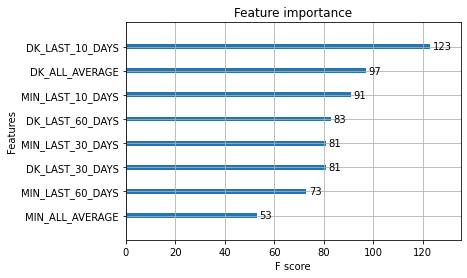

54.034414006105706
Chosen players: 
Baynes, Aron
Cook, Tyler
Deck, Gabriel
Dotson, Damyean
Ferrell, Yogi
Murray, Jamal
Nader, Abdel
Reynolds, Cameron
Robinson, Justin
Thompson, Klay
Vanderbilt, Jarred
Westbrook, Russell
Young, Thaddeus
Final Projected Score:  448.02560234069824


,Player,Position,Salary,VarValue,Predicted_Draftkings_Score
0,"Vanderbilt, Jarred",PF,3200.0,1.0,33.203033
7,"Dotson, Damyean",SG,3000.0,1.0,30.916206
1,"Westbrook, Russell",PG,10900.0,1.0,57.996681
12,"Deck, Gabriel",SF,3000.0,1.0,30.926298
11,"Thompson, Klay",SG,3000.0,1.0,30.926298
9,"Nader, Abdel",SF,3000.0,1.0,31.721504
8,"Baynes, Aron",C,3000.0,1.0,35.339222
10,"Murray, Jamal",PG,3000.0,1.0,38.910454
6,"Ferrell, Yogi",NA,3400.0,1.0,32.863083
5,"Cook, Tyler",NA,3200.0,1.0,28.494873


In [1762]:
#Start here:
year = int(input('Enter a year (2021)'))
month = int(input('Enter a month (8 for August, or 12 for December)'))
day = int(input('Enter a day (1-31)'))
model_choice = input("Choose prediction model: 'xgb' or 'ols'")
today_date = datetime.date(year, month, day)

final_data = DraftKingsScore(today_date, model_choice)
final_data.sort_values('Predicted_Draftkings_Score', ascending = False).sort_values('VarValue', ascending = False).head(24)

In [1761]:
def DraftKingsScore(today_date, model_choice):
 
    #1. Pull salaries and fantasy score data
    all_game_data = pull_game_data(today_date)
    for a in range(0, len(all_game_data)):
        if ':' in all_game_data['Minutes'][a]:
            all_game_data['Minutes'][a] = pd.to_numeric(all_game_data['Minutes'][a].split(':')[0]) + pd.to_numeric(all_game_data['Minutes'][a].split(':')[1])/60
        if all_game_data['Minutes'][a] == 'NA':
            all_game_data['Minutes'][a] = pd.to_numeric(0)
        if all_game_data['Minutes'][a] == 'DNP':
            all_game_data['Minutes'][a] = pd.to_numeric(0)

    print(today_date < date.today())
    if today_date < date.today():
        today_players = all_game_data[all_game_data['Date'] == today_date].reset_index().drop(['index'], axis = 1)
    else:
        today_players = pull_today_players(today_date, all_game_data)

    
    #2. Gather feature data
    today_features = pull_today_feature_data(today_players, all_game_data, today_date)
    all_game_data_feature  = pull_historical_feature_data(all_game_data)
    
    #3. Calculate projected fantasy points for each player based on selected model
    if model_choice == "xgb":
        draftkings_model, mean_squared = xgb_score(all_game_data_feature)
    if model_choice == "ols":
        draftkings_model, mean_squared = ols_score(all_game_data_feature)
    
    draftkings_pred_score = draftkings_model.predict(today_features[['DK_LAST_10_DAYS', 'DK_LAST_30_DAYS', 'DK_LAST_60_DAYS', 'DK_ALL_AVERAGE', 'MIN_LAST_10_DAYS', 'MIN_LAST_30_DAYS', 'MIN_LAST_60_DAYS', 'MIN_ALL_AVERAGE']])
    today_features['Predicted_Draftkings_Score'] = draftkings_pred_score
    print(mean_squared)
    
    #5. Determine optimized roster
    total_score_optimized = roster_optimize(today_features)
    
    #6. Export final data
    final_data = export_results(total_score_optimized, today_features)

    return final_data

In [1760]:
def pull_today_players(today_date, all_game_data):
    teams = ['ATL'     ,'BRK'     ,'BOS'      ,'CHO'     ,'CHI'     ,'CLE'     ,'DAL'     ,'DEN'     ,'DET'     ,'GSW'     ,'HOU'     ,'IND'     ,'LAC'     ,'LAL'     ,'MEM'     ,'MIA'     ,'MIL'     ,'MIN'     ,'NOP'     ,'NYK'     ,'OKC'     ,'ORL'     ,'PHI'     ,'PHO'     ,'POR'     ,'SAC'     ,'SAS'     ,'TOR'     ,'UTA'     ,'WAS']
    team_name = ['Atlanta Hawks',
                  'Brooklyn Nets',
                  'Boston Celtics',
                  'Charlotte Hornets',
                  'Chicago Bulls',
                  'Cleveland Cavaliers' ,
                  'Dallas Mavericks' ,
                  'Denver Nuggets' ,
                  'Detroit Pistons' ,
                  'Golden State Warriors' ,
                  'Houston Rockets' ,
                  'Indiana Pacers' ,
                  'Los Angeles Clippers' ,
                  'Los Angeles Lakers' ,
                  'Memphis Grizzlies' ,
                  'Miami Heat',
                  'Milwaukee Bucks' ,
                  'Minnesota Timberwolves' ,
                  'New Orleans Pelicans',
                  'New York Knicks' ,
                  'Oklahoma City Thunder' ,
                  'Orlando Magic',
                  'Philadelphia 76ers',
                  'Phoenix Suns',
                  'Portland Trail Blazers',
                  'Sacramento Kings',
                  'San Antonio Spurs',
                  'Toronto Raptors',
                  'Utah Jazz',
                  'Washington Wizards']    

    team_merge = pd.DataFrame(data={'Team_Short': teams, 'TEAM': team_name})
    print("Pull today's players")

    nba_schedule = get_schedule(today_date.year, playoffs=False)[get_schedule(today_date.year, playoffs=False)['DATE'] == today_date]

    ###Make list of all players playing today
    today_teams = pd.DataFrame(index=[], columns=['TEAM'])
    today_teams['TEAM'] = get_schedule(2021, playoffs=False)[get_schedule(2021, playoffs=False)['DATE'] == date.today()]['HOME'].append(get_schedule(2021, playoffs=False)[get_schedule(2021, playoffs=False)['DATE'] == date.today()]['VISITOR'])
    today_teams = today_teams.merge(team_merge, on='TEAM', how='left') 
    #Gather player names
    today_players = pd.DataFrame(index=[], columns=['PLAYER'])
    for x in range(0, len(today_teams)):
        print(today_teams['Team_Short'][x])
        temp_roster = get_roster(today_teams['Team_Short'][x], date.today().year)['PLAYER']
        temp_roster = pd.DataFrame(temp_roster)
        today_players= today_players.append(temp_roster)

    today_players = today_players.reset_index().drop(['index'], axis = 1)
    
    today_players['Name'] = today_players['PLAYER']
    for a in range(0,len(today_players)):
        name = today_players['PLAYER'][a]
        today_players['Name'][a] = ', '.join(reversed(name.split(' ')))
        
        
    #get salary, pos
    salary_pos = salary_pos_data(today_players, today_date, all_game_data)
    
    today_data = pd.merge(today_players, salary_pos, left_on=today_players['Name'].str.lower(), right_on=salary_pos['Name'].str.lower(), how = 'inner').reset_index().drop(['index'], axis = 1) 
    
    today_data = today_data[['Name_x', 'DK Salary', 'Pos', 'Date']].rename(columns={"Name_x": "Name", "DK Salary": "DK Salary", "Pos": "Pos", 'Date' :'Date'})
    today_data_final = pd.DataFrame()
    for a in range(0,len(today_data)):
        player_bucket = today_data[today_data['Name'] == today_data['Name'][a]].reset_index().drop(['index'], axis = 1)
        player_bucket = player_bucket.sort_values('Date', ascending = False)
        today_data_final = today_data_final.append(player_bucket.loc[0])
        
    today_data_final = today_data_final.drop_duplicates().reset_index().drop(['index'], axis = 1)
    
    return today_data_final

In [1759]:
def salary_pos_data(today_players, today_date, all_game_data):
    nba_schedule = get_schedule(today_date.year, playoffs=False)
    #http://rotoguru1.com/cgi-bin/hyday.pl?mon=4&day=17&year=2021&game=dk

    #salary
    url_template = "http://rotoguru1.com/cgi-bin/hstats.cgi?pos=0&sort=2&game=k&colA=0&daypt=0&xavg=3&show=2&fltr=00"
    request = requests.get(url_template)
    soup = BeautifulSoup(request.text, 'lxml')
    table = soup.findAll('pre')[0].text
    read_csv = pd.read_csv(io.StringIO((table)), sep = ';')
    read_csv = read_csv[['Pos', 'Team']]
    read_csv = read_csv.rename(columns={"Pos": "Name", "Team": "DK Salary"})
    
    #positions
    name_pos = all_game_data[['Name', 'Pos', 'Date']].drop_duplicates().reset_index().drop(['index'], axis = 1)
    
    #join them
    joined_data = pd.merge(read_csv, name_pos, left_on=read_csv['Name'].str.lower(), right_on=name_pos['Name'].str.lower(), how = 'inner').reset_index().drop(['index'], axis = 1) 
    joined_data = joined_data[['Name_x', 'DK Salary', 'Pos', 'Date']].rename(columns={"Name_x": "Name", "DK Salary": "DK Salary", "Pos": "Pos", "Date" : 'Date'})
    
    return joined_data

In [1564]:
def pull_game_data(today_date):  
    print('Pulling game data')
    #https://github.com/rogerfitz/tutorials/blob/master/draft-kings-history-scrape/roto-guru.ipynb
    nba_schedule = get_schedule(today_date.year, playoffs=False)
    url_template = "http://rotoguru1.com/cgi-bin/hyday.pl?mon=MONTH&day=DAY&year=YEAR&game=dk"
    #http://rotoguru1.com/cgi-bin/hyday.pl?mon=4&day=17&year=2021&game=dk
    all_data=pd.DataFrame()

    for game_date in nba_schedule['DATE'].unique():
        #print(game_date)
        game_date = pd.to_datetime(game_date)
        if game_date > today_date:
            next
        day = str(game_date.day)
        month = str(game_date.month)
        year = str(game_date.year)
        concat_url = url_template.replace("MONTH",month).replace("YEAR",year).replace('DAY', day)

        request = requests.get(concat_url)
        soup = BeautifulSoup(request.text, 'lxml')
        table = soup.findAll('table')[9]

        #1. Get player list
        playerlist=[]
        for a in table.findAll('a'):
            player=a.text
            if player not in ['Jump to:', 'Guards', 'Forwards', 'Centers', 'Unlisted']:
                playerlist.append(player)
        
        #2. get draft kings points
        dkpoints_sub = table.findAll('td', {'align': 'center'})
        dk_points = []
        for ele in dkpoints_sub:
            try:
                for a in ele:
                    if a[0].isdigit():
                        dk_points.append(a)
                    if a[0] == '-':
                        dk_points.append(a)
            except:
                pass
        
        #3. get salary
        salary_sub = table.findAll('td', {'align': 'right'})
        salary = []
        for ele in salary_sub:
            try:
                for a in ele:
                    if a[0] == '$' or 'N/A' in a:
                        salary.append(a)
            except:
                pass

        #4. #get minutes
        minutes_sub = table.findAll('td', {'align': 'right'})
        minutes = []
        for ele in minutes_sub:
            try:
                for a in ele:
                    if ':' in a or 'DNP' in a or 'NA' in a:
                        minutes.append(a)
            except:
                pass
        
        #5. Get positions
        position_sub = table.findAll('td')
        positions = []
        for ele in position_sub:
            try:
                for a in ele:
                    if a in ['PG', 'SG', 'PG/SG','PG/SF', 'PG/PF', 'PG/C' 'SG', 'SG/SF', 'SG/PF', 'SG/C','SF', 'SF/PF', 'SF/C', 'PF','PF/C', 'C', 'NA']:
                        positions.append(a)
            except:
                pass

        for x in range(0,len(positions)):
            if x < len(positions)-1:
                if positions[x] == 'NA' and positions[x+1] != 'NA':
                    del positions[x]
                if positions[x] == 'NA' and positions[x-1] != 'NA':
                    del positions[x]
            if x == len(positions)-1:
                if positions[x] == 'NA' and positions[x-1] != 'NA':
                    del positions[x]
                    


        player_data = pd.DataFrame()
        #print(len(positions))
        #print(len(dk_points))
        #print(len(salary))
        #print(len(minutes))
        #print(len(playerlist))
        
        for x in range(len(positions),len(dk_points)):
            bounds = [len(positions), len(dk_points)-1]
            positions[bounds[0]:bounds[1] + 1] = ['NA'] * ((bounds[1] + 1) - bounds[0])

        player_data['Pos'] = positions
        player_data['DK Pts'] = dk_points
        player_data['DK Salary'] = salary
        player_data['Minutes'] = minutes
        player_data['Name'] = playerlist
        player_data['Date'] = game_date

        all_data = pd.concat([all_data,player_data])
        
    all_data = all_data.reset_index().drop(['index'], axis = 1)
    
    #all_data = all_data[all_data['Date'].str.contains("file") == False]
    #all_data = all_data.dropna().reset_index().drop(['index'], axis = 1)
    #table = soup.findAll('pre')[1].text
    #read_csv = pd.read_csv(io.StringIO((table)), sep = ';')
    #for x in range(0,len(all_data)):
        #all_data['Date'][x] = pd.to_datetime(all_data['Date'][x], format='%Y%m%d')
    
    return all_data

In [1767]:
def pull_today_feature_data(today_players, all_game_data, today_date):
    #today_players
    print('today feature data')

    today_features = pd.DataFrame(index=[], columns=['DK_LAST_10_DAYS', 'DK_LAST_30_DAYS', 'DK_LAST_60_DAYS', 'DK_ALL_AVERAGE', 'MIN_LAST_10_DAYS', 'MIN_LAST_30_DAYS', 'MIN_LAST_60_DAYS', 'MIN_ALL_AVERAGE'])
    today_features['PLAYER'] = today_players['Name']
    today_features['Position'] = today_players['Pos']
    today_features['Salary'] = today_players['DK Salary']
    for a in range(0, len(today_players['DK Salary'])):
        if today_features['Salary'][a] != 'N/A' and '$' in str(today_features['Salary'][a]):
            today_features['Salary'][a] = int(today_players['DK Salary'][a].strip('$').replace(',',''))
        if today_features['Salary'][a] == 'N/A':
            today_features['Salary'][a] = int(0)


    #today_features['Minutes'] = pd.to_numeric(today_players['Minutes'])
    #today_features['Draftkings_Actual_Score'] =  pd.to_numeric(today_players['DK Pts'])
    today_features= today_features.reset_index().drop(['index'], axis = 1)
    
    today_features['DK_LAST_10_DAYS'] = ''
    today_features['DK_LAST_30_DAYS'] = ''
    today_features['DK_LAST_60_DAYS'] = ''
    today_features['DK_ALL_AVERAGE'] = ''
    
    today_features['MIN_LAST_10_DAYS'] = ''
    today_features['MIN_LAST_30_DAYS'] = ''
    today_features['MIN_LAST_60_DAYS'] = ''
    today_features['MIN_ALL_AVERAGE'] = ''

    #Calculate feature data actual players
    for player in range(0, len(today_features)):
        #print(player, today_features['PLAYER'][player])
        #print(player, "/", len(today_features))
        filter_player_data = all_game_data[all_game_data['Name']==today_features['PLAYER'][player]].reset_index().drop(['index'], axis = 1)[['Date', 'DK Pts', 'Minutes']]
        filter_player_data['Minutes'] = pd.to_numeric(filter_player_data['Minutes'])
        filter_player_data['DK Pts'] = pd.to_numeric(filter_player_data['DK Pts'])
        #filter_player_data['Date'] = pd.to_datetime(today_players['Date'])
        #filter_player_data = filter_player_data.dropna().reset_index().drop(['index'], axis = 1)
        current_date = today_date
        ten_day = current_date +timedelta(days=-10)
        thirty_day = current_date +timedelta(days=-30)
        sixty_day = current_date +timedelta(days=-60)


        ten_bucket =  filter_player_data[(filter_player_data.Date >= ten_day) & (filter_player_data.Date < current_date)].reset_index()
        thirty_bucket =  filter_player_data[(filter_player_data.Date >= thirty_day) & (filter_player_data.Date < current_date)].reset_index()
        sixty_bucket =  filter_player_data[(filter_player_data.Date >= sixty_day) & (filter_player_data.Date < current_date)].reset_index()
        all_bucket =  filter_player_data[(filter_player_data.Date < current_date)].reset_index()
    

        
        today_features['DK_LAST_10_DAYS'][player] = ten_bucket['DK Pts'].mean()
        today_features['DK_LAST_30_DAYS'][player] = thirty_bucket['DK Pts'].mean()
        today_features['DK_LAST_60_DAYS'][player] = sixty_bucket['DK Pts'].mean()
        today_features['DK_ALL_AVERAGE'][player] = all_bucket['DK Pts'].mean()    
        
        today_features['MIN_LAST_10_DAYS'][player] = ten_bucket['Minutes'].mean()
        today_features['MIN_LAST_30_DAYS'][player] = thirty_bucket['Minutes'].mean()
        today_features['MIN_LAST_60_DAYS'][player] = sixty_bucket['Minutes'].mean()
        today_features['MIN_ALL_AVERAGE'][player] = all_bucket['Minutes'].mean()
        
    for a in today_features.columns[0:8]:
        today_features[a] = pd.to_numeric(today_features[a])
    
    #today_features = today_features.dropna().reset_index().drop(['index'], axis = 1)
        
    return today_features 

In [1768]:
def pull_historical_feature_data(all_game_data):
    print('Pulling historical feature data for modeling')
    #Collecting feature data for training
    all_game_data['DK_LAST_10_DAYS'] = ''
    all_game_data['DK_LAST_30_DAYS'] = ''
    all_game_data['DK_LAST_60_DAYS'] = ''
    all_game_data['DK_ALL_AVERAGE'] = ''

    all_game_data['MIN_LAST_10_DAYS'] = ''
    all_game_data['MIN_LAST_30_DAYS'] = ''
    all_game_data['MIN_LAST_60_DAYS'] = ''
    all_game_data['MIN_ALL_AVERAGE'] = ''    
    
    
    #Calculate feature data for training
    print('today historic data')
    for a in range(0, len(all_game_data)):
        #print(a, "/", len(all_game_data))
        #print(a, all_game_data['Name'][a])
        filter_player_data = all_game_data[all_game_data['Name']==all_game_data['Name'][a]].reset_index()
        filter_player_data['Minutes'] = pd.to_numeric(filter_player_data['Minutes'])
        filter_player_data['DK Pts'] = pd.to_numeric(filter_player_data['DK Pts'])

        current_date = all_game_data['Date'][a]
        ten_day = current_date +timedelta(days=-10)
        thirty_day = current_date +timedelta(days=-30)
        sixty_day = current_date +timedelta(days=-60)


        ten_bucket =  filter_player_data[(filter_player_data.Date >= ten_day) & (filter_player_data.Date < current_date)].reset_index()
        thirty_bucket =  filter_player_data[(filter_player_data.Date >= thirty_day) & (filter_player_data.Date < current_date)].reset_index()
        sixty_bucket =  filter_player_data[(filter_player_data.Date >= sixty_day) & (filter_player_data.Date < current_date)].reset_index()
        all_bucket =  filter_player_data[(filter_player_data.Date < current_date)].reset_index()
        
        all_game_data['DK_LAST_10_DAYS'][a] = ten_bucket['DK Pts'].mean()
        all_game_data['DK_LAST_30_DAYS'][a] = thirty_bucket['DK Pts'].mean()
        all_game_data['DK_LAST_60_DAYS'][a] = sixty_bucket['DK Pts'].mean()
        all_game_data['DK_ALL_AVERAGE'][a] = all_bucket['DK Pts'].mean()
        
        all_game_data['MIN_LAST_10_DAYS'][a] = ten_bucket['Minutes'].mean()
        all_game_data['MIN_LAST_30_DAYS'][a] = thirty_bucket['Minutes'].mean()
        all_game_data['MIN_LAST_60_DAYS'][a] = sixty_bucket['Minutes'].mean()
        all_game_data['MIN_ALL_AVERAGE'][a] = all_bucket['Minutes'].mean()

    #for a in all_game_data.columns[15:22]:
        #all_game_data[a] = pd.to_numeric(all_game_data[a])
        
    all_game_data = all_game_data.dropna().reset_index().drop(['index'], axis = 1)
    
    return all_game_data 

In [1587]:
def xgb_score(all_game_data):
    print('Create xgb model')
    #Split data into training and test sets
    model_data = all_game_data_feature.dropna().reset_index().drop(['index'], axis = 1)
    all_game_data['Minutes'] = pd.to_numeric(all_game_data['Minutes'])
    all_game_data['DK Pts'] = pd.to_numeric(all_game_data['DK Pts'])
    model_data = all_game_data[all_game_data['DK Pts'] > 24].reset_index().drop(['index'], axis = 1)
    X = model_data[['DK_LAST_10_DAYS', 'DK_LAST_30_DAYS', 'DK_LAST_60_DAYS', 'DK_ALL_AVERAGE', 'MIN_LAST_10_DAYS', 'MIN_LAST_30_DAYS', 'MIN_LAST_60_DAYS', 'MIN_ALL_AVERAGE']] # put features in here
    y = model_data['DK Pts']
    
    X = X.fillna(0)
    y = y.fillna(0)
    
    print(len(X))
    print(len(y))

    #initialize XGBRegressor class
    xgb_model = xgb.XGBRegressor(
        n_estimators=100,
        reg_lambda=1,
        gamma=0,
        max_depth=3
    )

    #fit model to the training set
    xgb_model.fit(X, y)
    y_pred = xgb_model.predict(X)


    plot_importance(xgb_model)
    plt.show()
    
    a = np.array(y) # your x
    b = np.array(y_pred) # your y
    mses = np.mean((a - b)**2)
    
    return xgb_model, mses

In [1586]:
def ols_score(all_game_data):
    print('Create ols model')
    #Split data into training and test sets
    model_data = all_game_data_feature.dropna().reset_index().drop(['index'], axis = 1)
    all_game_data['Minutes'] = pd.to_numeric(all_game_data['Minutes'])
    all_game_data['DK Pts'] = pd.to_numeric(all_game_data['DK Pts'])
    model_data = all_game_data[all_game_data['DK Pts'] > 24].reset_index().drop(['index'], axis = 1)
    X = model_data[['DK_LAST_10_DAYS', 'DK_LAST_30_DAYS', 'DK_LAST_60_DAYS', 'DK_ALL_AVERAGE', 'MIN_LAST_10_DAYS', 'MIN_LAST_30_DAYS', 'MIN_LAST_60_DAYS', 'MIN_ALL_AVERAGE']] # put features in here
    y = model_data['DK Pts']
    X = X.fillna(0)
    y = y.fillna(0)

    from statsmodels.api import OLS
    ols_model = OLS(y,X).fit()
    print(ols_model.summary())
    
    y_pred = ols_model.predict(X)
    
    a = np.array(y) # your x
    b = np.array(y_pred) # your y
    mses = np.mean((a - b)**2)
    return ols_model, mses

In [1584]:
def roster_optimize(today_features):
    #https://towardsdatascience.com/how-to-solve-optimization-problems-with-python-9088bf8d48e5
    # Get a list of players
    today_features = today_features[today_features['Salary']!='NaN'].reset_index().drop(['index'], axis = 1)
    today_features = today_features[today_features['Salary']>0].reset_index().drop(['index'], axis = 1)
    
    players = list(today_features['PLAYER'])
    # Initialize Dictionaries for Salaries and Positions
    salaries = dict(zip(players, today_features['Salary']))
    positions = dict(zip(players, today_features['Position']))
    # Dictionary for Projected Score for each player
    project_points = dict(zip(players, today_features['Predicted_Draftkings_Score']))
    # Set Players to Take either 1 or 0 values (owned or not)
    player_vars = LpVariable.dicts("Player", players, lowBound=0, upBound=1, cat='Integer')
    
    total_score = LpProblem("Fantasy_Points_Problem", LpMaximize)
    total_score += lpSum([project_points[i] * player_vars[i] for i in player_vars])
    total_score += lpSum([salaries[i] * player_vars[i] for i in player_vars]) <= 50000
    
    # Get indices of players for each position
    pg = [p for p in positions.keys() if positions[p] == 'PG' or positions[p] == 'PG/SG' or positions[p] == 'PG/SF']
    sg = [p for p in positions.keys() if positions[p] == 'SG' or positions[p] == 'PG/SG' or positions[p] == 'SG/SF']
    sf = [p for p in positions.keys() if positions[p] == 'SF' or positions[p] == 'SG/SF' or positions[p] == 'SF/PF' or positions[p] == 'PG/SF']
    pf = [p for p in positions.keys() if positions[p] == 'PF' or positions[p] == 'PF/C' or positions[p] == 'SF/PF']
    c = [p for p in positions.keys() if positions[p] == 'C' or positions[p] == 'PF/C']
    # Set Constraints
    total_score += lpSum([player_vars[i] for i in pg]) == 2
    total_score += lpSum([player_vars[i] for i in sg]) == 2
    total_score += lpSum([player_vars[i] for i in sf]) == 2
    total_score += lpSum([player_vars[i] for i in pf]) == 2
    total_score += lpSum([player_vars[i] for i in c]) == 1
    
    total_score.solve()
            
    return total_score

In [1752]:
def export_results(total_score, today_features):
    player_list = []
    variable_list = []

    lp_results = pd.DataFrame(index=[], columns=['Player', 'VarValue'])
    for variable in total_score.variables():
        player_list.append((variable.name.replace('Player_', '').replace('_', ' ')))
        variable_list.append(variable.varValue)

    final_data = pd.DataFrame(index=[], columns=['Player' 'VarValue'])
    final_data['Player'] = player_list
    final_data['VarValue'] = variable_list
    final_data = pd.merge(final_data, today_features, left_on=final_data['Player'].str.lower(), right_on=today_features['PLAYER'].str.lower(), how = 'left').reset_index().drop(['index'], axis = 1) 
    
    final_data = final_data[['Player', 'Position', 'Salary', 'VarValue', 'Predicted_Draftkings_Score']].sort_values('VarValue', ascending = False).reset_index().drop(['index'], axis = 1)
    
    #Chosen names and final score:
    print('Chosen players: ')
    for v in total_score.variables():
        if v.varValue > 0:
            print(v.name.replace('Player_', '').replace('_', ' '))
    
    print('Final Projected Score: ', pulp.value(total_score.objective))
    
    return final_data

In [ ]:
#Use bottom code to work on improving score modeling

(array([694., 673., 646., 618., 557., 477., 470., 450., 447., 376., 335.,
        326., 286., 298., 238., 243., 163., 179., 145., 159., 138., 101.,
        110.,  74.,  66.,  73.,  50.,  46.,  49.,  36.,  24.,  14.,  16.,
         10.,  12.,   9.,  14.,   5.,   9.,   4.,   4.,   2.,   2.,   0.,
          1.,   2.,   0.,   0.,   1.,   1.]),
 array([20.25 , 21.735, 23.22 , 24.705, 26.19 , 27.675, 29.16 , 30.645,
        32.13 , 33.615, 35.1  , 36.585, 38.07 , 39.555, 41.04 , 42.525,
        44.01 , 45.495, 46.98 , 48.465, 49.95 , 51.435, 52.92 , 54.405,
        55.89 , 57.375, 58.86 , 60.345, 61.83 , 63.315, 64.8  , 66.285,
        67.77 , 69.255, 70.74 , 72.225, 73.71 , 75.195, 76.68 , 78.165,
        79.65 , 81.135, 82.62 , 84.105, 85.59 , 87.075, 88.56 , 90.045,
        91.53 , 93.015, 94.5  ]),
 <BarContainer object of 50 artists>)

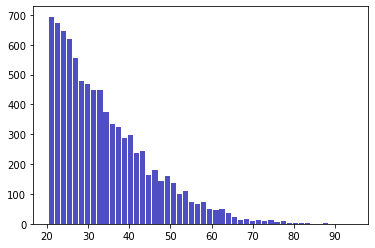

In [1371]:
import matplotlib.pyplot as plt

# An "interface" to matplotlib.axes.Axes.hist() method
plt.hist(x=model_data['DK Pts'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)

In [1369]:
len(model_data)

8653

In [1370]:
np.percentile(model_data['DK Pts'], 50) # return 50th percentile, e.g median.


31.25

In [1360]:
from numpy import mean, std

print('Mean: ',mean(model_data['DK Pts']), 'Std: ',std(model_data['DK Pts']), 'Min: ',min(model_data['DK Pts']), 'Max: ',max(model_data['DK Pts']))

Mean:  22.419990173978384 Std:  14.567454913881061 Min:  0.25 Max:  94.5


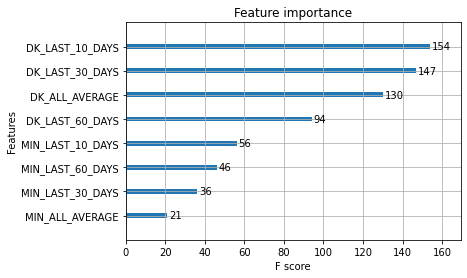

71.74636664849497


In [1372]:
################ use this to edit xgb model, change up features, test significance, etc.:
#Split data into training and test sets:

#model_data = all_game_data_feature.dropna().reset_index().drop(['index'], axis = 1)
model_data = all_game_data_feature[all_game_data_feature['DK Pts'] > 30]
X = model_data[['DK_LAST_10_DAYS', 'DK_LAST_30_DAYS', 'DK_LAST_60_DAYS', 'DK_ALL_AVERAGE', 'MIN_LAST_10_DAYS', 'MIN_LAST_30_DAYS', 'MIN_LAST_60_DAYS', 'MIN_ALL_AVERAGE']] # put features in here
#X = all_game_data_feature[['DK_LAST_10_DAYS', 'DK_LAST_30_DAYS', 'DK_LAST_60_DAYS', 'DK_ALL_AVERAGE']] # put features in here

y = model_data['DK Pts']

#create test groups
X_train, X_test, y_train, y_test  = train_test_split(X, y)
X_train = X_train.fillna(0)
y_train = y_train.fillna(0)
X_test = X_test.fillna(0)
y_test = y_test.fillna(0)

#initialize XGBRegressor class
#https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
regressor = xgb.XGBRegressor(
    booster = 'gbtree', #gblinear
    eta = 0.2,
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)
#fit model to the training set
regressor.fit(X_train, y_train)
#Create predictions
y_pred = regressor.predict(X_test)
#See which features most utilitized
plot_importance(regressor)
plt.show()
#Check error
print(mean_squared_error(y_test, y_pred))


In [1373]:
# use this to edit ols model, change up features, test significance, etc.:
#Split data into training and test sets

#model_data = all_game_data_feature.dropna().reset_index().drop(['index'], axis = 1)
model_data = all_game_data_feature[all_game_data_feature['DK Pts'] > 30]
X = model_data[['DK_LAST_10_DAYS', 'DK_LAST_30_DAYS', 'DK_LAST_60_DAYS', 'DK_ALL_AVERAGE', 'MIN_LAST_10_DAYS', 'MIN_LAST_30_DAYS', 'MIN_LAST_60_DAYS', 'MIN_ALL_AVERAGE']] # put features in here
y = model_data['DK Pts']
#create test groups
X_train, X_test, y_train, y_test  = train_test_split(X, y)
X_train = X_train.fillna(0)
y_train = y_train.fillna(0)
X_test = X_test.fillna(0)
y_test = y_test.fillna(0)
from statsmodels.api import OLS
ols_model = OLS(y_train,X_train).fit()
ols_model.summary()
#Create predictions
y_pred = ols_model.predict(X_test)
#Check error
print(mean_squared_error(y_test, y_pred))


84.3212352623493
